# Capstone Project AIML - NLP chatbot⭐
---

By:
* **Amey**
* **Darsana**
* **Karunakar**
* **Purvasha**
* **Prigiya**
* **Mahendran**

**DOMAIN:** Industrial safety. NLP based Chatbot.

**CONTEXT:** The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
* **Data**: timestamp or time/date information
* **Countries**: which country the accident occurred (anonymised)
* **Local**: the city where the manufacturing plant is located (anonymised)
* **Industry sector**: which sector the plant belongs to
* **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
* **Genre**: if the person is male of female
* **Employee or Third Party**: if the injured person is an employee or a third party
* **Critical Risk**: some description of the risk involved in the accident
* **Description**: Detailed description of how the accident happened.

**PROJECT OBJECTIVE:** Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Necessary Libraries**

In [ ]:
import numpy as np #Importing Numpy Libaries
import pandas as pd #Importing Pandas Libaries
import matplotlib.pyplot as plt # Importing Matplot Libaries
import seaborn as sns  # Importing Seaborn Libaries
%matplotlib inline

# removing warnings
import warnings
warnings.filterwarnings('ignore')
import holidays
import datetime
import holoviews as hv
from holoviews import opts
from scipy.stats import chi2_contingency
import pickle

In [ ]:
# For NLP:
!pip install nltk
!pip install gensim
import nltk
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# For Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

## **PROJECT TASK**

### **Milestone 1**

#### **Context and Dataset:**

*   The dataset has the records of accidents occuring in various industry sectors, across different locations in 3 countries.

*   It contains records of the dates when the accidents occured, along with the description of the accidents, the accident level or severity, the potential accident level and also the critical risk which resulted in each accident.

*   It also contains details of the employees such as their gender and  whether they are an employee or a third party.

*   Our objective is to design a ML/DL utility chatbot which can predict the accident level accurately based on the description.

#### **Importing the data**

In [ ]:
# Importing the data as "df"
df = pd.read_excel("/content/drive/MyDrive/GL/AIML/Capstone Project AIML/Data_Set_-_industrial_safety_and_health_database_with_accidents_description.xlsx")

In [ ]:
# Checking info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [ ]:
# Printing first 5 rows:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### **Data cleansing**

In [ ]:
# Creating a copy before cleansing the data
df_copy = df.copy()

In [ ]:
# Dropping irrelevant column "Unnamed:0"
df_copy.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Renaming the columns with the correct name:
df_copy.rename(columns = { "Data" : "Date",
                      "Industry Sector" : "Industry_Sector",
                      "Accident Level": "Accident_Level",
                      "Countries" : "Country",
                      "Genre" : "Gender",
                      "Local" : "Location",
                      "Potential Accident Level" : "Potential_Accident_Level",
                      "Employee or Third Party" : "Employee_Type",
                      "Critical Risk" : "Critical_Risk","Description" : "Description"}, inplace = True)

In [ ]:
# Checking for missing values
df_copy.isnull().sum()/len(df_copy.isnull())*100

Date                        0.0
Country                     0.0
Location                    0.0
Industry_Sector             0.0
Accident_Level              0.0
Potential_Accident_Level    0.0
Gender                      0.0
Employee_Type               0.0
Critical_Risk               0.0
Description                 0.0
dtype: float64

No data is missing in the dataset

In [ ]:
# Defining a function to shape, type, missing values, unique values and duplicate values
def Insight(df_copy):
    print("Dataset Shape: {}".format(df_copy.shape))
    print("Total Number of rows in dataset: {}".format(df_copy.shape[0]))
    print("Total Number of columns in dataset: {}".format(df_copy.shape[1]))
    print("Various datatypes present in the dataset are: {}".format(df_copy.dtypes.value_counts()))

    summary = pd.DataFrame(df_copy.dtypes, columns = ["dtypes"])
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary["Misssing_values"] = df_copy.isnull().sum().values
    summary["Unique_values"] = df_copy.nunique().values
    summary["Duplicate_values"] = df_copy.duplicated().sum()

    return summary

# Applying and printing the function
Insight(df_copy)

Dataset Shape: (425, 10)
Total Number of rows in dataset: 425
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object            9
datetime64[ns]    1
Name: count, dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],Date,0,287,7
1,Country,object,Country,0,3,7
2,Location,object,Location,0,12,7
3,Industry_Sector,object,Industry_Sector,0,3,7
4,Accident_Level,object,Accident_Level,0,5,7
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,7
6,Gender,object,Gender,0,2,7
7,Employee_Type,object,Employee_Type,0,3,7
8,Critical_Risk,object,Critical_Risk,0,33,7
9,Description,object,Description,0,411,7


In [ ]:
# Dropping the duplicate rows
df_copy.drop_duplicates(keep="first",inplace=True)

In [ ]:
# Re-applying and printing the function "Insight"
Insight(df_copy)

Dataset Shape: (418, 10)
Total Number of rows in dataset: 418
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object            9
datetime64[ns]    1
Name: count, dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,Date,datetime64[ns],Date,0,287,0
1,Country,object,Country,0,3,0
2,Location,object,Location,0,12,0
3,Industry_Sector,object,Industry_Sector,0,3,0
4,Accident_Level,object,Accident_Level,0,5,0
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,0
6,Gender,object,Gender,0,2,0
7,Employee_Type,object,Employee_Type,0,3,0
8,Critical_Risk,object,Critical_Risk,0,33,0
9,Description,object,Description,0,411,0


In [ ]:
# Extracting new features from Date column
df_copy["Date"] = pd.to_datetime(df_copy["Date"])
df_copy["Year"] = df_copy.Date.apply(lambda x : x.year)
df_copy["Month"] = df_copy.Date.apply(lambda x : x.month)
df_copy["Day"] = df_copy.Date.apply(lambda x : x.day)
df_copy["Weekday"] = df_copy.Date.apply(lambda x : x.day_name())
df_copy["WeekofYear"] = df_copy.Date.apply(lambda x : x.weekofyear)

In [ ]:
# Defining a function to create a seasons based on months
def month2seasons(x):
    if x in [9, 10, 11]:
        season = "Spring"
    elif x in [12, 1, 2]:
        season = "Summer"
    elif x in [3, 4, 5]:
        season = "Autumn"
    elif x in [6, 7, 8]:
        season = "Winter"
    return season

# Adding a column called "Season"
df_copy["Season"] = df_copy["Month"].apply(month2seasons)

In [ ]:
# Creating Holiday variable based on Brazil holidays list
# We are only considering the fficial holidays:

brazil_holidays = []

print("--"*40); print("List of Brazil holidays in 2016"); print("--"*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print("--"*40); print("List of Brazil holidays in 2017"); print("--"*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

df_copy["Is_Holiday"] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in df_copy["Date"]]

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Confraternização Universal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia do Trabalhador')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
--------------------------------------------------------------------------------
(datetime.date(2017, 1, 1), 'Confraternização Universal')
(datetime.date(2017, 4, 14), 'Sexta-feira Santa')
(datetime.date(2017, 4, 21), 'Tiradentes')
(datetime.d

In [ ]:
# Printing the first five rows of df_copy
df_copy.head()

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Is_Holiday,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,0,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,0,2016,1,6,Wednesday,1,Summer
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0,2016,1,8,Friday,1,Summer
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,0,2016,1,10,Sunday,1,Summer


In [ ]:
# Printing Shape of df_copy
print("The dataset has ",df_copy.shape[0],"rows and ",df_copy.shape[1],"columns.")

The dataset has  418 rows and  17 columns.


#### **Exploratory Data Analysis (EDA)**

##### **Univariate Analysis:**

<Figure size 1200x800 with 0 Axes>

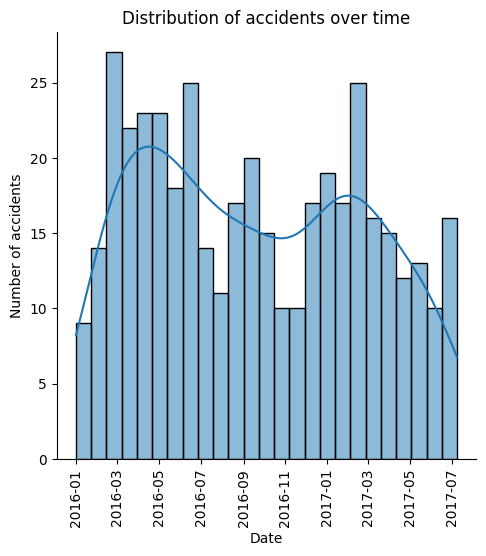

In [ ]:
# Checking the distribution of accidents over time
plt.figure(figsize=(12,8));
sns.displot(df_copy, x="Date", kde=True, bins = 25);
plt.xticks(rotation=90);
plt.xlabel("Date");
plt.ylabel("Number of accidents");
plt.title("Distribution of accidents over time");

Looking at the trends in the above chart, the following observations have been made:

* Accident rates have increased from January 2016 to May 2016. During this period, the highest accident rates were observed in April 2016.

* Accident rates gradually fell between May 2016 and October 2016.

* Post-October 2016, the accident rates again started to increase. The second highest accident rate was observed in February 2017.

* After February 2017, the accident rates gradually started to decrease.

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of 'Country'
------------------------------------------------------------


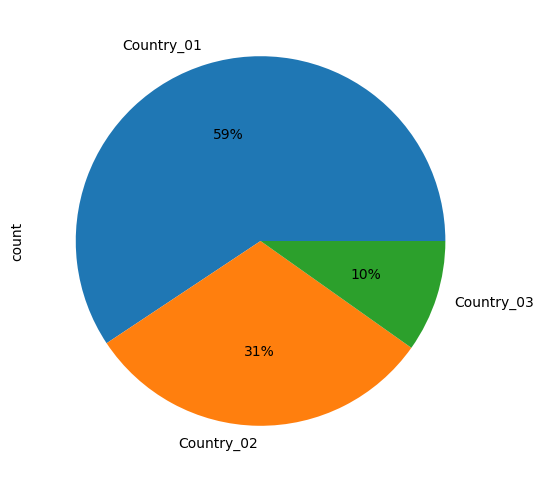

In [ ]:
# Plotting the proportion of country wise Accident level:
print("--"*30); print("Value Counts for `Country` label"); print("--"*30)

total_row_cnt = df_copy.shape[0]
country_01_cnt = df_copy[df_copy.Country == "Country_01"].shape[0]
country_02_cnt = df_copy[df_copy.Country == "Country_02"].shape[0]
country_03_cnt = df_copy[df_copy.Country == "Country_03"].shape[0]

print(f"Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%")
print(f"Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%")
print(f"Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%")

print("--"*30); print("Distributon of 'Country'"); print("--"*30)
_ = df_copy["Country"].value_counts().plot(kind = "pie", autopct = "%.0f%%", labels = ["Country_01", "Country_02", "Country_03"], figsize = (10, 6))

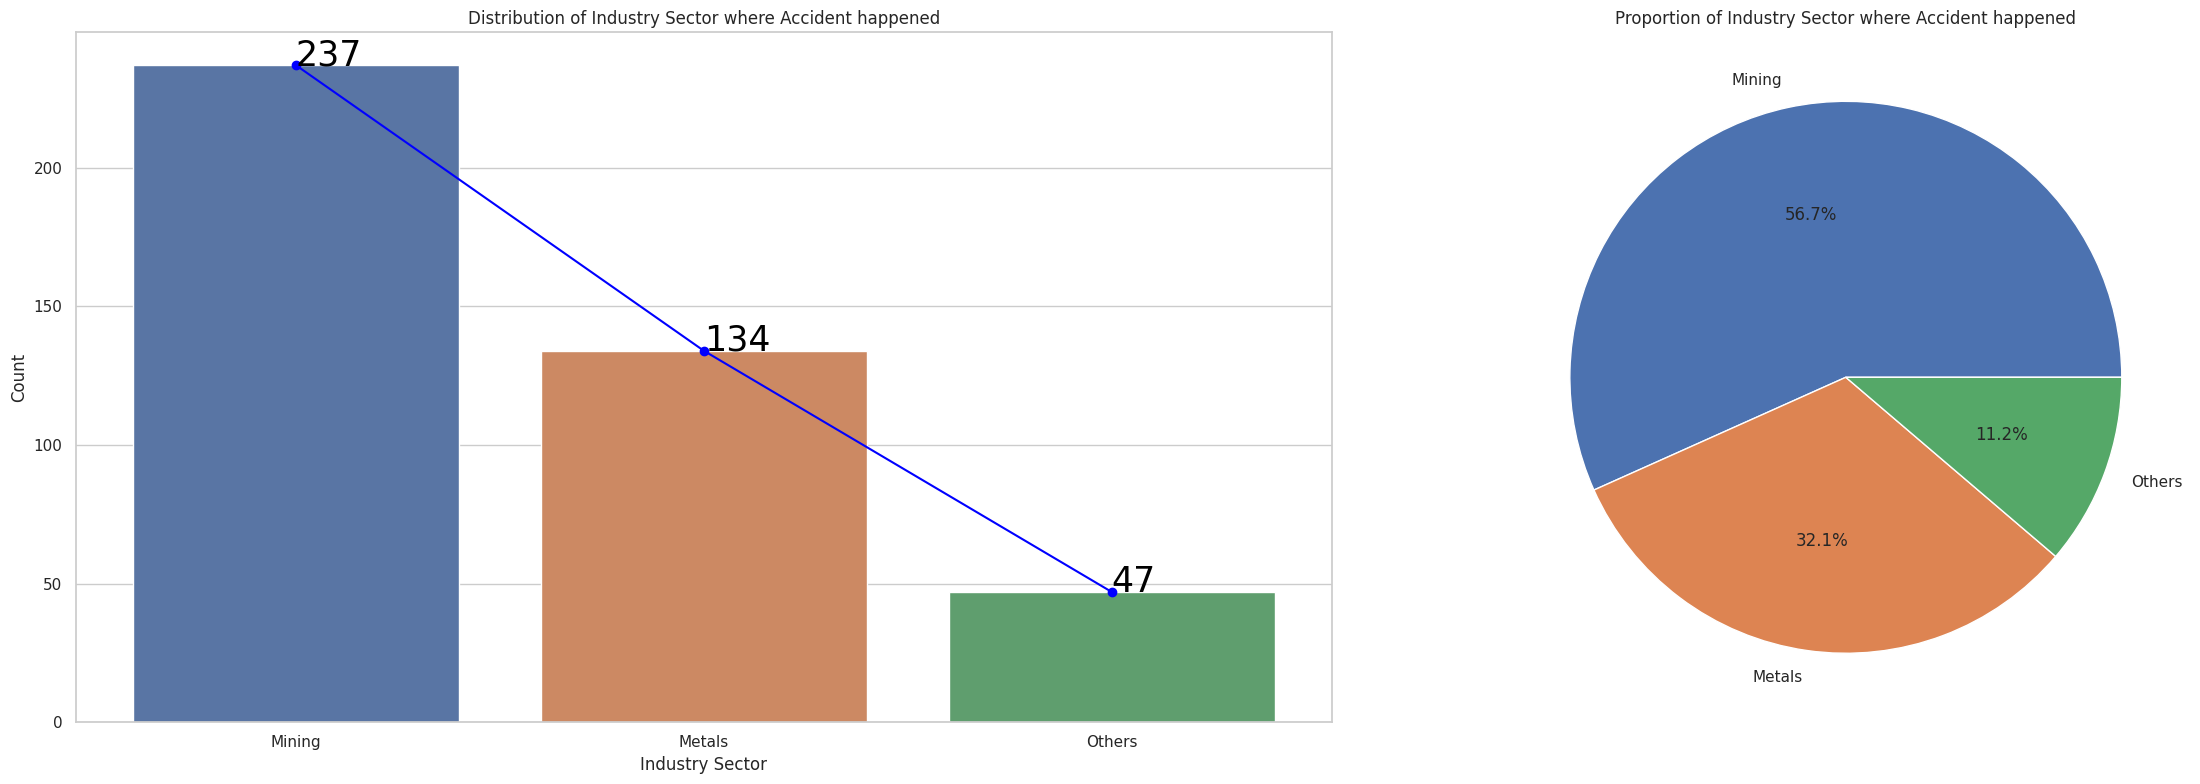

In [ ]:
# Plotting the distribution of accidents over industry sectors

# Creating subplots
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(25, 8))

# Creating a count plot on the first subplot
industry_order = df_copy["Industry_Sector"].value_counts().index
industry_counts = df_copy["Industry_Sector"].value_counts()[industry_order]
countplot = sns.countplot(ax=axs[0], x="Industry_Sector", data=df_copy, palette=sns.color_palette(), order=industry_order)
axs[0].set_title("Distribution of Industry Sector where Accident happened")
axs[0].set_xlabel("Industry Sector")
axs[0].set_ylabel("Count")

# Plotting the gradient line on the countplot
axs[0].plot(industry_counts.index, industry_counts.values, marker="o", color="blue")

# Adding the count values on top of the bars in the count plot
for bar in countplot.patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
                ha="left", color="black", fontsize=25)

# Creating a pie chart on the second subplot
sector_counts = df_copy["Industry_Sector"].value_counts()
axs[1].pie(sector_counts, labels=sector_counts.index, autopct="%1.1f%%", colors=sns.color_palette(sns.color_palette(), len(sector_counts)))
axs[1].set_title("Proportion of Industry Sector where Accident happened")
plt.tight_layout()

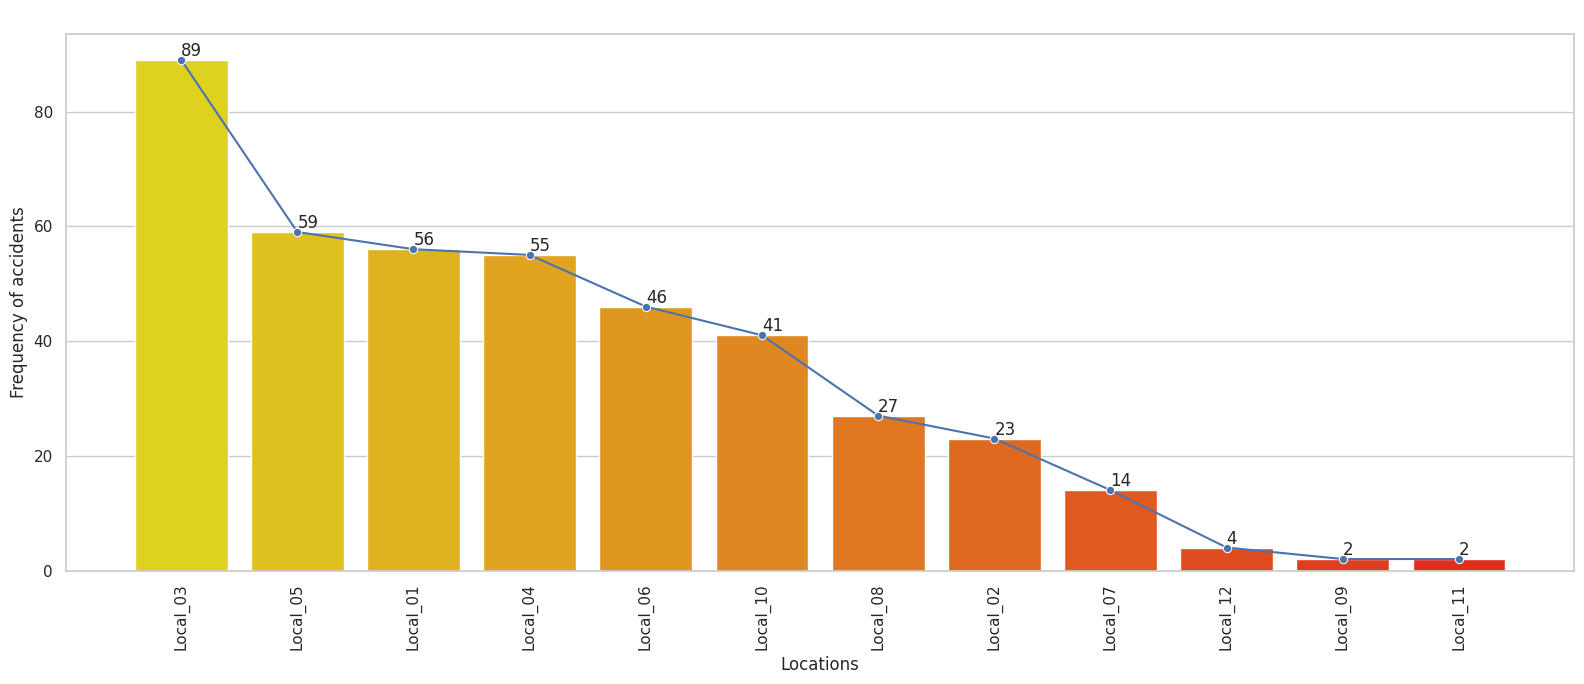

In [ ]:
# Plotting the Frequency of accidents in various locations
plt.figure(figsize=(16, 7))
ax = sns.countplot(x="Location", data=df_copy, order=df_copy["Location"].value_counts().index, palette="autumn_r")

# Getting the order of the Locations based on its count
ordered_locals = df_copy["Location"].value_counts().index

# # Plotting the gradient line
local_counts_ordered = df_copy["Location"].value_counts()[ordered_locals].values
sns.lineplot(x=np.arange(len(ordered_locals)), y=local_counts_ordered, sort=False, marker="o", ax=ax)

# Defining the Title and the labels
plt.title(" ", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Locations")
plt.ylabel("Frequency of accidents")

# Annotating each bar with the count value
for i, count in enumerate(local_counts_ordered):
    ax.text(i, count, f"{count}", ha="left", va="bottom")

plt.tight_layout()

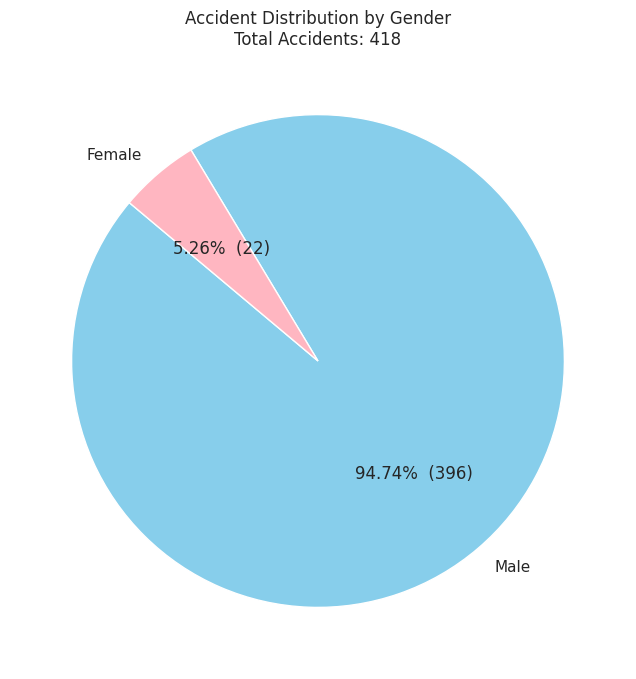

In [ ]:
# Calculating counts for each category in "Gender"
genre_counts = df_copy["Gender"].value_counts()

# Defining a function to show both percentage and absolute value
def custom_autopct(pct):
    total = sum(genre_counts)
    val = int(round(pct*total/100.0))
    return "{p:.2f}%  ({v:d})".format(p=pct,v=val)

# Plotting Pie Chart on Genre
plt.figure(figsize=(8, 8));
plt.pie(genre_counts, labels=genre_counts.index, autopct=custom_autopct, startangle=140, colors=["skyblue", "lightpink"]);
plt.title(f"Accident Distribution by Gender\nTotal Accidents: {genre_counts.sum()}");

Males have a higher frequency of accidents compared to females.

------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
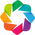

:Bars   [Employee_Type]   (proportion)

In [ ]:
# Plotting a countplot for "Employee Type" in order to determine the proportion that each type contributes to the number of accidents
print("--"*30); print("Value Counts for `Employee type` label"); print("--"*30)

third_party_cnt = df_copy[df_copy["Employee_Type"] == "Third Party"].shape[0]
emp_cnt = df_copy[df_copy["Employee_Type"] == "Employee"].shape[0]
third_rem_cnt = df_copy[df_copy["Employee_Type"] == "Third Party (Remote)"].shape[0]

print(f"Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%")
print(f"Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%")
print(f"Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%")

print("--"*30); print("Distributon of `Employee type` label"); print("--"*30)

emp_type_cnt = np.round(df_copy["Employee_Type"].value_counts(normalize=True) * 100)
hv.extension("bokeh")
hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="#FFA500", xlabel="Employee Type", ylabel="Percentage", yformatter="%d%%")\
                .opts(opts.Bars(width=500, height=300,tools=["hover"],show_grid=True))

* 44% Third party empoyees working in this industry.
* 43% own empoyees working in this industry.
* 13% Third party(Remote) empoyees working in this industry.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
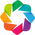

:Bars   [Year]   (proportion)

In [ ]:
# Plottiing the count plot to understand the year-wise frequency of accidents
year_cnt = np.round(df_copy["Year"].value_counts(normalize=True,sort=False) * 100)
hv.extension("bokeh")
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(df_copy["Month"].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color="red", line_width=3)

(year).opts(opts.Bars(width=400, height=300,tools=["hover"],show_grid=True, ylabel="Percentage", yformatter="%d%%"))

The graph indicates that there were more accidents in 2016 than in 2017.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
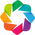

:Overlay
   .Bars.I  :Bars   [Month]   (proportion)
   .Curve.I :Curve   [Month]   (proportion)

In [ ]:
# Plottiing the count plot to understand the month-wise frequency of accidents
hv.extension("bokeh")
(month).opts(opts.Bars(width=1000, height=500,tools=["hover"],show_grid=True, ylabel="Percentage", yformatter="%d%%"))

**Graph shows:**
There is a steady increase in the number of accidents at the beginning of the year. There is a slight drop, but the number of accidents is still high in the middle of the year.
Towards the end of the year, the number of accidents decreases.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
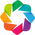

:Overlay
   .Bars.I  :Bars   [Day]   (proportion)
   .Curve.I :Curve   [Day]   (proportion)

In [ ]:
# Plottiing the count plot to understand the day-wise frequency of accidents
day_cnt = np.round(df_copy["Day"].value_counts(normalize=True,sort=False) * 100)
hv.extension('bokeh')
hv.Bars(day_cnt).opts(title="Day Count", color="#ccccff", xlabel="Days") * hv.Curve(day_cnt).opts(width=1000, height=500, color='red', line_width=3)

* Number of accidents are very high in particular days like 4, 8, 11, and 16 in every month.

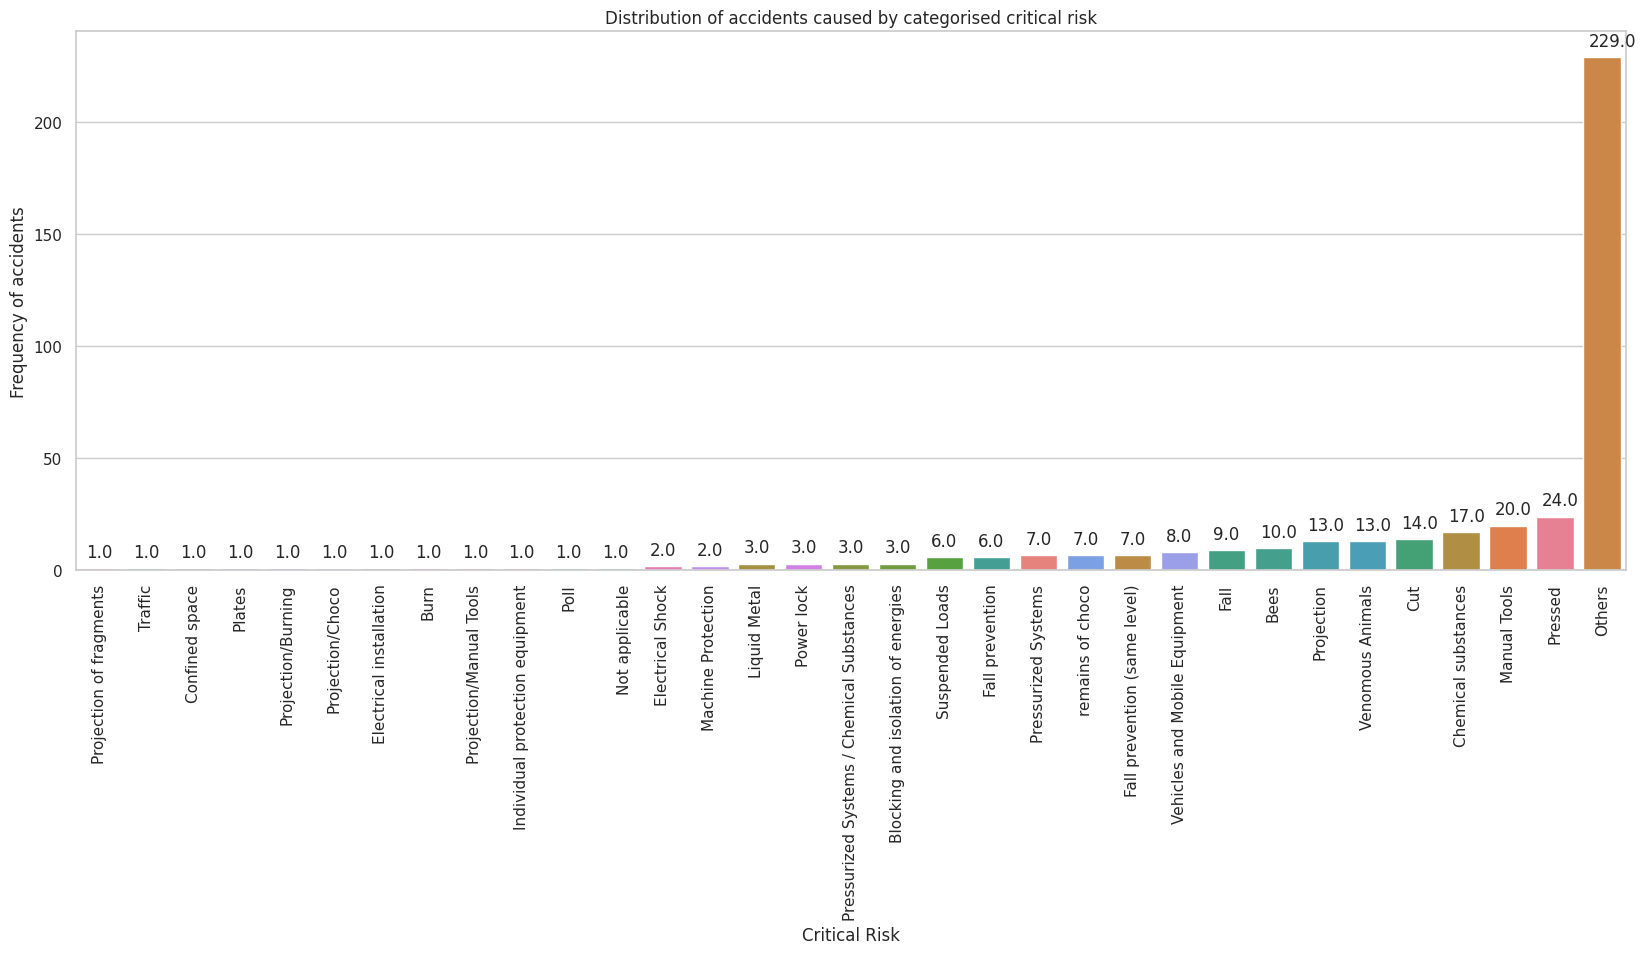

In [ ]:
# Plotting Distribution of accidents caused by categorised critical risk
plt.figure(figsize = (20,7))
ax = sns.countplot(x = df_copy["Critical_Risk"], order=df_copy["Critical_Risk"].value_counts().sort_values(ascending = True).index,hue="Critical_Risk",data=df_copy, legend=False)
plt.title("Distribution of accidents caused by categorised critical risk")
plt.xticks(rotation = "vertical")
plt.xlabel("Critical Risk")
plt.ylabel("Frequency of accidents")

total = sum(df_copy["Critical_Risk"].value_counts())
for p in ax.patches:
    ax.annotate("{}".format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8),
                 textcoords = "offset points")

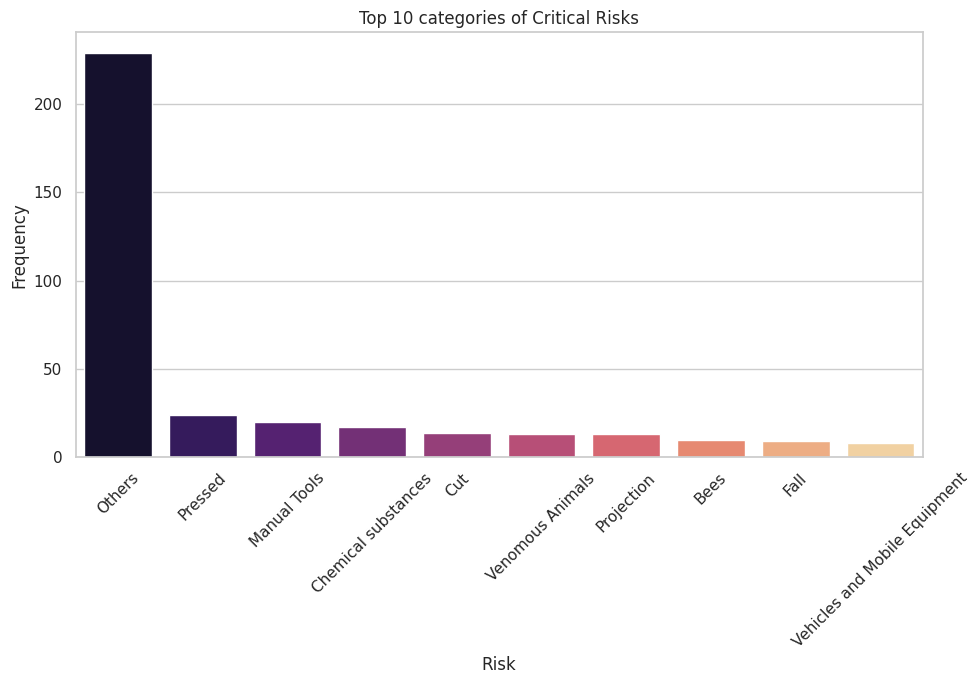

In [ ]:
# Visualizing top 10 categories of Critical Risks

plt.figure(figsize=(10, 7))
sns.countplot(data=df_copy, x="Critical_Risk",
              order=df_copy["Critical_Risk"].value_counts().index[:10], palette="magma")
plt.title("Top 10 categories of Critical Risks")
plt.xlabel("Risk")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

* The majority of the significant risks are categorised as "others," leading some to believe that there are too many hazards to assign a precise category.

* Additionally, it is believed that analysing the risks and causes of accidents takes a great deal of time.

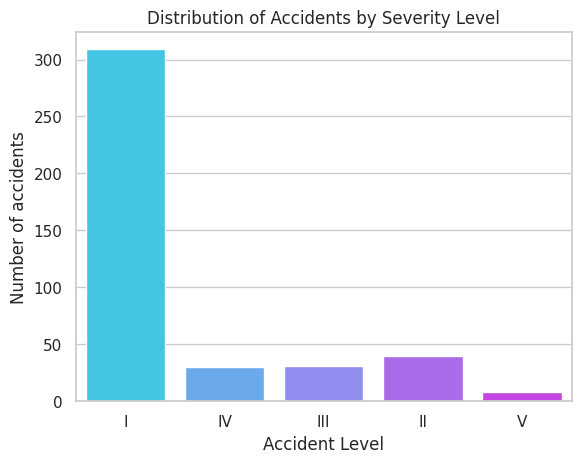

In [ ]:
# Plotting at Count plot for "Accident Level"
sns.countplot(df_copy, x="Accident_Level", palette = "cool");
plt.xlabel("Accident Level");
plt.ylabel("Number of accidents");
plt.title("Distribution of Accidents by Severity Level");

* The graph above shows that, in comparison to other accident types, Type I incidents occur most frequently. This demonstrates that accidents with lower severity levels happen more frequently than those with higher severity levels.

* This graph also indicates that we have a class imbalance. We would want to balance data while building and training the module.

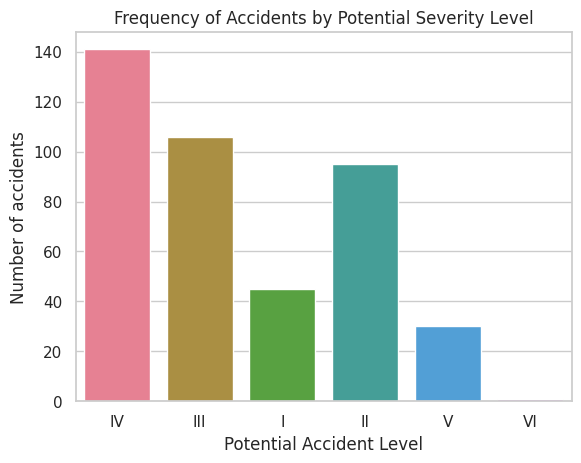

In [ ]:
# Plotting at Count plot for "Potential Accident Level"
sns.countplot(df_copy, x="Potential_Accident_Level", palette = "husl");
plt.xlabel("Potential Accident Level");
plt.ylabel("Number of accidents");
plt.title("Frequency of Accidents by Potential Severity Level");

The graph above shows that:

* The highest frequency is type IV. This indicates that, due to other factors, the acute level can potentially be type IV, which is severe.

* The second highest frequency is type III (little severe) and type II (not so severe).

* Types I (not severe), V (very severe) and VI (highest severity) were found to be less severe compared to the above.

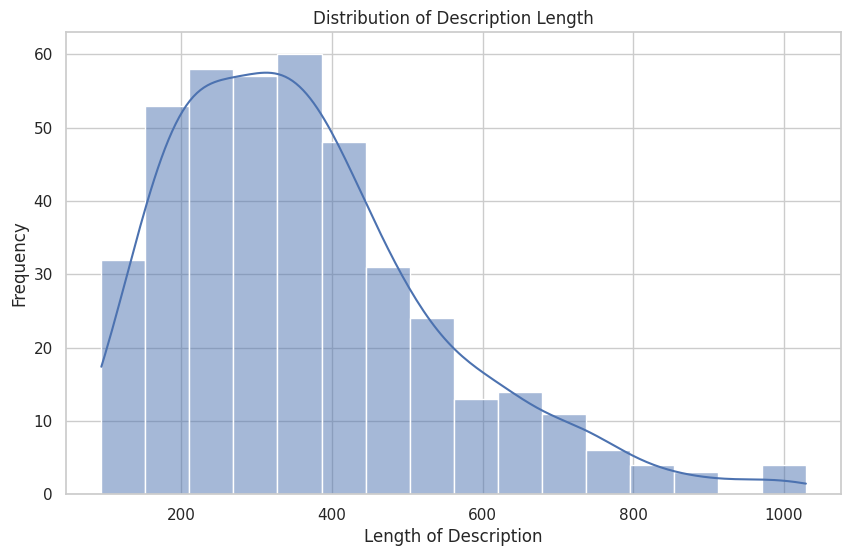

In [ ]:
# Plotting the distribution of description length
plt.figure(figsize=(10, 6));
sns.histplot(df_copy["Description"].apply(len), kde=True);
plt.title("Distribution of Description Length");
plt.xlabel("Length of Description");
plt.ylabel("Frequency");

Based on the above histogram, the following are observations:

* The distribution of description length appears to be right-skewed, with the majority of descriptions being shorter in length, peaking at around 200 characters.

* There are relatively few descriptions with lengths extending beyond 600 characters, indicating that lengthy accident reports are less common.

* The curve suggests that the description length follows an approximate normal distribution for the shorter descriptions but deviates as the length increases, showing a long tail to the right.

##### **Bivariate Analysis:**

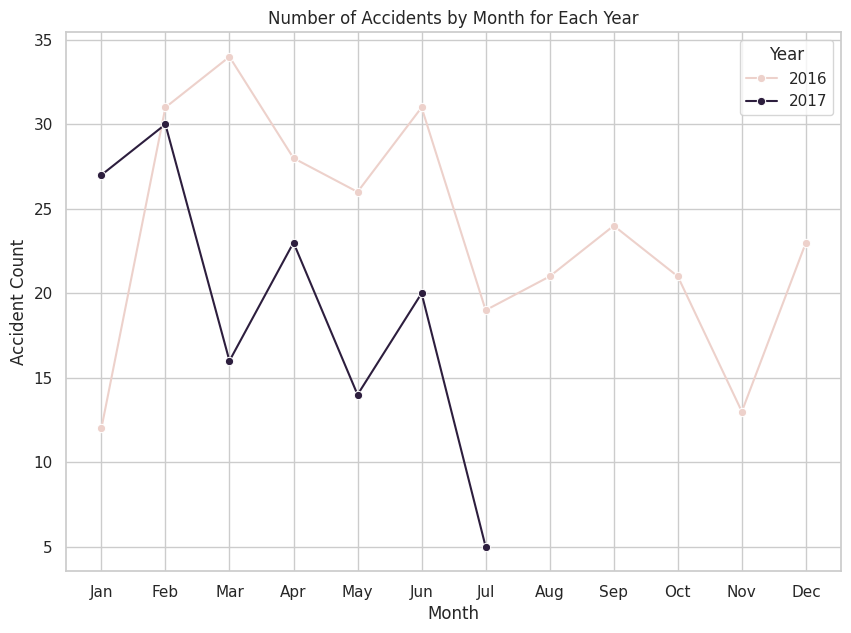

In [ ]:
# Visualizing the number of accidents that occured in each month in 2016 and 2017.

#Group the data by year and month to count the occurences
accidents_by_month = df_copy.groupby(["Year", "Month"]).size().reset_index(name="Accident Count")

#Plotting the data
plt.figure(figsize=(10, 7))
sns.lineplot(data=accidents_by_month, x="Month", y="Accident Count", hue="Year", marker="o")
plt.title("Number of Accidents by Month for Each Year")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)

**Observations:**

* In 2016, the highest number of accidents occured in March and the least number of accidents occured in January.

* In 2017, the highest number of accidents occured in February and the least number of accidents occured in July.

*   Overall number of accidents decreased in 2017 as compared to 2016.



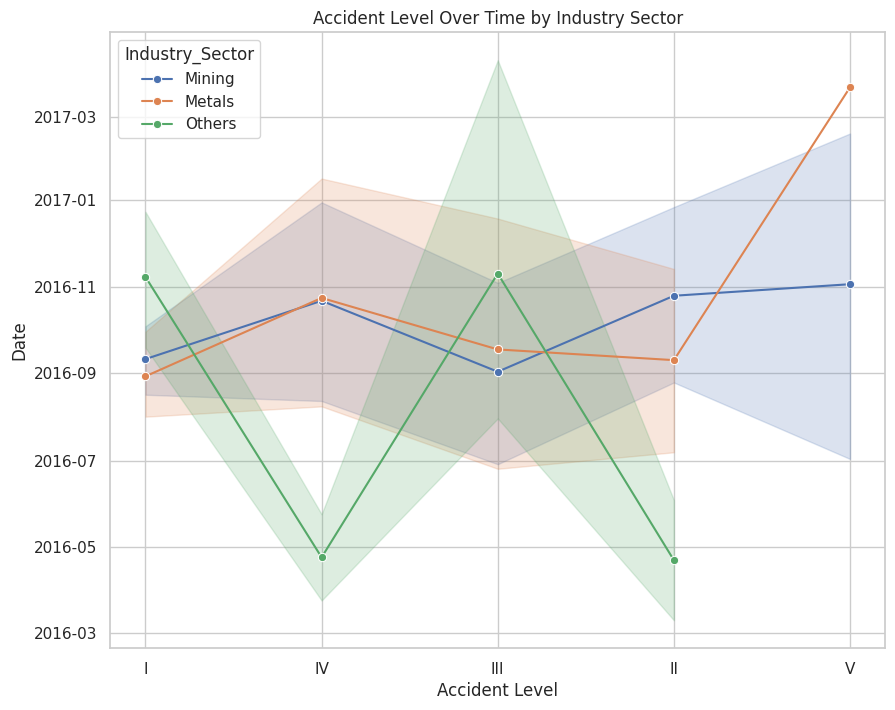

In [ ]:
# Plotting a line chart on "Date" and "Accident Level"
plt.figure(figsize=(10,8));
sns.lineplot(df_copy, y="Date", x="Accident_Level", marker="o", hue = "Industry_Sector");
plt.ylabel("Date");
plt.xlabel("Accident Level");
plt.title("Accident Level Over Time by Industry Sector");

The following observations are made from the above graph:

* Metal sector:
  * The graph shows an increasing trend in the accident level over the observed period.
  * The graph steadily escalates to more severe accident levels, suggesting a potential increase in accident severity over time.
  * This steady increase in the metals sector may suggest deteriorating safety conditions.

* Mining Sector:
  * This sector exhibits volatility in accident levels, with a significant drop between mid-2016 and early 2017, followed by a sharp increase.
  * Mining sectors experience both high and low levels of accident severity, indicating inconsistency in the occurrence of severe accidents.
  * The sharp increase in the graph towards the end of the period could be a cause for concern.

* Other Sector:
  * The other sector demonstrates the most fluctuation, with accident levels varying widely throughout the period.
  * Similar to the mining sector, other sectors experience both high and low levels of accident severity, indicating inconsistency in the occurrence of severe accidents.
  * The other sector has the broadest shaded area, suggesting the greatest variability in accident severity.

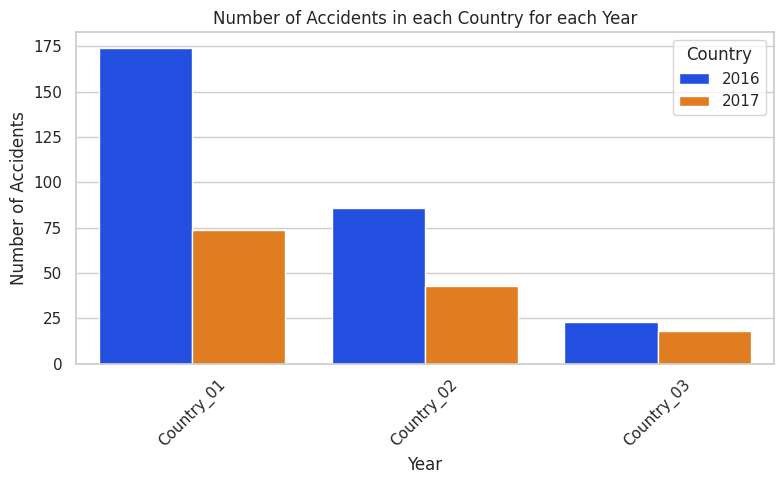

In [ ]:
# Visualizing the number of accidents in each country for each year.
# Grouping the data by "Countries" and "Year" to count the occurrences
accidents_by_country_year = df_copy.groupby(["Country", "Year"]).size().reset_index(name="Count")

#Plotting the data
plt.figure(figsize=(8,5))
sns.barplot(data=accidents_by_country_year, x="Country", y="Count", hue="Year", palette="bright")
plt.title("Number of Accidents in each Country for each Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()

**Observations:**

*   The number of accidents is highest in Country_01, followed by Country_02 and then Country_03 for the year 2016.

*   The same trend is seen in the year 2017.

*   The total number of accidents significantly decreased for all the 3 countries in the year 2017 as compared to 2016.

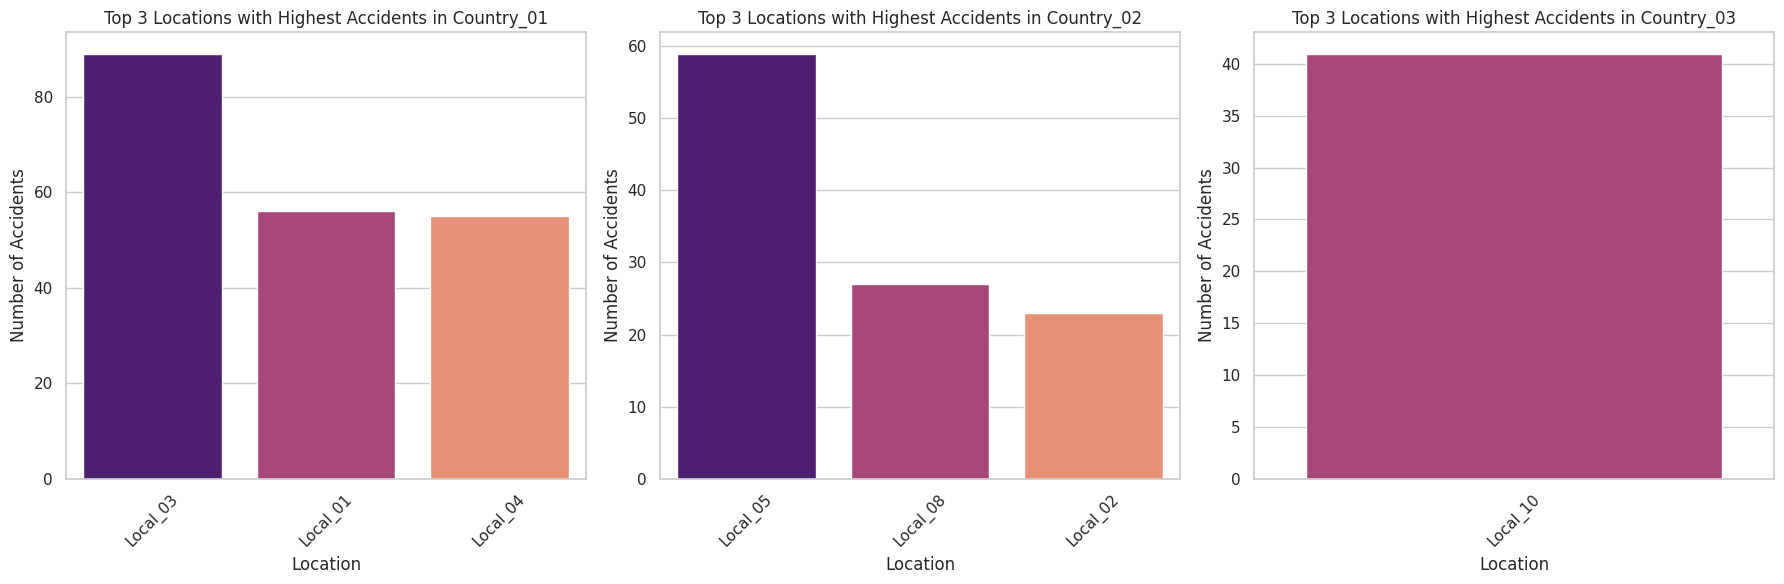

In [ ]:
# Plotting the top 3 locations with the highest number of accidents for each country
# Getting the unique countries
countries = df_copy["Country"].unique()

# Getting the top 3 locations for each country by number of accidents
country_location_counts = df_copy.groupby(["Country", "Location"]).size().reset_index(name="Counts")
country_location_counts = country_location_counts.sort_values(["Country", "Counts"], ascending=[True, False])

# Settiing up the subplots
num_countries = len(countries)
fig, axs = plt.subplots(1, num_countries, figsize=(6*num_countries, 6), squeeze=False)
# Flatten in case there"s only one subplot
axs = axs.flatten()

sns.set(style="whitegrid")

for i, country in enumerate(countries):
    top_locations = country_location_counts[country_location_counts["Country"] == country].head(3)
    ax = axs[i]
    sns.barplot(data=top_locations, x="Location", y="Counts", palette="magma", ax=ax)
    ax.set_title(f"Top 3 Locations with Highest Accidents in {country}")
    ax.set_xlabel("Location")
    ax.set_ylabel("Number of Accidents")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()

**Observations:**

*   The top 3 locations with higest number of accidents in Country_01 are Local_03, Local_01 and Local_04.

*   The top 3 locations with higest number of accidents in Country_02 are Local_05, Local_08 and Local_02.

*   All the accidents in Country_03 occurred in its Local_10.

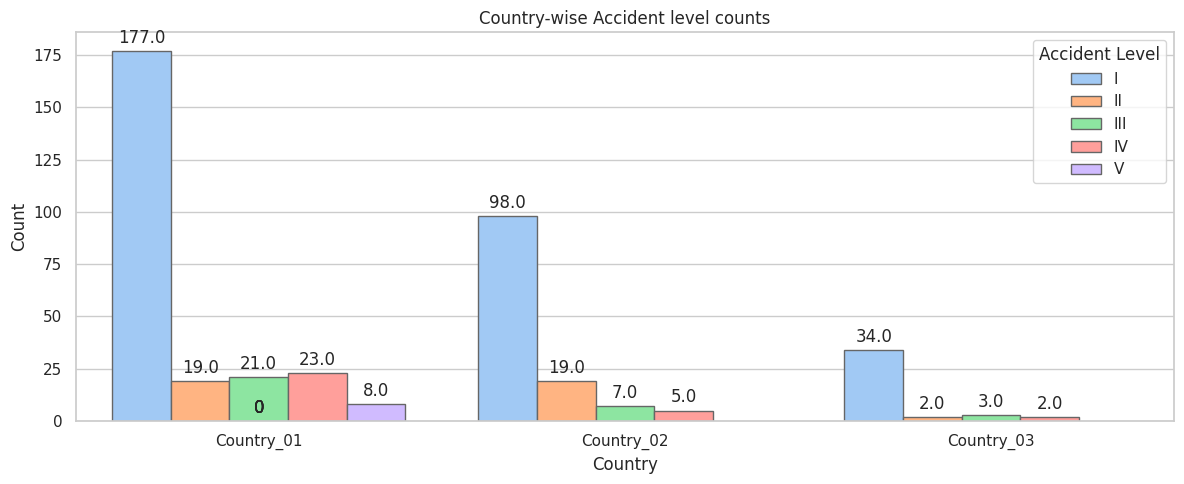

In [ ]:
# Plotting country-wise Accident level counts
plt.figure(figsize=(12, 5))
ax = sns.countplot(
    data=df_copy,
    x="Country",
    hue="Accident_Level",
    hue_order=df_copy["Accident_Level"].value_counts().sort_index().index,
    palette="pastel",
    edgecolor=".4",
    saturation=1,
)

# Annotating the top of each bar with its height
for p in ax.patches:
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        size=12,
        xytext=(0, 3),
        textcoords="offset points",
    )

plt.title("Country-wise Accident level counts")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Accident Level", loc="upper right")
plt.tight_layout()

Based on the above chart, the following are observations:

* Country 1 has the highest frequency of accidents classified as Level I, significantly more than the other levels and countries, with a count of 177.

* Country 2 shows a more even distribution of accident levels compared to Country 1, with Level I still being the most common but with a notably lower count of 98 accidents.

* Country 3 has the lowest overall counts for all accident levels, with Level I accidents being the most common at a count of 34, followed by levels III, II, and IV with counts of 3, 2, and 2, respectively. There are no accidents at Level V reported in Country 3.

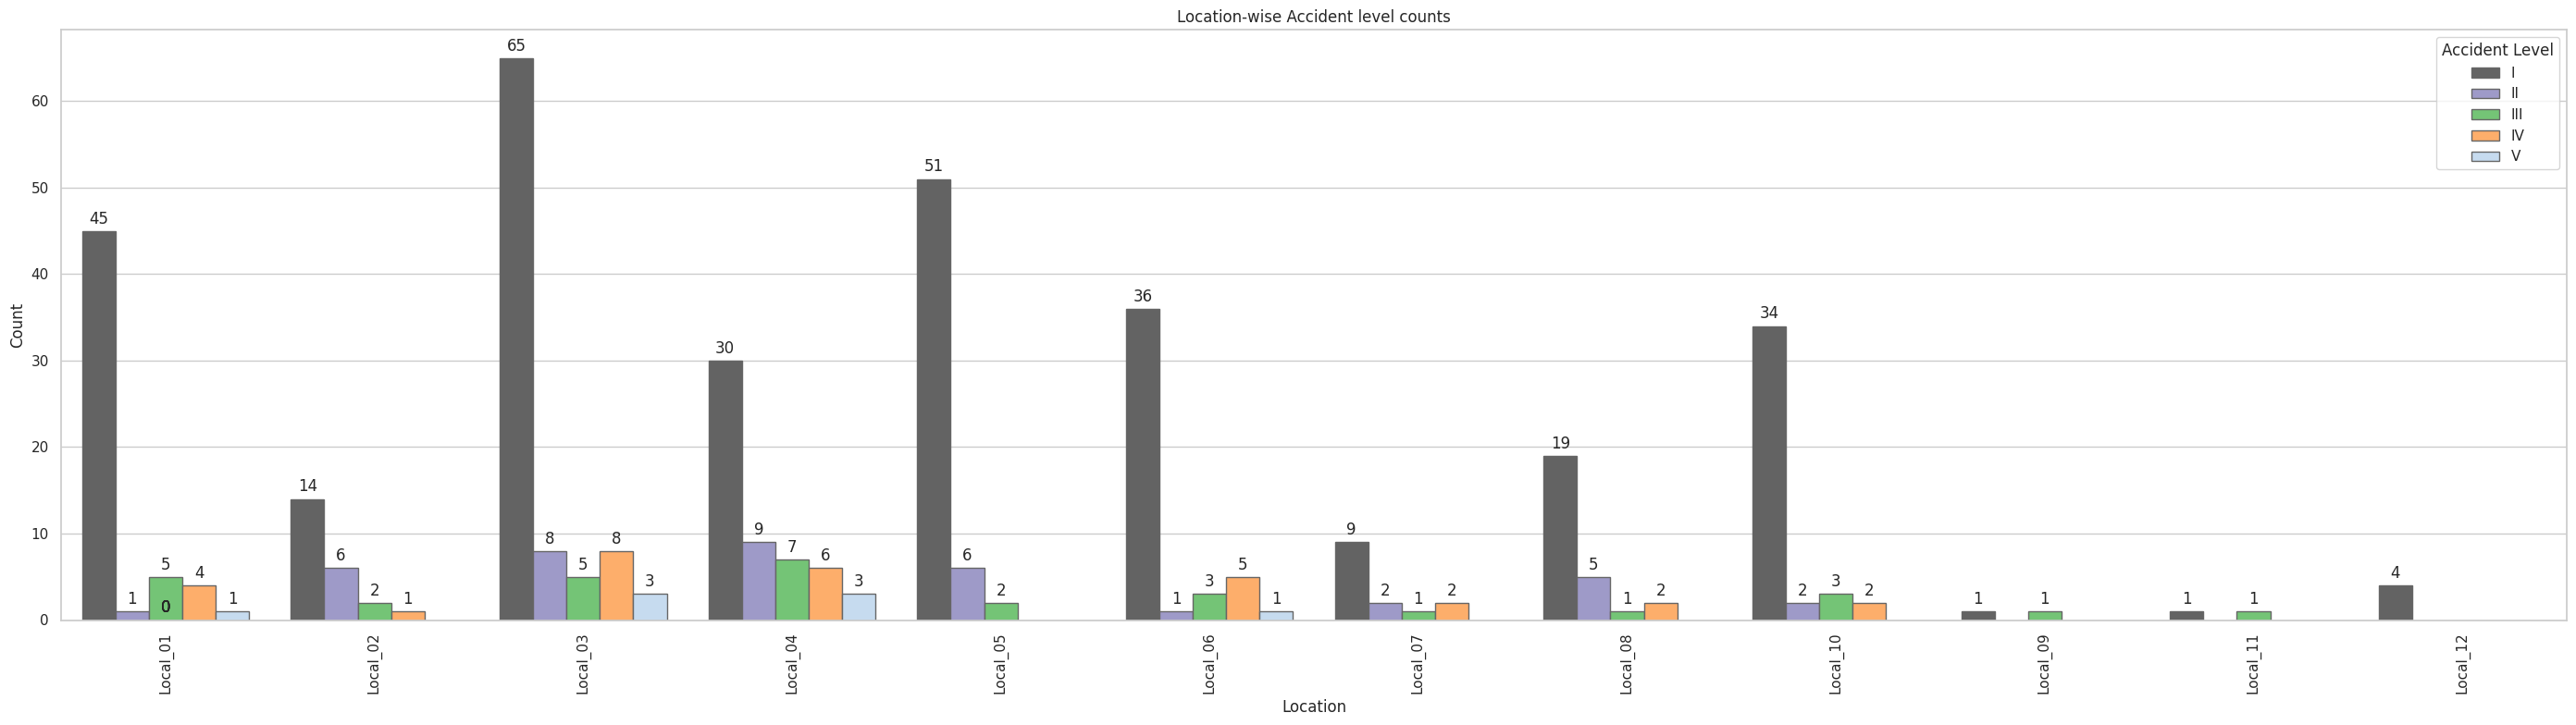

In [ ]:
# Plotting Location-wise Accident level counts
plt.figure(figsize=(28, 8))
ax = sns.countplot(
    x="Location",
    hue="Accident_Level",
    hue_order=df_copy["Accident_Level"].value_counts().sort_index().index,
    palette="tab20c_r",
    edgecolor=".4",
    saturation=1,
    data=df_copy
)

# Annotatiing each bar with its height value
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        size=12,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Location-wise Accident level counts")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Accident Level", loc="upper right")
plt.xticks(rotation=90)
plt.tight_layout()

**Observations:**

* The chart shows a significant variation in the number of accidents across different locations. Some locations, such as Loc_05 and Loc_03, have notably higher accident counts compared to others.

* For almost all locations, Level I accidents are the most frequent, which implies that less severe accidents are more common across the board.

* Even though less serious accidents occur more frequently, higher-severity accidents (Levels IV and V) do occur in some places, though much less frequently.

* Certain locations show a spread across multiple accident severity levels, suggesting a variance in the types of accidents occurring there.

* Local_01 and Local_03 stand out not only for their high overall accident counts but also for having recorded accidents across multiple severity levels, indicating a range of accident types and severities in these areas.

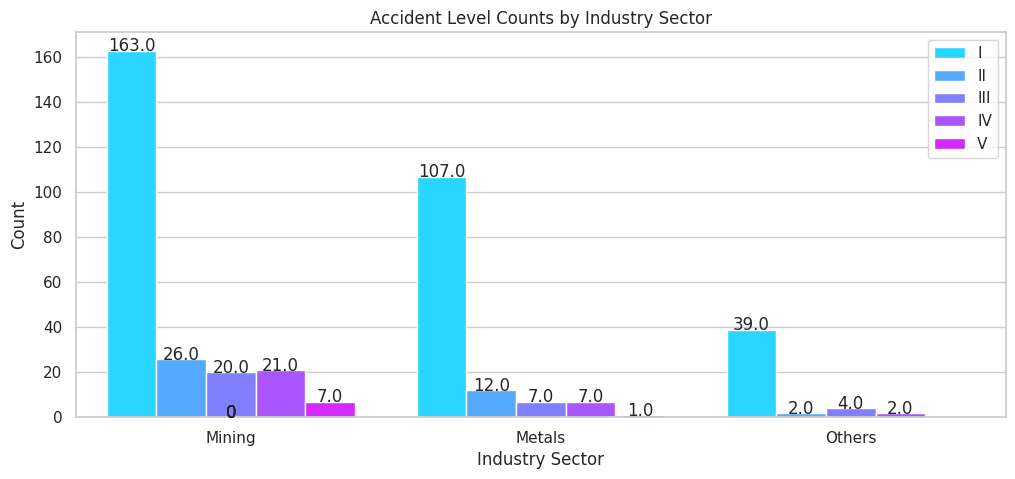

In [ ]:
# Plotting Accident Level vs Industry Sector
plt.figure(figsize=(12,5));
sns.countplot(data=df_copy, x="Industry_Sector", hue="Accident_Level", hue_order=df_copy["Accident_Level"].value_counts().sort_index().index, palette="cool", edgecolor="1.0", saturation=1);

# Calculating the total count
total = df_copy["Industry_Sector"].value_counts().sum()

# Adding annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate("{}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", size=12, xytext=(0, 3), textcoords="offset points")

# Set the plot title and axis labels
plt.title("Accident Level Counts by Industry Sector");
plt.xlabel("Industry Sector");
plt.ylabel("Count");

# Adding the legend
plt.legend(loc="upper right");

From the above graph, it was observed that:

* The mining sector has the highest total number of accidents, with the majority being accident level I, followed by a considerably smaller number of accidents at levels II and III, and no recorded accidents at levels IV and V.

* The metals industry has a lower total number of accidents compared to the mining sector, with a distribution across levels I, II, III, and IV and a single accident at level V. The most common accident level in the metals sector is level I, similar to mining.

* The 'Others' category has the least number of accidents among the three industry sectors displayed, with accidents only occurring at levels I, II, and III. There are no accidents recorded for levels IV and V in this sector.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
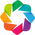

:Bars   [Gender,Industry_Sector]   (value)

In [ ]:
# Plotting Industry Sector by Gender Count
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df_copy.groupby(["Gender","Industry_Sector"])["Industry_Sector"].count().unstack().apply(f, axis=1)
hv.extension("bokeh")
hv.Bars(pd.melt(em_gen.reset_index(), ["Gender"]), ["Gender","Industry_Sector"], "value").opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=["hover"],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter="%d%%"))

**Obervation**:
* There is a higher percentage of males in the mining sector compared to females, indicating that the mining sector might be predominantly male-oriented in this dataset.


* Females have the lowest representation in the 'Others' industry sector, suggesting that this sector might have the smallest gender diversity or the fewest female employees.


* Both genders have their highest representation in different sectors: females are most represented in the metals sector, while males are most represented in the mining sector, highlighting possible gender-based occupational trends within this dataset.


* It is noted that in all three sectors, gender is not equally distributed.



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
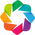

:Bars   [Gender,Accident_Level]   (value)

In [ ]:
# Plotting Accident Level by Gender Count

f = lambda x : np.round(x/x.sum() * 100)
hv.extension("bokeh")
ac_gen = df_copy.groupby(["Gender","Accident_Level"])["Accident_Level"].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ["Gender"]), ["Gender","Accident_Level"], "value").opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = df_copy.groupby(["Gender","Potential_Accident_Level"])["Potential_Accident_Level"].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ["Gender"]), ["Gender","Potential_Accident_Level"], "value").opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac ).opts(opts.Bars(width=800, height=500,tools=["hover"],show_grid=True,xrotation=0, ylabel="Percentage", yformatter="%d%%"))


**Observations:**

* There is a notable gender disparity in the frequency of accidents at all levels, with males experiencing a higher number of accidents across all levels compared to females.

* Accident Level I is the most common for both genders, with a particularly high percentage among males, suggesting that less severe accidents are more frequent.

* For both genders, as the severity of the accident level increases, the frequency of such accidents decreases, which is indicated by the smaller bars for higher accident levels (IV and V) for both females and males.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
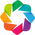

:Bars   [Gender,Potential_Accident_Level]   (value)

In [ ]:
# Plotting Potential Accident Level by Gender Count
hv.extension("bokeh")
( pot_ac).opts(opts.Bars(width=600, height=500,tools=["hover"],show_grid=True,xrotation=0, ylabel="Percentage", yformatter="%d%%"))

The current accident level might have changed into a different accident level owing to other factors. This was recorded in the given data.

Following are the observations regarding the potential accident levels by gender:

* Females most commonly experience accidents with a potential level of III, which indicates a mid-range severity, while males most commonly experience potential accidents at level IV.

* For both genders, potential accident level I, which indicates the least severity, is not the most frequent. This suggests that when accidents occur, they often have the potential to be of higher severity.

* The distribution of potential accident levels varies by gender, with males showing a more uniform distribution across the levels and females showing a concentration at level III. This could point to gaps in reporting patterns or exposure between males and females.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
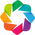

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
      .Curve.VI  :Curve   [Month]   (VI)

In [ ]:
# Plotting Month vise Accident Level & Potential Accident Level

f = lambda x : np.round(x/x.sum() * 100)
hv.extension("bokeh")
ac_mo = df_copy.groupby(["Month","Accident_Level"])["Accident_Level"].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo["I"], label="I") * hv.Curve(ac_mo["II"], label="II") * hv.Curve(ac_mo["III"], label="III") * hv.Curve(ac_mo["IV"], label="IV") * hv.Curve(ac_mo["V"], label="V")\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = df_copy.groupby(["Month","Potential_Accident_Level"])["Potential_Accident_Level"].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo["I"], label="I") * hv.Curve(pot_ac_mo["II"], label="II") * hv.Curve(pot_ac_mo["III"], label="III") * hv.Curve(pot_ac_mo["IV"], label="IV")\
        * hv.Curve(pot_ac_mo["V"], label="V") * hv.Curve(pot_ac_mo["VI"], label="VI").opts(opts.Curve(title="Potential Accident Level by Month Count"))

(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=["hover"],show_grid=True, ylabel="Percentage", yformatter="%d%%")).cols(1)

Both of the two accident levels have the tendency that non-severe levels decreased throughout the year, but severe levels did not change much, and some of these levels increased slightly in the second half of the year.

Following are some detailed observations:

* Accident level I, indicating the least severe accidents, consistently occurs with the highest frequency throughout all months.

* The frequency of potential accident levels appears to be more varied compared to actual accident levels, suggesting that while fewer accidents may occur, their potential severity covers a wider range.

* There's a noticeable spike in potential accident level V in the latter part of the year, suggesting a seasonal influence or particular events that might lead to potentially more severe accidents.

* Potential accident levels II and III show more fluctuation throughout the months, as opposed to actual accident levels II and III, which are more stable.

* For actual accidents, levels II through V maintain a relatively low and stable occurrence throughout the year, implying effective safety measures may be in place to prevent more severe accidents from happening.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
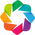

:Bars   [Employee_Type,Accident_Level]   (value)

In [ ]:
# Plotting Employee Type Vs Accident Level

f = lambda x : np.round(x/x.sum() * 100)
hv.extension("bokeh")
ac_em = df_copy.groupby(["Employee_Type","Accident_Level"])["Accident_Level"].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ["Employee_Type"]), ["Employee_Type","Accident_Level"], "value").opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = df_copy.groupby(["Employee_Type","Potential_Accident_Level"])["Potential_Accident_Level"].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ["Employee_Type"]), ["Employee_Type","Potential_Accident_Level"], "value").opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

(ac ).opts(opts.Bars(width=800, height=600,tools=["hover"],show_grid=True,xrotation=0, ylabel="Percentage", yformatter="%d%%",fontsize={"title":9}))

Based on the graph, the following observations are made:

* The least severe accidents, denoted as level I, are the most common among employees and third parties, with the highest percentage in each category.

* Employees experience a higher percentage of level I accidents compared to third parties and third-party remote individuals, suggesting that direct employees may encounter more minor incidents.

* Third-party remote individuals have a visibly lower percentage of accidents across all levels when compared to on-site employees and third-party non-remote individuals, which could indicate fewer hazards in remote working environments.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
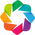

:Bars   [Employee_Type,Potential_Accident_Level]   (value)

In [ ]:
# Plotting Employee Type Vs Potential Accident Level
hv.extension("bokeh")
( pot_ac).opts(opts.Bars(width=800, height=500,tools=["hover"],show_grid=True,xrotation=0, ylabel="Percentage", yformatter="%d%%",fontsize={"title":9}))

* For both accident levels and potential accident levels, the incidence of employees is higher at low accident levels, but the incidence of third parties seems to be slightly higher at high accident levels.

* Potential accidents at levels II and III are notably higher for third parties compared to employees and third-party remote workers. This suggests that third parties on-site may be involved in situations with a higher potential for severe accidents.

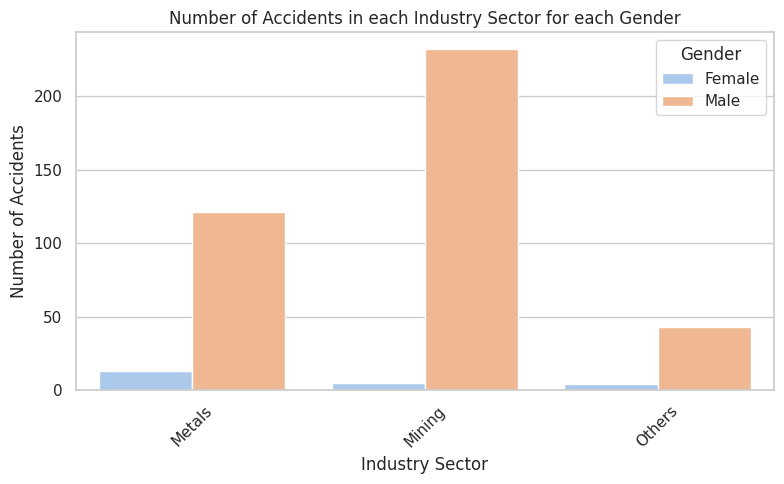

In [ ]:
# Visualizing the number of accidents in each industry sector for each gender.

# Grouping the data by "Industry sector" and "Gender" to count the occurrences
accident_counts = df_copy.groupby(["Industry_Sector", "Gender"]).size().reset_index(name="Count")

#Plotting the data
plt.figure(figsize=(8, 5))
sns.barplot(data=accident_counts, x="Industry_Sector", y="Count", hue="Gender", palette="pastel")
plt.title("Number of Accidents in each Industry Sector for each Gender")
plt.xlabel("Industry Sector")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()

**Observations:**


* The number of accidents for males is highest in the mining sector, followed by the metals sector, and then other sectors.


* The number of accidents for females is highest in the metals sector, followed by the mining sector, and then others.


* The total number of female employees in each sector is significantly less than the total number of male employees.

##### **Multivariate Analysis:**

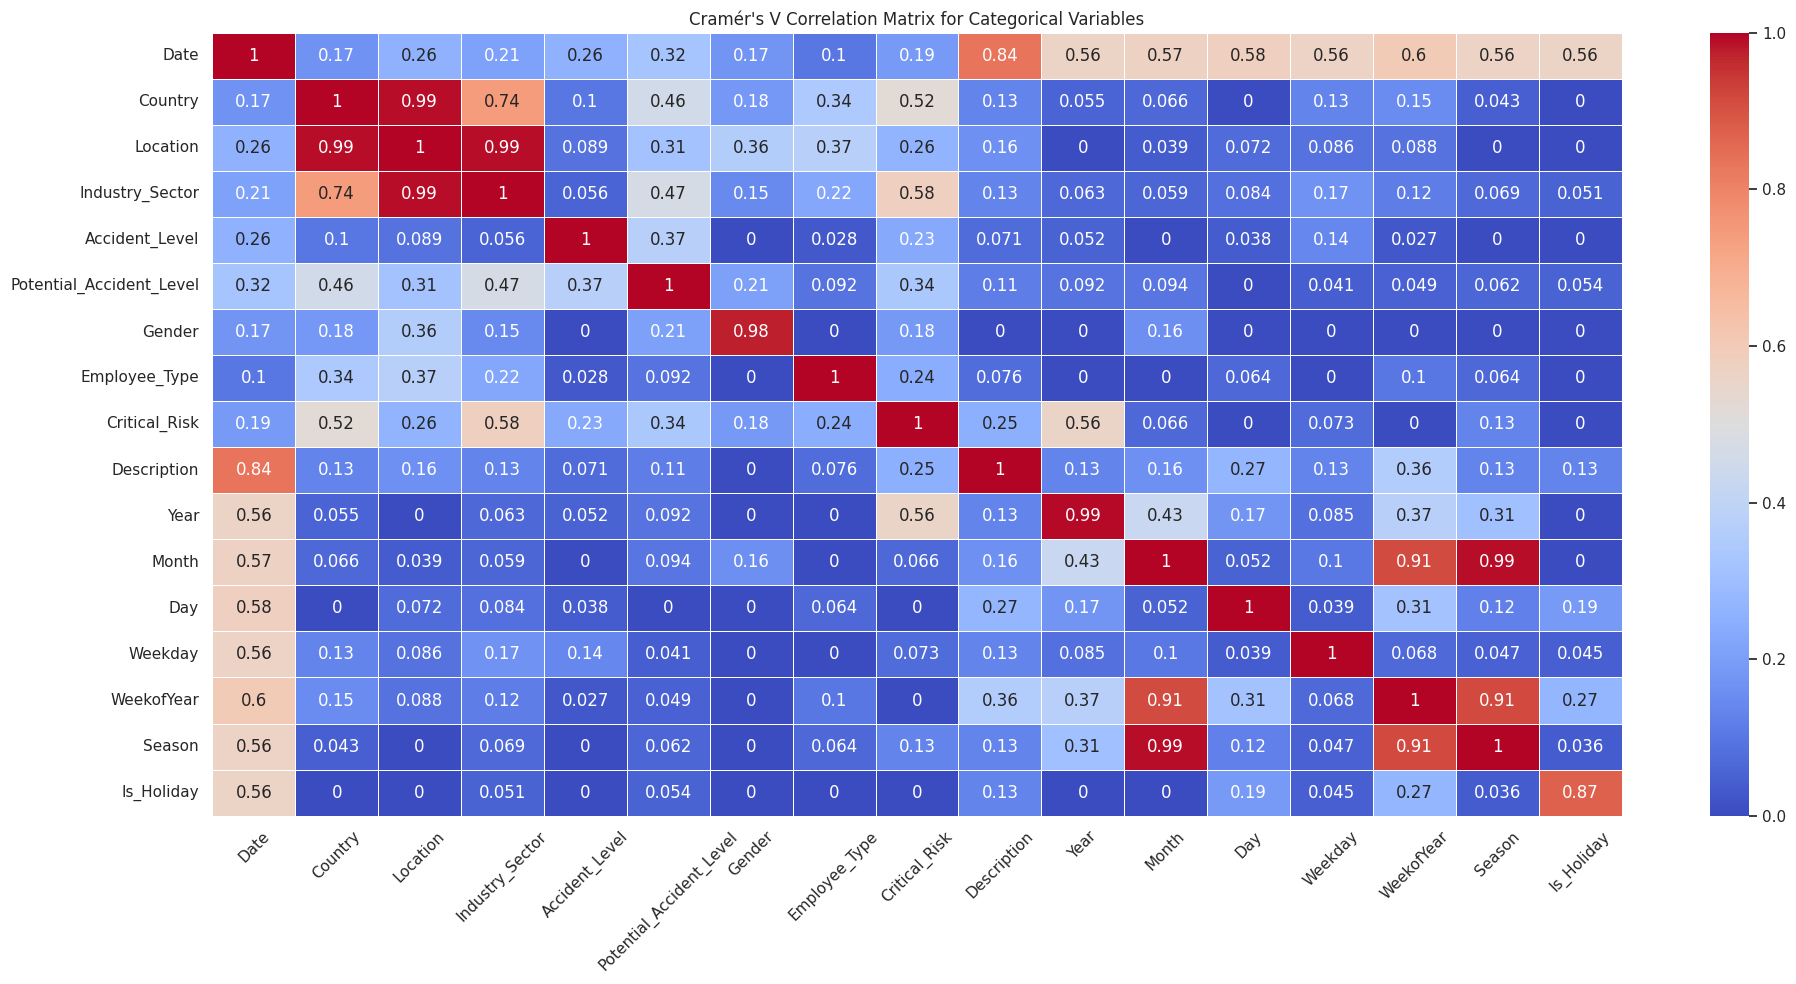

In [ ]:
# Defing a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculating correlation matrix using Cramér's V
correlation_matrix = pd.DataFrame(index=df_copy.columns, columns=df_copy.columns)
for i in df_copy.columns:
    for j in df_copy.columns:
        correlation_matrix.loc[i, j] = cramers_v(df_copy[i], df_copy[j])

# Plotting correlation matrix as heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the above heat map, the following are the few significant observations seen:

* There is a strong correlation between Year, Week of Year, and Season.

* Country and industry sector are strongly correlated with location.

*  "Description" has a notably high correlation with Date, which indicates that the descriptions have date-specific information.

* Potential accident level shows a moderate correlation with accident level, which is expected as the potential level of an accident is likely assessed based on the actual severity.

* When it comes to accident level or Potential accident level, Gender shows very little correlation.

#### **Data preprocessing (NLP Preprocessing techniques)**

NLP preprocessing is a crucial stage in making text data easier for machine learning algorithms to understand and use, which improves the algorithms' capacity to learn from the data.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


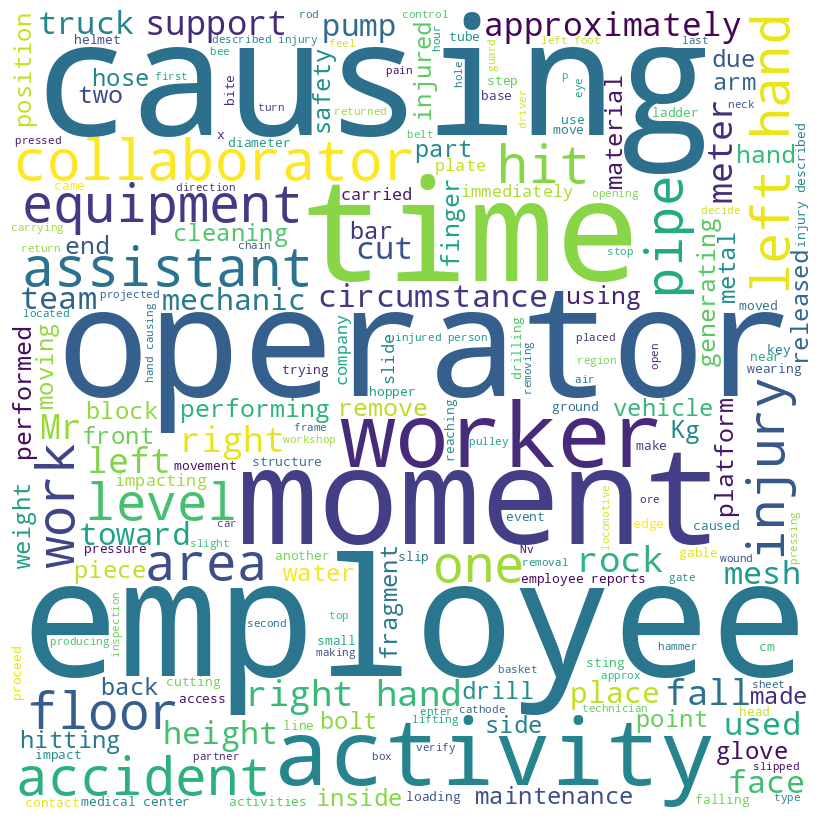

In [ ]:
# Let us understand the most frequent words found in the description column
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

# Setting the stopwords
stop_words = set(stopwords.words('english'))

# Combining all descriptions into one large text string
text = " ".join(description for description in df_copy["Description"].astype(str))

# Generating the word cloud
wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color = 'white',
    stopwords = stop_words,
    min_font_size = 10
).generate(text)

# Displaying the generated image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

**Insights:**
* The prominence of terms like "accident," "injury," "worker," and "employee" suggests that these are frequently occurring elements in the incident reports.
* Words like "activity," "falling," "using," and "equipment" appear frequently, suggesting that many accidents happen when workers are using equipment or performing other tasks. This could be a sign of a procedure or equipment-related risk.
* The terms "hand," "left," "right," and "eye" are mentioned frequently, which may indicate that these body parts are frequently injured and that improved safety precautions or training are needed, with a focus on hand and eye protection.

**Tokenization:**

In [ ]:
# Let us apply Tokenization to "Description" and create a new column "Tokenized_Descriptions"
df_copy["Tokenized_Descriptions"] = df_copy["Description"].apply(word_tokenize)

print(df_copy["Tokenized_Descriptions"].head())

0    [While, removing, the, drill, rod, of, the, Ju...
1    [During, the, activation, of, a, sodium, sulph...
2    [In, the, sub-station, MILPO, located, at, lev...
3    [Being, 9:45, am, ., approximately, in, the, N...
4    [Approximately, at, 11:45, a.m., in, circumsta...
Name: Tokenized_Descriptions, dtype: object


**Lowercasing**:

In [ ]:
# Converting Tokenized_Descriptions to lowercase
df_copy["Tokenized_Descriptions_lowercase"] = df_copy["Tokenized_Descriptions"].apply(lambda tokens: [token.lower() for token in tokens])

print(df_copy["Tokenized_Descriptions_lowercase"].head())

0    [while, removing, the, drill, rod, of, the, ju...
1    [during, the, activation, of, a, sodium, sulph...
2    [in, the, sub-station, milpo, located, at, lev...
3    [being, 9:45, am, ., approximately, in, the, n...
4    [approximately, at, 11:45, a.m., in, circumsta...
Name: Tokenized_Descriptions_lowercase, dtype: object


**Removing Punctuation and Special Characters:**

In [ ]:
# We have time related info that we want to preserve

# Defining a translation table for str.translate() that maps punctuation to None, except for colons.
exclude = set(string.punctuation) - set(":")
table = str.maketrans("", "", "".join(exclude))

# Applying translation table to each tokenized description
df_copy["Tokenized_Descriptions_noP"] = df_copy["Tokenized_Descriptions_lowercase"].apply(lambda tokens: [word.translate(table) for word in tokens])

print(df_copy["Tokenized_Descriptions_noP"].head())

0    [while, removing, the, drill, rod, of, the, ju...
1    [during, the, activation, of, a, sodium, sulph...
2    [in, the, substation, milpo, located, at, leve...
3    [being, 9:45, am, , approximately, in, the, nv...
4    [approximately, at, 11:45, am, in, circumstanc...
Name: Tokenized_Descriptions_noP, dtype: object


**Removing Stop Words:**

In [ ]:
# Loading English stop words
stop_words = set(stopwords.words("english"))

# Defining a function to remove stop words
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

# Applying the function
df_copy["Tokenized_Descriptions_StopW"] = df_copy["Tokenized_Descriptions_noP"].apply(remove_stop_words)

print(df_copy["Tokenized_Descriptions_StopW"].head())

0    [removing, drill, rod, jumbo, 08, maintenance,...
1    [activation, sodium, sulphide, pump, , piping,...
2    [substation, milpo, located, level, 170, colla...
3    [9:45, , approximately, nv, , 1880, cx695, ob7...
4    [approximately, 11:45, circumstances, mechanic...
Name: Tokenized_Descriptions_StopW, dtype: object


**Lemmatization:**

In [ ]:
# Initialising the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Defining a function to apply lemmatization to a list of words
def lemmatize_tokens(token_list):
    return [lemmatizer.lemmatize(token) for token in token_list]

# Applying the function
df_copy["Descriptions_Lemmatized"] = df_copy["Tokenized_Descriptions_StopW"].apply(lemmatize_tokens)

print(df_copy["Descriptions_Lemmatized"].head())

0    [removing, drill, rod, jumbo, 08, maintenance,...
1    [activation, sodium, sulphide, pump, , piping,...
2    [substation, milpo, located, level, 170, colla...
3    [9:45, , approximately, nv, , 1880, cx695, ob7...
4    [approximately, 11:45, circumstance, mechanic,...
Name: Descriptions_Lemmatized, dtype: object


**Word2Vec:**

In [ ]:
# Preparing data:- a lists of words
descriptions = df_copy["Descriptions_Lemmatized"].tolist()

# Training a Word2Vec model
model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Defining a function to convert a list of words into a single vector by averaging the vectors of the words in the list
def document_vector(word_list):

# Removing words not in the model"s vocabulary
    word_list = [word for word in word_list if word in model.wv.key_to_index]

    if len(word_list) == 0:
        return np.zeros(model.vector_size)

# Computing the mean vector of the words in the document
    doc_vector = np.mean(model.wv[word_list], axis=0)
    return doc_vector

# Applying the function to the "Descriptions_Lemmatized" column
df_copy["Descriptions2vec"] = df_copy["Descriptions_Lemmatized"].apply(document_vector)
print(df_copy["Descriptions2vec"].apply(lambda x: x.shape).head())

0    (100,)
1    (100,)
2    (100,)
3    (100,)
4    (100,)
Name: Descriptions2vec, dtype: object


In [ ]:
#Printing df_copy
df_copy.head()

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,...,Day,Weekday,WeekofYear,Season,Tokenized_Descriptions,Tokenized_Descriptions_lowercase,Tokenized_Descriptions_noP,Tokenized_Descriptions_StopW,Descriptions_Lemmatized,Descriptions2vec
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,1,Friday,53,Summer,"[While, removing, the, drill, rod, of, the, Ju...","[while, removing, the, drill, rod, of, the, ju...","[while, removing, the, drill, rod, of, the, ju...","[removing, drill, rod, jumbo, 08, maintenance,...","[removing, drill, rod, jumbo, 08, maintenance,...","[-0.21721, 0.2024074, 0.07439388, 0.14581741, ..."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,2,Saturday,53,Summer,"[During, the, activation, of, a, sodium, sulph...","[during, the, activation, of, a, sodium, sulph...","[during, the, activation, of, a, sodium, sulph...","[activation, sodium, sulphide, pump, , piping,...","[activation, sodium, sulphide, pump, , piping,...","[-0.2117713, 0.19821832, 0.072076224, 0.143299..."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,6,Wednesday,1,Summer,"[In, the, sub-station, MILPO, located, at, lev...","[in, the, sub-station, milpo, located, at, lev...","[in, the, substation, milpo, located, at, leve...","[substation, milpo, located, level, 170, colla...","[substation, milpo, located, level, 170, colla...","[-0.2614604, 0.2426281, 0.08853829, 0.17422366..."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,...,8,Friday,1,Summer,"[Being, 9:45, am, ., approximately, in, the, N...","[being, 9:45, am, ., approximately, in, the, n...","[being, 9:45, am, , approximately, in, the, nv...","[9:45, , approximately, nv, , 1880, cx695, ob7...","[9:45, , approximately, nv, , 1880, cx695, ob7...","[-0.2898435, 0.2674156, 0.09693786, 0.19313201..."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,...,10,Sunday,1,Summer,"[Approximately, at, 11:45, a.m., in, circumsta...","[approximately, at, 11:45, a.m., in, circumsta...","[approximately, at, 11:45, am, in, circumstanc...","[approximately, 11:45, circumstances, mechanic...","[approximately, 11:45, circumstance, mechanic,...","[-0.2682471, 0.24937302, 0.09047426, 0.1817635..."


#### **Saving the Preprocessed Data:**

In [ ]:
# Converting "Descriptions2vec" to array
descriptions2vec_array = np.array(df_copy["Descriptions2vec"].tolist())

# Saveing array to a binary file
np.save("/content/drive/MyDrive/GL/AIML/Capstone Project AIML/NLP_chatbot", descriptions2vec_array)

# Saving the array as dataframe
df = pd.DataFrame(descriptions2vec_array)

# Saving DataFrame to Excel and CSV
excel_path = "/content/drive/MyDrive/GL/AIML/Capstone Project AIML/descriptions2vec.xlsx"
csv_path = "/content/drive/MyDrive/GL/AIML/Capstone Project AIML/descriptions2vec.csv"

# Saving to Excel
df.to_excel(excel_path, index=False)

# Saving to CSV
df.to_csv(csv_path, index=False)

# Saving DataFrame to Excel and CSV
excel_path = "/content/drive/MyDrive/GL/AIML/Capstone Project AIML/df_copy.xlsx"
csv_path = "/content/drive/MyDrive/GL/AIML/Capstone Project AIML/df_copy.csv"

# Saving to Excel
df_copy.to_excel(excel_path, index=False)

# Saving to CSV
df_copy.to_csv(csv_path, index=False)

#### **Building Machine Learning Model:**

We take "Descriptions2vec" as input (X) and "Accident Level" as (Y).

In [ ]:
# Before building let us OneHotEncode "Accident Level"
# Initialising the Label Encoder
label_encoder = LabelEncoder()

# Fitting and transforming "Accident Level" to integer labels
Y = label_encoder.fit_transform(df_copy["Accident_Level"])

In [ ]:
# Counting each encoded label and printing it
unique_values_count = Counter(Y)
print("Counts of unique values in 'Y':", unique_values_count)

Counts of unique values in 'Y': Counter({0: 309, 1: 40, 2: 31, 3: 30, 4: 8})


In [ ]:
# Converting "Descriptions2vec" into a numpy array
X = np.array(df_copy['Descriptions2vec'].tolist())

In [ ]:
# Splitting the dataset into training and testing sets. 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

##### **Logistic Regression**

In [ ]:
# Initialising the Logistic Regression model
# We select solver as "lbfgs" and multi_class as "multinomial." This is a good choice considering the problem statement since we are dealing with a multiclass classification problem.
lr_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=1000, random_state=42)

# Training the model
lr_model.fit(X_train, Y_train)

# Making predictions on the training set
Y_train_pred = lr_model.predict(X_train)

# Making predictionson the test set
Y_test_pred = lr_model.predict(X_test)

In [ ]:
  # Printing Training accuracy
  train_accuracy = accuracy_score(Y_train, Y_train_pred)
  print(f"Training Accuracy: {train_accuracy:.4f}")

  # Printing Test accuracy
  test_accuracy = accuracy_score(Y_test, Y_test_pred)
  print(f"Test Accuracy: {test_accuracy:.4f}")

  # Obtaining the class names from the label encoder
  class_names = label_encoder.classes_

  # Printing Classification report for the training set
  print("Classification Report for Training Set:")
  print(classification_report(Y_train, Y_train_pred, target_names=class_names))

  # Printing Classification report for the test set
  print("Classification Report for Test Set:")
  print(classification_report(Y_test, Y_test_pred, target_names=class_names))

Training Accuracy: 0.7363
Test Accuracy: 0.7460
Classification Report for Training Set:
              precision    recall  f1-score   support

           I       0.74      1.00      0.85       215
          II       0.00      0.00      0.00        29
         III       0.00      0.00      0.00        24
          IV       0.00      0.00      0.00        18
           V       0.00      0.00      0.00         6

    accuracy                           0.74       292
   macro avg       0.15      0.20      0.17       292
weighted avg       0.54      0.74      0.62       292

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.75      1.00      0.85        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.75       126
   macr

  **Observations:**

* Both training (74%) and test (75%) accuracies are relatively high, which indicates good model performance. However, this high accuracy is primarily due to the model's ability to correctly predict the majority class ("I").

* The imbalance towards the majority class shows that accuracy is not an adequate measure of model performance for this project, as it does not reflect the model's poor performance with minority classes.

* The precision, recall, and F1-score for classes II, III, IV, and V are all zero in both training and test sets. This indicates that the model is unable to correctly identify any instances of these minority classes, likely due to the significant class imbalance.

* The model shows a recall of 1.00 in both training and test sets, meaning it correctly identifies all actual instances of class I. However, this comes at the expense of ignoring other classes, as evidenced by the zero recall for other classes.

* The model's inability to recognise minority classes is a critical issue, as these classes represent more severe accident levels that are crucial to predict accurately.


###### **Hypertuning:**

In [ ]:
# Defining the parameter grid
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10,100,200],
    'max_iter': [100, 200, 500, 1000],
    'class_weight': [None, 'balanced'],

    }

In [ ]:
# Re-Initialising the model
lr_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=42)

# Initialising RandomizedSearchCV
# Using weighted F1-score as the scoring metric
random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_distributions,
                                   n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1,
                                   scoring="f1_weighted")

# Fitting RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Printing the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_iter': 100, 'class_weight': None, 'C': 0.001}
Best Score: 0.624560028801725


In [ ]:
# Predicting on the training set
Y_train_pred_best = random_search.predict(X_train)

# Predicting on the test set
Y_test_pred_best = random_search.predict(X_test)

# Calculating and printing the accuracy for the training set
train_accuracy_best = accuracy_score(Y_train, Y_train_pred_best)
print(f"Training Set Accuracy after Hyper-Tuning: {train_accuracy_best:.4f}")

# Calculating and printing the accuracy for the test set
test_accuracy_best = accuracy_score(Y_test, Y_test_pred_best)
print(f"Test Set Accuracy after Hyper-Tuning: {test_accuracy_best:.4f}")

# Printing the classification report for the training set
print("\nClassification Report for Training Set after Hyper-Tuning:")
print(classification_report(Y_train, Y_train_pred_best, target_names=class_names))

# Printing the classification report for the test set
print("Classification Report for Test Set after Hyper-Tuning:")
print(classification_report(Y_test, Y_test_pred_best, target_names=class_names))

Training Set Accuracy after Hyper-Tuning: 0.7363
Test Set Accuracy after Hyper-Tuning: 0.7460

Classification Report for Training Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.74      1.00      0.85       215
          II       0.00      0.00      0.00        29
         III       0.00      0.00      0.00        24
          IV       0.00      0.00      0.00        18
           V       0.00      0.00      0.00         6

    accuracy                           0.74       292
   macro avg       0.15      0.20      0.17       292
weighted avg       0.54      0.74      0.62       292

Classification Report for Test Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.75      1.00      0.85        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.

**Observations:**

After hyperparameter tuning, the results indicate that there was no noticeable improvement in the model's performance. The accuracy on the training and test sets remains the same as before tuning, and similarly, the precision, recall, and F1-scores for minority classes have not improved.

Let us fix the data imbalance issue and redo the hyper tuning.

In [ ]:
# Initialisiing SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(2, len(np.unique(Y_train))-1))

# Applying SMOTE
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Checking the class distribution after resampling
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

Class distribution after SMOTE: Counter({0: 215, 2: 215, 1: 215, 3: 215, 4: 215})


In [ ]:
# Defining parameter distributions again
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 500, 1000],
    'class_weight': [None, 'balanced'],}

# Initialising the Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

# Initialising RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_distributions,
                                   n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1,
                                   scoring=make_scorer(f1_score, average='weighted'))

# Fitting RandomizedSearchCV using the resampled data
random_search.fit(X_train_resampled, Y_train_resampled)

# Printing the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'max_iter': 100, 'class_weight': None, 'C': 10}
Best Score: 0.3004927832505267


In [ ]:
# Gettng the best parameters from RandomizedSearchCV
best_lr_model = random_search.best_estimator_

# Making predictions on the resampled training set using the best parameters
Y_train_resampled_pred = best_lr_model.predict(X_train_resampled)

# Making predictions on the original test set using the best parameters
Y_test_pred = best_lr_model.predict(X_test)

# Calculating and printing the accuracy for the resampled training set
train_resampled_accuracy = accuracy_score(Y_train_resampled, Y_train_resampled_pred)
print(f"Resampled Training Set Accuracy: {train_resampled_accuracy:.4f}")

# Calculating and printing the accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Printing the classification report for the resampled training set
print("\nClassification Report for Resampled Training Set:")
print(classification_report(Y_train_resampled, Y_train_resampled_pred, target_names=label_encoder.classes_))

# Printing the classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred, target_names=label_encoder.classes_))

Resampled Training Set Accuracy: 0.3656
Test Set Accuracy: 0.1508

Classification Report for Resampled Training Set:
              precision    recall  f1-score   support

           I       0.32      0.07      0.11       215
          II       0.29      0.60      0.39       215
         III       0.32      0.67      0.44       215
          IV       0.34      0.05      0.09       215
           V       0.95      0.43      0.59       215

    accuracy                           0.37      1075
   macro avg       0.44      0.37      0.32      1075
weighted avg       0.44      0.37      0.32      1075

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.83      0.11      0.19        94
          II       0.07      0.36      0.12        11
         III       0.08      0.57      0.13         7
          IV       0.33      0.08      0.13        12
           V       0.00      0.00      0.00         2

    accuracy                    

**Observations:**

* There's a significant increase in recall for classes II, III, and V in the resampled training set. This indicates that after SMOTE, the model will pay more attention to these previously underrepresented classes, which is reflected in their improved recall scores.

* The precision for most classes except class V has decreased, leading to a lower F1-score compared to the majority class. This indicates that while the model is now identifying more true positives in the minority classes, it is also making more false positive errors.

* The model's performance drops dramatically on the test set, with an overall accuracy of 15%. This drop suggests that while SMOTE improved the model's sensitivity to minority classes in the training set, it did not effectively translate into test data.

*  For classes II and III, there's an increase in recall in the test set, indicating some success in identifying minority classes. However, this comes at a significant cost to precision, leading to low F1-scores.

* The model failed to correctly predict any instances of classes IV and V, as indicated by zero precision and recall in the scores, highlighting a severe limitation.

##### **Gradient Boosting classifier**

In [ ]:
#Initializing the classifier
gbc=GradientBoostingClassifier()

#Training the classifier
gbc.fit(X_train, Y_train)

#Predicting the accident levels
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

In [ ]:
#Evaluating the Gradient Boosting classifier
#In-sample results
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print("Classification Report for Train set: \n")
print(classification_report(Y_train, y_train_pred))

print("*"*60)

#Out-of-sample results
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Classification Report for Test set: \n")
print(classification_report(Y_test, y_test_pred))

Training Accuracy: 0.9966
Classification Report for Train set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        24
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00         6

    accuracy                           1.00       292
   macro avg       0.99      0.99      0.99       292
weighted avg       1.00      1.00      1.00       292

************************************************************
Testing Accuracy: 0.7302
Classification Report for Test set: 

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        94
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        

**Observations:**

*   The model performs extremely well in-sample but performs poorly out-of-sample, which is a classic case of overfitting the training data.

*   The model is unable to classify any instances of the minority classes in the test data, which resulted in poor Precision, Recall and hence F1-score for these classes. This impacted the model's overall performance metrics and it did not generalize well.

###### **Hypertuning:**

In [ ]:
#Defining parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],           # Shrinks the contribution of each tree
    'max_depth': [3, 5, 7],                      # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
}

In [ ]:
#Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

In [ ]:
%%time
# Fitting the RandomizedSearchCV to the training data and extracting the best estimator directly
gbc_best = random_search.fit(X_train, Y_train).best_estimator_

# Printing the best parameters
print("Best Parameters:", random_search.best_params_)

# Predicting the accident levels
y_train_pred = gbc_best.predict(X_train)
y_test_pred = gbc_best.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
CPU times: user 16.8 s, sys: 2.97 s, total: 19.8 s
Wall time: 21min 56s


In [ ]:
#Evaluating the model with tuned hyperparameters
#In-sample results
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print("Classification Report for Train set: \n")
print(classification_report(Y_train, y_train_pred))

print("*"*60)

#Out-of-sample results
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Classification Report for Test set: \n")
print(classification_report(Y_test, y_test_pred))

Training Accuracy: 0.9932
Classification Report for Train set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        24
           3       0.94      0.94      0.94        18
           4       1.00      1.00      1.00         6

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292

************************************************************
Testing Accuracy: 0.7302
Classification Report for Test set: 

              precision    recall  f1-score   support

           0       0.75      0.97      0.84        94
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        

**Observations:**

*   The best parameters were found to be: 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.01.

*   The overfitting reduced in the tuned model as compared to the base model.

*   The tuned model is still not able to classify instances of the minority classes during training and testing, which resulted in poor Precision, Recall and hence poor F1-score.

Let's select key features, adjust hyperparameters, and train the model using balanced data.

In [ ]:
# Applying SMOTE to handle imbalanced classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
# Printing the shape of X and Y After SMOTE
print("Shape of X_train_resampled: ", X_train_resampled.shape)
print("Shape of y_train_resampled: ", y_train_resampled.shape)

Shape of X_train_resampled:  (1075, 100)
Shape of y_train_resampled:  (1075,)


In [ ]:
# Printing the class distribution in target variable before and after applying SMOTE
print("Class distribution before applying SMOTE:", Counter(Y_train))
print("Class distribution after applying SMOTE:", Counter(y_train_resampled))

Class distribution before applying SMOTE: Counter({0: 215, 1: 29, 2: 24, 3: 18, 4: 6})
Class distribution after applying SMOTE: Counter({0: 215, 2: 215, 1: 215, 3: 215, 4: 215})


In [ ]:
#Fitting the classifier to obtain feature importances using resampled data
gbc.fit(X_train_resampled, y_train_resampled)

#Selecting important features
selector = SelectFromModel(gbc, prefit=True)
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test)

In [ ]:
#Shape of the X and y variables before SMOTE and feature selection
print("Before applying SMOTE and Feature selection: \n")
print("Shape of X in training set: ", X_train.shape)
print("Shape of y in training set: ", Y_train.shape)
print("\n")
print("Shape of X in testing set: ", X_test.shape)
print("Shape of y in testing set: ", Y_test.shape)

print("*"*60)

#Displaying the shape of the final X and y variables after SMOTE and feature selection
print("After applying SMOTE and Feature selection: \n")
print("Shape of X in training set: ", X_train_selected.shape)
print("Shape of y in training set: ", y_train_resampled.shape)
print("\n")
print("Shape of X in testing set: ", X_test_selected.shape)
print("Shape of y in testing set: ", Y_test.shape)

Before applying SMOTE and Feature selection: 

Shape of X in training set:  (292, 100)
Shape of y in training set:  (292,)


Shape of X in testing set:  (126, 100)
Shape of y in testing set:  (126,)
************************************************************
After applying SMOTE and Feature selection: 

Shape of X in training set:  (1075, 23)
Shape of y in training set:  (1075,)


Shape of X in testing set:  (126, 23)
Shape of y in testing set:  (126,)


Re-doing Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Defining parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],           # Shrinks the contribution of each tree
    'max_depth': [3, 5, 7],                      # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Re-Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

In [ ]:
%%time
#Fitting the RandomizedSearchCV to the training data
random_search.fit(X_train_selected,y_train_resampled)

#Extracting the best parameters found by GridSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}
CPU times: user 29 s, sys: 3.56 s, total: 32.6 s
Wall time: 26min 14s


In [ ]:
#Training the model with best parameters, resampled data with selected features
best_gbc = random_search.best_estimator_

#Predicting the accident levels
y_train_pred = best_gbc.predict(X_train_selected)
y_test_pred = best_gbc.predict(X_test_selected)

In [ ]:
#Evaluating the model with balanced classes, selected features and tuned hyperparameters
#In-sample results
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print("Classification Report for Train set: \n")
print(classification_report(y_train_resampled, y_train_pred))

print("*"*60)

#Out-of-sample results
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Classification Report for Test set: \n")
print(classification_report(Y_test, y_test_pred))

Training Accuracy: 0.9991
Classification Report for Train set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       215
           2       1.00      1.00      1.00       215
           3       1.00      1.00      1.00       215
           4       1.00      1.00      1.00       215

    accuracy                           1.00      1075
   macro avg       1.00      1.00      1.00      1075
weighted avg       1.00      1.00      1.00      1075

************************************************************
Testing Accuracy: 0.6190
Classification Report for Test set: 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        94
           1       0.00      0.00      0.00        11
           2       0.23      0.43      0.30         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        

**Observations:**

*   Using the balanced data and the selected important features, the best parameters were found to be : 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2.

*   The model still had some overfitting of data during training but it performed much better in classifying instances of the minority classes after balancing the classes, selecting important features and tuning the hyperparameters as compared to the base model.

*   The model showed lesser accuracy, but it was able to capture more True positives and fewer False positives and False negatives with a considerably smaller set of features as compared to the base model.

##### **Random Forest**

In [ ]:
# Initializing the classifier
clf = RandomForestClassifier(n_estimators=50)

In [ ]:
# Training the model
clf.fit(X_train, Y_train)

# Making predictions on the training set
Y_train_pred = clf.predict(X_train)

# Making predictionson the test set
Y_test_pred = clf.predict(X_test)

In [ ]:
# Printing the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

class_names = label_encoder.classes_

print("Classification Report for Training Set:")
print(classification_report(Y_train, Y_train_pred, target_names=class_names))

print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred, target_names=class_names))

Training Accuracy: 0.9897
Test Accuracy: 0.7381
Classification Report for Training Set:
              precision    recall  f1-score   support

           I       0.99      1.00      1.00       215
          II       0.97      0.97      0.97        29
         III       1.00      1.00      1.00        24
          IV       1.00      0.89      0.94        18
           V       1.00      1.00      1.00         6

    accuracy                           0.99       292
   macro avg       0.99      0.97      0.98       292
weighted avg       0.99      0.99      0.99       292

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.74      0.99      0.85        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.74       126
   macr

**Observations:**

* The model overfits to the training data, as evidenced by the test accuracy dropping to 73.02% from a high training accuracy of 99.32%.

* The model performs well in terms of recall and precision for Accident Level I in the test set, but it is unable to predict any cases accurately for Accident Levels II, III, IV, and V. This implies that although the model does a great job of forecasting the majority class, it has trouble with minority classes, which may be related to a class disparity.

Let us see how the model performs after hypertuning.

###### **Hypertuning:**

In [ ]:
# Defining parameter for hyperparameter tuning
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
%%time
# Fitting the RandomizedSearchCV to the training data
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

randomCV.fit(X_train, Y_train)

# Printing the best parameters
print(f"Best Parameters: {randomCV.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}
CPU times: user 1.04 s, sys: 64.6 ms, total: 1.11 s
Wall time: 35.1 s


In [ ]:
# Printing the best estimator
Y_train_pred_best = randomCV.best_estimator_.predict(X_train)
Y_test_pred_best = randomCV.best_estimator_.predict(X_test)

# Calculating and printing the accuracy for the train and test sets
train_accuracy_best = accuracy_score(Y_train, Y_train_pred_best)
print(f"Post-hypertuning Accuracy in train set: {train_accuracy_best:.4f}")

test_accuracy_best = accuracy_score(Y_test, Y_test_pred_best)
print(f"Post-hypertuning Accuracy in test set: {test_accuracy_best:.4f}")

# Printing classification reports for the train and test sets
print("\nPost-Hypertuning Classification Report for train set:")
print(classification_report(Y_train, Y_train_pred_best, target_names=class_names))

print("Post-Hypertuning Classification Report for test set:")
print(classification_report(Y_test, Y_test_pred_best, target_names=class_names))

Post-hypertuning Accuracy in train set: 0.7911
Post-hypertuning Accuracy in test set: 0.7460

Post-Hypertuning Classification Report for train set:
              precision    recall  f1-score   support

           I       0.78      1.00      0.88       215
          II       1.00      0.41      0.59        29
         III       1.00      0.12      0.22        24
          IV       1.00      0.06      0.11        18
           V       0.00      0.00      0.00         6

    accuracy                           0.79       292
   macro avg       0.76      0.32      0.36       292
weighted avg       0.82      0.79      0.73       292

Post-Hypertuning Classification Report for test set:
              precision    recall  f1-score   support

           I       0.75      1.00      0.85        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      

**Observations:**

* Overfitting has reduced After hypertuning.

* There is a slight increase in test accuracy to 74.60%.

* Despite hypertuning, the model still does not predict any cases for Accident Levels II, III, IV, and V correctly in the test set. This suggests that the model continues to struggle with class imbalance and has a bias towards the majority class (I).


Let us fix the data imbalance issue and redo the hyper tuning.

In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(2, len(np.unique(Y_train))-1))
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Checking the class distribution after resampling
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

Class distribution after SMOTE: Counter({0: 215, 2: 215, 1: 215, 3: 215, 4: 215})


In [ ]:
# Defining Params and Running the model again
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
%%time
# Re-Fitting the RandomizedSearchCV to the training data
randomCV = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
randomCV.fit(X_train_resampled, Y_train_resampled)

print("Best Parameters:", randomCV.best_params_)
print("Best Score:", randomCV.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Best Score: 0.9089355737404651
CPU times: user 2.29 s, sys: 219 ms, total: 2.51 s
Wall time: 1min 5s


In [ ]:
# Predicting the accident levels again
best_rf_model = randomCV.best_estimator_

Y_train_resampled_pred = best_rf_model.predict(X_train_resampled)

Y_test_pred = best_rf_model.predict(X_test)

# Calculating and printing the accuracy for the resampled training set

train_resampled_accuracy = accuracy_score(Y_train_resampled, Y_train_resampled_pred)
print(f"Accuracy of Resampled Train Set: {train_resampled_accuracy:.4f}")

# Calculating and printing the accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy of Resampled Test Set: {test_accuracy:.4f}")

# Printing the classification report for the resampled training set
print("\nClassification Report for Resampled Training Set:")
print(classification_report(Y_train_resampled, Y_train_resampled_pred, target_names=label_encoder.classes_))

# Printing the classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred, target_names=label_encoder.classes_))

Accuracy of Resampled Train Set: 0.9981
Accuracy of Resampled Test Set: 0.6825

Classification Report for Resampled Training Set:
              precision    recall  f1-score   support

           I       1.00      1.00      1.00       215
          II       1.00      1.00      1.00       215
         III       1.00      1.00      1.00       215
          IV       1.00      1.00      1.00       215
           V       1.00      1.00      1.00       215

    accuracy                           1.00      1075
   macro avg       1.00      1.00      1.00      1075
weighted avg       1.00      1.00      1.00      1075

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.79      0.86      0.83        94
          II       0.17      0.09      0.12        11
         III       0.11      0.14      0.12         7
          IV       0.38      0.25      0.30        12
           V       0.00      0.00      0.00         2

    accuracy       

**Observations:**

* The model overfits the training set even after SMOTE and hypertuning.

* There is a drop in test accuracy to 52.38%. The significant difference between training and test accuracy suggests the model might not generalise well to new and unseen data.

* When compared to previous random forest models prior to the application of SMOTE, there is a slight improvement in the prediction of minority classes (II, III, and IV), with levels III and IV showing a higher recall.

* The model still fails to predict the rarest class (V) accurately, which indicates persistent issues with learning from highly imbalanced data even after applying SMOTE.


##### **Decision Tree:**

In [ ]:
# Initialising the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the training set
Y_train_pred = decision_tree.predict(X_train)

# Making predictions on the test set
Y_test_pred = decision_tree.predict(X_test)

In [ ]:
# Printing training set performance
print("Training Set Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Classification Report for Training Set:")
print(classification_report(Y_train, Y_train_pred))

# Printing test set performance
print("Test Set Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred))

Training Set Accuracy: 0.9965753424657534
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        24
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00         6

    accuracy                           1.00       292
   macro avg       0.99      0.99      0.99       292
weighted avg       1.00      1.00      1.00       292

Test Set Accuracy: 0.5873015873015873
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        94
           1       0.25      0.27      0.26        11
           2       0.08      0.14      0.10         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                 

**Observations:**

* The model achieves a very high accuracy of 99.65% on the training set.
High accuracy indicates that the model has learned to classify the majority of the training samples correctly.

* The model demonstrates high precision and recall across all classes.

* This high score indicates that the model overfits the training set.

* Due to overfitting, the accuracy drastically drops to 58.73% on the test set, indicating issues with the model's generalisation.

* The model struggles significantly with the minority classes on the test set, as indicated by low precision, recall, and F1-scores.

###### **Hypertuning:**

In [ ]:
# Defining parameters to fine tune
param_distributions = {
# Combining explicit list with random samples
    "max_depth": [10, 20, 30, None] + list(randint(3, 10).rvs(size=5)),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),}

In [ ]:
# Re-Initialisng the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialising RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_distributions,
                                      n_iter=50, cv=5, scoring=make_scorer(f1_score, average='weighted'),
                                      random_state=42, n_jobs=-1, verbose=1)

# Fitting Randomized dSearch
random_search_dt.fit(X_train, Y_train)


# Priting Best model parameters
print("Best Parameters:", random_search_dt.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [ ]:
# Making predictions on the training set using the best model
Y_train_pred_h = random_search_dt.predict(X_train)

# Making predictions on the test set using the best model
Y_test_pred_h = random_search_dt.predict(X_test)

# Printing training set performance
print("Training Set Accuracy:", accuracy_score(Y_train, Y_train_pred_h))
print("Classification Report for Training Set:")
print(classification_report(Y_train, Y_train_pred_h))

# Printing test set performance
print("Test Set Accuracy:", accuracy_score(Y_test, Y_test_pred_h))
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred_h))

Training Set Accuracy: 0.910958904109589
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       215
           1       0.80      0.97      0.88        29
           2       0.77      0.96      0.85        24
           3       0.75      1.00      0.86        18
           4       0.50      1.00      0.67         6

    accuracy                           0.91       292
   macro avg       0.76      0.96      0.84       292
weighted avg       0.94      0.91      0.92       292

Test Set Accuracy: 0.46825396825396826
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        94
           1       0.17      0.27      0.21        11
           2       0.06      0.14      0.08         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                 

**Observations:**

* The training set accuracy post-tuning is high at 90%, indicating effective learning. Overfitting was slightly reduced.

* The classification report for the training set shows improved precision, recall, and F1-scores across all classes, including minority classes (1 through 4).

* The test set's accuracy has decreased to 48.41% post-tuning from 59% before tuning.

* The model continues to struggle with identifying minority classes (1, 2, 3, and 4) accurately, as seen by the low or zero precision and recall in these classes.

* Hypertune has improved performance on the training set. However, translating these improvements to the test set, especially for minority classes, remains challenging for the model.

* The model's performance could improve by balancing data and training the model with cross-validation (with stratification).

Let us fix the data imbalance issue and redo the hyper tuning.

In [ ]:
# Applying SMOTE
X_train_resampled_dt, Y_train_resampled_dt = smote.fit_resample(X_train, Y_train)

# Initialising StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Re-Initialising RandomizedSearchCV
random_search_dt_S = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_distributions,
                                      n_iter=50, cv=stratified_kfold, scoring=make_scorer(f1_score, average='weighted'),
                                      random_state=42, n_jobs=-1, verbose=1)

# Fitting Randomized Search after smote
random_search_dt_S.fit(X_train_resampled_dt, Y_train_resampled_dt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None, 6, 5, 6,
                                                      8, 6],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb5e6339de0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb5e65afac0>},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [ ]:
# Printing the best model parameters
print("Best Parameters:", random_search_dt_S.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [ ]:
# Making predictions on the training set using the best model
Y_train_pred_S = random_search_dt_S.predict(X_train_resampled_dt)

# Making predictions on the test set using the best model
Y_test_pred_S = random_search_dt_S.predict(X_test)

# Printing training set performance
print("Training Set Accuracy:", accuracy_score(Y_train_resampled_dt, Y_train_pred_S))
print("Classification Report for Training Set:")
print(classification_report(Y_train_resampled_dt, Y_train_pred_S))

# Printing test set performance
print("Test Set Accuracy:", accuracy_score(Y_test, Y_test_pred_S))
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred_S))

Training Set Accuracy: 0.9813953488372092
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       215
           1       0.99      1.00      0.99       215
           2       1.00      0.97      0.98       215
           3       0.99      0.97      0.98       215
           4       1.00      0.98      0.99       215

    accuracy                           0.98      1075
   macro avg       0.98      0.98      0.98      1075
weighted avg       0.98      0.98      0.98      1075

Test Set Accuracy: 0.47619047619047616
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        94
           1       0.09      0.09      0.09        11
           2       0.00      0.00      0.00         7
           3       0.12      0.17      0.14        12
           4       0.00      0.00      0.00         2

    accuracy                

**Observations:**
* The model achieves very high accuracy, with similarly high precision, recall, and F1-scores across all classes on the resampled training set.
* Models are still overfit. As a fact, decision trees generally overfit.
* On the test set, the model's accuracy drops to 39%. It does remarkably well on the balanced training set, but its F1-scores, precision, and recall for minority classes 1-4 in the test set are low.

#####**Gaussian Naive Bayes**

In [ ]:
# Initialising Naive Bayes model
Gus = GaussianNB()

# Fitting the model
Gus.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Making predictions on the training set
Y_train_pred = Gus.predict(X_train)

# Making predictions on the test set
Y_test_pred = Gus.predict(X_test)

In [ ]:
# Printing Training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Printing Test accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


# Obtaining the class names from the label encoder
class_names = label_encoder.classes_

# Printing Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(Y_train, Y_train_pred, target_names=class_names))

# Printing Classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred, target_names=class_names))

Training Accuracy: 0.1267
Test Accuracy: 0.0714
Classification Report for Training Set:
              precision    recall  f1-score   support

           I       0.82      0.04      0.08       215
          II       0.14      0.31      0.19        29
         III       0.12      0.71      0.21        24
          IV       0.00      0.00      0.00        18
           V       0.02      0.33      0.05         6

    accuracy                           0.13       292
   macro avg       0.22      0.28      0.11       292
weighted avg       0.63      0.13      0.10       292

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.67      0.02      0.04        94
          II       0.10      0.27      0.15        11
         III       0.07      0.57      0.12         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.07       126
   macr

**Observations on the Naive Bayes model**

* The training accuracy is very low, at approximately 11.64%, suggesting the model is not learning effectively from the training data.
The test accuracy is even lower, at around 7.14%, indicating the model is performing poorly on unseen data.
* Looking at the classification report, the model seems to struggle with all accident levels.

It would be important to look into hyperparameter tuning to improve these metrics.

###### **Hypertuning:**

In [ ]:
# Defining the parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# Initialising RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=Gus,param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Fitting the model
rs_model.fit(X_train, Y_train)

# Printing the best parameters
print(f"Best parameters: {rs_model.best_params_}")
print(f"Best Score: {rs_model.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'var_smoothing': 1.0}
Best Score: 0.1981


In [ ]:
# Predicting on the training and test set using the best found parameters
Y_train_pred_best = rs_model.predict(X_train)
Y_test_pred_best = rs_model.predict(X_test)

# Calculating and printing accuracy for the training and test sets
train_accuracy_best = accuracy_score(Y_train, Y_train_pred_best)
test_accuracy_best = accuracy_score(Y_test, Y_test_pred_best)
print(f"Training Set Accuracy after Hyper-Tuning: {train_accuracy_best:.4f}")
print(f"Test Set Accuracy after Hyper-Tuning: {test_accuracy_best:.4f}")

# Obtaining the class names from the label encoder
class_names = label_encoder.classes_

# Printing classification reports for both sets
print("\nClassification Report for Training Set after Hyper-Tuning:")
print(classification_report(Y_train, Y_train_pred_best, target_names=class_names))

print("\nClassification Report for Test Set after Hyper-Tuning:")
print(classification_report(Y_test, Y_test_pred_best, target_names=class_names))

Training Set Accuracy after Hyper-Tuning: 0.3253
Test Set Accuracy after Hyper-Tuning: 0.3016

Classification Report for Training Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.72      0.33      0.45       215
          II       0.13      0.31      0.18        29
         III       0.12      0.62      0.20        24
          IV       0.00      0.00      0.00        18
           V       0.00      0.00      0.00         6

    accuracy                           0.33       292
   macro avg       0.19      0.25      0.17       292
weighted avg       0.56      0.33      0.37       292


Classification Report for Test Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.82      0.33      0.47        94
          II       0.09      0.27      0.13        11
         III       0.07      0.57      0.13         7
          IV       0.00      0.00      0.00        12
           V       0.00      0

**Observations after hypertuning**

* Both the training set's accuracy (32.19%) and the test set's accuracy (30.16%) are relatively low.

* The model shows varied performance across different accident levels.

* The model struggles with Accident Levels IV and V, showing no improvement in predicting these minority classes even after hyper-tuning.

Let us understand how the hypertuned model performs after balancing the data.

In [ ]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=min(2, len(np.unique(Y_train))-1))

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
# Initialize the model
nb = GaussianNB()

# Define the cross-validation strategy
rskfold = RepeatedStratifiedKFold(random_state=42)

# Initialize RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=nb, param_distributions=param_grid, cv=rskfold, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Fit the model
rs_model.fit(X_train_resampled, y_train_resampled)

# Extracting the best parameters and scores
print("Best parameters:", rs_model.best_params_)
print("Best Score:", rs_model.best_score_)

Fitting 50 folds for each of 10 candidates, totalling 500 fits
Best parameters: {'var_smoothing': 4.328761281083061e-09}
Best Score: 0.25489690708015567


In [ ]:
# Predicting on the training and test sets using the best model
Y_train_pred_best = rs_model.predict(X_train_resampled)
Y_test_pred_best = rs_model.predict(X_test)

# Calculating and printng accuracy for the training and test sets
train_accuracy_best = accuracy_score(y_train_resampled, Y_train_pred_best)
test_accuracy_best = accuracy_score(Y_test, Y_test_pred_best)
print(f"Resampled Training Set Accuracy: {train_accuracy_best:.4f}")
print(f"Test Set Accuracy: {test_accuracy_best:.4f}")

# Printing classification reports for both sets
print("\nClassification Report for Resampled Training Set:")
print(classification_report(y_train_resampled, Y_train_pred_best, target_names=class_names))

print("\nClassification Report for Test Set after Hyper-Tuning:")
print(classification_report(Y_test, Y_test_pred_best, target_names=class_names))

Resampled Training Set Accuracy: 0.3219
Test Set Accuracy: 0.1032

Classification Report for Resampled Training Set:
              precision    recall  f1-score   support

           I       0.36      0.11      0.17       215
          II       0.29      0.26      0.27       215
         III       0.33      0.53      0.41       215
          IV       0.00      0.00      0.00       215
           V       0.33      0.70      0.44       215

    accuracy                           0.32      1075
   macro avg       0.26      0.32      0.26      1075
weighted avg       0.26      0.32      0.26      1075


Classification Report for Test Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.53      0.10      0.16        94
          II       0.04      0.09      0.05        11
         III       0.07      0.43      0.11         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy

**Observations:**

* After resampling with SMOTE and hyper-tuning, the training set accuracy slightly decreased to 31.16%, and the test set accuracy significantly dropped to 10.32%.

* The classification report for the training set shows relatively better performance in classes III and V, with recall rates of 49% and 70%, respectively. However, class IV shows no improvement, indicating the model's inability to correctly identify samples from this class even after SMOTE.

* The model shows poor generalisation to unseen data.

#####**Multinomial Naive Bayes**

In [ ]:
# MultinomialNB requires non-negative features, Hence use MinMaxScaler on X
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialising Multinomial Naive Bayes model
MNB = MultinomialNB()

# Fitting the model
MNB.fit(X_train_scaled, Y_train)

MultinomialNB()

In [ ]:
# Making predictions on the training set
Y_train_pred = MNB.predict(X_train_scaled)

# Making predictions on the test set
Y_test_pred = MNB.predict(X_test_scaled)

# Printing Training accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Printing Test accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Printing Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(Y_train, Y_train_pred, target_names=class_names))

# Printing Classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(Y_test, Y_test_pred, target_names=class_names))

Training Accuracy: 0.6610
Test Accuracy: 0.6746
Classification Report for Training Set:
              precision    recall  f1-score   support

           I       0.73      0.88      0.80       215
          II       0.17      0.07      0.10        29
         III       0.10      0.08      0.09        24
          IV       0.00      0.00      0.00        18
           V       0.00      0.00      0.00         6

    accuracy                           0.66       292
   macro avg       0.20      0.21      0.20       292
weighted avg       0.56      0.66      0.60       292

Classification Report for Test Set:
              precision    recall  f1-score   support

           I       0.75      0.90      0.82        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.67       126
   macr

**Observations:**
* Test accuracy is slightly higher at 67.46% than training accuracy, which is 65.75%. This indicates that the model performs moderately well in generalising new data, but not significantly overfitting.

* The model is relatively effective at identifying the most frequent classes.

* The model significantly struggles with the minority classes (II, III, IV, and V), as demonstrated by very low precision and recall values across these classes.

* In both training and test sets, these classes have either zero or very low scores, suggesting the model's inability to accurately classify less frequent accident levels.

Let us check how the model performs after hypertuning.

###### **Hypertuning:**

In [ ]:
# Defining the parameter grid
param_grid = {
    "alpha": np.linspace(0.1, 2, 20),
    "fit_prior": [True, False],}

In [ ]:
# Initialising RandomizedSearchCV with cross-validation strategy
RandS = RandomizedSearchCV(MultinomialNB(), param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Fitting the model
RandS.fit(X_train_scaled, Y_train)

# Printing the best parameters
print(f"Best parameters: {RandS.best_params_}")
print(f"Best Score: {RandS.best_score_:.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'fit_prior': True, 'alpha': 1.9}
Best Score: 0.6060


In [ ]:
# Predicting using the best found parameters
Y_train_pred_best = RandS.predict(X_train_scaled)
Y_test_pred_best = RandS.predict(X_test_scaled)

# Printing accuracies
print(f"Training Set Accuracy after Hyper-Tuning: {accuracy_score(Y_train, Y_train_pred_best):.4f}")
print(f"Test Set Accuracy after Hyper-Tuning: {accuracy_score(Y_test, Y_test_pred_best):.4f}")

# Printing Classification reports
print("\nClassification Report for Training Set after Hyper-Tuning:")
print(classification_report(Y_train, Y_train_pred_best, target_names=class_names))
print("\nClassification Report for Test Set after Hyper-Tuning:")
print(classification_report(Y_test, Y_test_pred_best, target_names=class_names))

Training Set Accuracy after Hyper-Tuning: 0.6678
Test Set Accuracy after Hyper-Tuning: 0.6905

Classification Report for Training Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.73      0.89      0.80       215
          II       0.17      0.07      0.10        29
         III       0.11      0.08      0.10        24
          IV       0.00      0.00      0.00        18
           V       0.00      0.00      0.00         6

    accuracy                           0.67       292
   macro avg       0.20      0.21      0.20       292
weighted avg       0.56      0.67      0.61       292


Classification Report for Test Set after Hyper-Tuning:
              precision    recall  f1-score   support

           I       0.75      0.93      0.83        94
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00         7
          IV       0.00      0.00      0.00        12
           V       0.00      0

**Observations:**

* The training set accuracy is 67.12% and the test set accuracy is 69.05%, respectively, following hyper-tuning. These results indicate a subtle increase in accuracy.

* The model continues to perform best in the majority class (I).

* Despite hyper-tuning, the model's performance on minority classes (II, III, IV, and V) shows no significant improvement, with very low or zero precision and recall values.

Let us apply Smote and re-check the performance of the model.

In [ ]:
# Initialising SMOTE and scale the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, Y_train)

In [ ]:
# Refitting RandomizedSearchCV on resampled data
RandS.fit(X_resampled, y_resampled)

# Printing Best parameters
print("Best parameters after resampling:", RandS.best_params_)

# Making Predictions
Y_train_pred_resampled = RandS.predict(X_resampled)
Y_test_pred_resampled = RandS.predict(X_test_scaled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters after resampling: {'fit_prior': True, 'alpha': 0.3}


In [ ]:
# Re printing accuracies
print(f"Resampled Training Set Accuracy: {accuracy_score(y_resampled, Y_train_pred_resampled):.4f}")
print(f"Test Set Accuracy after resampling: {accuracy_score(Y_test, Y_test_pred_resampled):.4f}")

# Re printing classification reports
print("\nClassification Report for Resampled Training Set:")
print(classification_report(y_resampled, Y_train_pred_resampled, target_names=class_names))
print("\nClassification Report for Test Set after resampling:")
print(classification_report(Y_test, Y_test_pred_resampled, target_names=class_names))

Resampled Training Set Accuracy: 0.2930
Test Set Accuracy after resampling: 0.1429

Classification Report for Resampled Training Set:
              precision    recall  f1-score   support

           I       0.18      0.09      0.12       215
          II       0.28      0.56      0.37       215
         III       0.32      0.69      0.44       215
          IV       0.16      0.02      0.04       215
           V       0.45      0.10      0.17       215

    accuracy                           0.29      1075
   macro avg       0.28      0.29      0.23      1075
weighted avg       0.28      0.29      0.23      1075


Classification Report for Test Set after resampling:
              precision    recall  f1-score   support

           I       0.90      0.10      0.17        94
          II       0.08      0.36      0.13        11
         III       0.07      0.57      0.13         7
          IV       0.33      0.08      0.13        12
           V       0.00      0.00      0.00         

**Observations:**

* Resampled training set accuracy dropped to 29.02%, a significant decrease. This suggests that although SMOTE assisted in class balancing, the model had difficulty correctly classifying the balanced data.


* The test set's accuracy after resampling plummeted to 11.90% highlighting the model's inability to generalise the learned patterns from the resampled training set (balanced data)  to the test set (Orginal imbalanced data) .


* The model showed an improved recall for classes II, III, and somewhat for class V on the resampled training set, indicating it was better at identifying these accident levels after SMOTE.

* However, the precision remains low, indicating many false positives. In other words, the model is also making a significant number of incorrect predictions across all classes.

##### **Support Vector Machine (SVM)**

In [ ]:
# Training the SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

# Making Predictions

y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)


# Evaluating the Model
accuracy_train = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

accuracy_test = accuracy_score(Y_test, y_pred_test)
print("Accuracy after training:", accuracy_test)

print("Classification Report for training:")
print(classification_report(Y_train, y_pred_train))

print("Classification Report after training:")
print(classification_report(Y_test, y_pred_test))

Training Accuracy: 0.7363013698630136
Accuracy after training: 0.746031746031746
Classification Report for training:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       215
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         6

    accuracy                           0.74       292
   macro avg       0.15      0.20      0.17       292
weighted avg       0.54      0.74      0.62       292

Classification Report after training:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                  

**Observations:**

* The SVM classifier achieves a training accuracy of approximately 73.63%.
* The model performs well only for the majority of the class.
* On the test set, the model shows a similar pattern with an accuracy of approximately 74.60%.
* On the test set, classes 1 through 4 have zero precision, recall, and F1 scores. This finding suggests that the model cannot accurately forecast any minority class instances in unseen data.

###### **Hypertuning:**

In [ ]:
# Defining the parameters for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialising SVM classifier
svm_classifier = SVC()

# Initialising GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)

# Training the model
grid_search.fit(X_train, Y_train)

# Printingn theh best parameters found
print("Best parameters found:", grid_search.best_params_)

# Making Predictions using the best model
best_model = grid_search.best_estimator_

y_pred_grid_search_train = best_model.predict(X_train)
y_pred_grid_search_test = best_model.predict(X_test)

# Evaluating the model
accuracy_grid_search_tr = accuracy_score(Y_train, y_pred_grid_search_train)
print("\nTraining Accuracy after grid search:", accuracy_grid_search_tr)

accuracy_grid_search_te = accuracy_score(Y_test, y_pred_grid_search_test)
print("\nTest Accuracy after grid search:", accuracy_grid_search_te)

print("\nClassification Report after grid search on Train:")
print(classification_report(Y_train, y_pred_grid_search_train))

print("Classification Report after grid search:")
print(classification_report(Y_test, y_pred_grid_search_test))

Best parameters found: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

Training Accuracy after grid search: 0.7363013698630136

Test Accuracy after grid search: 0.746031746031746

Classification Report after grid search on Train:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       215
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         6

    accuracy                           0.74       292
   macro avg       0.15      0.20      0.17       292
weighted avg       0.54      0.74      0.62       292

Classification Report after grid search:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00    

**Observations:**

* The training accuracy remains approximately the same. This indicates that the hyperparameter tuning did not significantly improve the model's performance.

* The model still fails to recognise any instances of minority classes during training, even after hyper-tuning.

* The model shows consistent accuracy. On the test set, it indicates that the tuning process has not overfitted the model.

* The precision, recall, and F1 scores for classes 1 through 4 on the test set are still zero after tuning. This indicates that the model is still unable to predict any instances of minority classes in unseen data.

In [ ]:
%%time
# Applying SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Defining the parameters for grid search
param_grid = {'C': [10,30, 50, 80, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialising SVM classifier
svm_classifier = SVC()

# Initializing GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)

# Training the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Printng Best parameters found
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
CPU times: user 16.6 s, sys: 433 ms, total: 17.1 s
Wall time: 2min 44s


In [ ]:
# Making predictions using the best model
best_model = grid_search.best_estimator_

y_pred_grid_search_train = best_model.predict(X_train_resampled)
y_pred_grid_search_test = best_model.predict(X_test)


# Evaluating the model
accuracy_grid_search_tr = accuracy_score(y_train_resampled, y_pred_grid_search_train)
print("\nTraining Accuracy after grid search with SMOTE:", accuracy_grid_search_tr)

accuracy_grid_search_te = accuracy_score(Y_test, y_pred_grid_search_test)
print("\nTest Accuracy after grid search with SMOTE:", accuracy_grid_search_te)

print("\n Training Classification Report after grid search with SMOTE:")
print(classification_report(y_train_resampled, y_pred_grid_search_train))

print("Test Classification Report after grid search with SMOTE:")
print(classification_report(Y_test, y_pred_grid_search_test))


Training Accuracy after grid search with SMOTE: 0.9041860465116279

Test Accuracy after grid search with SMOTE: 0.4523809523809524

 Training Classification Report after grid search with SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       215
           1       0.86      0.89      0.88       215
           2       0.91      0.96      0.93       215
           3       0.87      1.00      0.93       215
           4       1.00      1.00      1.00       215

    accuracy                           0.90      1075
   macro avg       0.90      0.90      0.90      1075
weighted avg       0.90      0.90      0.90      1075

Test Classification Report after grid search with SMOTE:
              precision    recall  f1-score   support

           0       0.81      0.53      0.64        94
           1       0.19      0.27      0.22        11
           2       0.13      0.43      0.20         7
           3       0.05      0.08      0.0

**Observations:**

* The training accuracy significantly improved to 90.23% after applying SMOTE and tuning the hyperparameters.

* Precision, recall, and F1 scores for all classes, including minority classes, are considerably high in the training set after applying SMOTE and hypertuning.

* On the test set, the model's accuracy after grid search with SMOTE is approximately 42.06%.

* The model performs excellently on the balanced training set, but it struggles to generalise this performance to the original, imbalanced test set.

* For minority classes, there's an improvement in recognising the model.

##### **K-nearest neighbors (KNN)**


In [ ]:
# Initialising KNN Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

# Making Predictions on Train and Test

y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)


# Evaluating the Model Performance
accuracy_train = accuracy_score(Y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

accuracy_test = accuracy_score(Y_test, y_pred_test)
print("Accuracy after training:", accuracy_test)

print("Classification Report for training:")
print(classification_report(Y_train, y_pred_train))

print("Classification Report after training:")
print(classification_report(Y_test, y_pred_test))

Training Accuracy: 0.75
Accuracy after training: 0.7380952380952381
Classification Report for training:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       215
           1       0.67      0.07      0.12        29
           2       0.00      0.00      0.00        24
           3       0.67      0.11      0.19        18
           4       1.00      0.17      0.29         6

    accuracy                           0.75       292
   macro avg       0.62      0.27      0.29       292
weighted avg       0.68      0.75      0.66       292

Classification Report after training:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85        94
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.74

**Observations:**

The training accuracy is 75%, showing the model has a decent capability to recognize and predict the majority class (class 0) correctly but struggles with minority classes.This is reflected in the precision, recall, and F1 scores, especially for classes 2, 3, and 4, where the model fails to identify any instances correctly.

###### **Hypertuning:**

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 4, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']}

In [ ]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
# Making Predictions using the best model
best_model = grid_search.best_estimator_

y_pred_grid_search_train = best_model.predict(X_train)
y_pred_grid_search_test = best_model.predict(X_test)

# Evaluating the model

print("Classification Report after grid search on Train:")
print(classification_report(Y_train, y_pred_grid_search_train))

print("Classification Report after grid search:")
print(classification_report(Y_test, y_pred_grid_search_test))

Classification Report after grid search on Train:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       215
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         6

    accuracy                           0.74       292
   macro avg       0.15      0.20      0.17       292
weighted avg       0.54      0.74      0.62       292

Classification Report after grid search:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        94
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.75       126
   macro avg       0.15      0.20      0

**Observations:**

* After hyperparameter tuning, the training accuracy remains at 75%, indicating no significant improvement in the overall ability of the model to classify the training data correctly.
* There are slight improvements in precision for classes I and III, suggesting hyperparameter tuning offers marginal benefits for some minority classes.
* Despite these adjustments, classes II, III, and IV still show zero precision, recall, and F1 scores, similar to the model's performance before tuning.
* The model's accuracy on the test data is 71%, consistent with the performance before tuning.
* The precision, recall, and F1 scores for minority classes (I-IV) in the test data do not show improvement post-tuning.
* The model continues to predict the majority class well but fails to recognise instances of the minority class accurately.

In [ ]:
# Applying SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Applying StandardScaler for feature scaling
scaler = StandardScaler()

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)

# Initialising KNeighbors Classifier
knn = KNeighborsClassifier()

# Initialising Bagging Classifier to reduce variance
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Creating a Pipeline
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('bagging_knn', bagging_knn)])

# Defining Hyperparameter grid
param_grid = {
    'bagging_knn__base_estimator__n_neighbors': [3, 5, 7, 9, 11],
    'bagging_knn__base_estimator__weights': ['uniform', 'distance'],
    'bagging_knn__base_estimator__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialising Cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialising GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=skf, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fitting the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Printing the best model
best_model = grid_search.best_estimator_

# Making predictions
y_pred_train_best = best_model.predict(X_train_resampled)
y_pred_test_best = best_model.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Set Accuracy after Hyper-Tuning and SMOTE:", accuracy_score(y_train_resampled, y_pred_train_best))
print("Test Set Accuracy after Hyper-Tuning and SMOTE:", accuracy_score(Y_test, y_pred_test_best))
print("\nClassification Report for Training Set:")
print(classification_report(y_train_resampled, y_pred_train_best))
print("\nClassification Report for Test Set:")
print(classification_report(Y_test, y_pred_test_best))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'bagging_knn__base_estimator__metric': 'euclidean', 'bagging_knn__base_estimator__n_neighbors': 11, 'bagging_knn__base_estimator__weights': 'uniform'}

Training Set Accuracy after Hyper-Tuning and SMOTE: 0.48186046511627906
Test Set Accuracy after Hyper-Tuning and SMOTE: 0.23809523809523808

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.44      0.35      0.39       215
           1       0.52      0.56      0.54       215
           2       0.48      0.57      0.52       215
           3       0.51      0.40      0.45       215
           4       0.46      0.53      0.49       215

    accuracy                           0.48      1075
   macro avg       0.48      0.48      0.48      1075
weighted avg       0.48      0.48      0.48      1075


Classification Report for Test Set:
              precision    recall  f1-score   support

      

**Observations:**

* The accuracy on the resampled training set is around 50%, with precision, recall, and F1-scores across classes being relatively balanced.
* This indicates that SMOTE effectively balanced the class distribution, allowing the model to promote more equitable learning across classes.
* The model is able to recognise instances of the minority class.

* The accuracy drastically drops to about 20% on the test set, indicating significant underfitting to the training data. This indicates that the model's generalisation capability for unseen data is poor.

* Despite low accuracy, the model displays varied recall rates on the test set, interestingly showing relatively high recall for some minority classes (classes II, III, and IV), which suggests that the model is capable of identifying a good proportion of these minority class instances in the test set.

##### Cross-Tabulaton of Scores

###### Code for Cross-Tabulaton

In [ ]:
# Setting up cross-tabulation for all the Metric scores
data = {
    "Model": [
        "Logistic Regression", "Logistic Regression with Tuning", "Logistic Regression with SMOTE and Tuning",
        "Gradient Boosting", "Gradient Boosting with Tuning", "Gradient Boosting with SMOTE and Tuning",
        "Random Forest", "Random Forest with Tuning", "Random Forest with SMOTE and Tuning",
        "Decision Tree", "Decision Tree with Tuning", "Decision Tree with SMOTE and Tuning",
        "Gaussian Naive Bayes", "Gaussian Naive Bayes with Tuning", "Gaussian Naive Bayes with SMOTE and Tuning",
        "Multinomial Naive Bayes", "Multinomial Naive Bayes with Tuning", "Multinomial Naive Bayes with SMOTE and Tuning",
        "SVM", "SVM with Tuning", "SVM with SMOTE and Tuning",
        "KNN", "KNN with Tuning", "KNN with SMOTE and Tuning"
    ],
    "Accuracy": [
        0.75, 0.75, 0.12,
        0.70, 0.7381, 0.50,
        0.72, 0.75, 0.56,
        0.56, 0.43, 0.44,
        0.07, 0.30, 0.11,
        0.67, 0.69, 0.13,
        0.75, 0.75, 0.44,
        0.69, 0.71, 0.21
    ],"Precision Class I": [
        0.75, 0.75, 0.75,
        0.75, 0.74, 0.78,
        0.75, 0.75, 0.78,
        0.76, 0.72, 0.75,
        0.67, 0.82, 0.56,
        0.75, 0.75, 0.82,
        0.75, 0.75, 0.77,
        0.73, 0.74, 0.77
    ],
    "Recall Class I": [
        1.00, 1.00, 0.06,
        0.94, 0.99, 0.64,
        0.97, 1.00, 0.73,
        0.70, 0.53, 0.54,
        0.02, 0.33, 0.11,
        0.90, 0.93, 0.10,
        1.00, 1.00, 0.54,
        0.93, 0.95, 0.21
    ],
    "F1 Score Class I": [
        0.85, 0.85, 0.12,
        0.83, 0.85, 0.70,
        0.85, 0.85, 0.75,
        0.73, 0.61, 0.63,
        0.04, 0.47, 0.18,
        0.82, 0.83, 0.17,
        0.85, 0.85, 0.64,
        0.82, 0.83, 0.33
    ],"Precision Class II": [
        0.00, 0.00, 0.07,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.10, 0.00, 0.00,
        0.12, 0.09, 0.05,
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.05,
        0.00, 0.00, 0.05
    ],
    "Recall Class II": [
        0.00, 0.00, 0.36,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.09, 0.00, 0.00,
        0.27, 0.27, 0.09,
        0.00, 0.00, 0.36,
        0.00, 0.00, 0.09,
        0.00, 0.00, 0.09
    ],
    "F1 Score Class II": [
        0.00, 0.00, 0.12,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.10, 0.00, 0.00,
        0.16, 0.13, 0.06,
        0.00, 0.00, 0.12,
        0.00, 0.00, 0.07,
        0.00, 0.00, 0.07
    ],"Precision Class III": [
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.00,
        0.09, 0.00, 0.15,
        0.57, 0.57, 0.07,
        0.00, 0.00, 0.07,
        0.00, 0.00, 0.07,
        0.00, 0.00, 0.06
    ],
    "Recall Class III": [
        0.00, 0.00, 0.57,
        0.00, 0.00, 0.57,
        0.00, 0.00, 0.00,
        0.14, 0.00, 0.43,
        0.02, 0.02, 0.43,
        0.00, 0.00, 0.57,
        0.00, 0.00, 0.29,
        0.00, 0.00, 0.29
    ],
    "F1 Score Class III": [
        0.00, 0.00, 0.13,
        0.00, 0.00, 0.13,
        0.00, 0.00, 0.00,
        0.11, 0.00, 0.20,
        0.04, 0.04, 0.12,
        0.00, 0.00, 0.12,
        0.00, 0.00, 0.11,
        0.00, 0.00, 0.11
    ],"Precision Class IV": [
        0.00, 0.00, 0.33,
        0.00, 0.00, 0.33,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.10,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.14,
        0.00, 0.00, 0.14
    ],
    "Recall Class IV": [
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.08,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.25,
        0.00, 0.00, 0.25
    ],
    "F1 Score Class IV": [
        0.00, 0.00, 0.13,
        0.00, 0.00, 0.13,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.09,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.18,
        0.00, 0.00, 0.18
    ],"Precision Class V": [
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00
    ],
    "Recall Class V": [
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00
    ],
    "F1 Score Class V": [
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00,
        0.00, 0.00, 0.00
    ],
}

Cross_Tabulation = pd.DataFrame(data)

######Tabulated Scores:

In [ ]:
# Printing the scores
print("Performance of classifiers on test data: \n")
print(Cross_Tabulation.to_string(index=False))

Performance of classifiers on test data: 

                                        Model  Accuracy  Precision Class I  Recall Class I  F1 Score Class I  Precision Class II  Recall Class II  F1 Score Class II  Precision Class III  Recall Class III  F1 Score Class III  Precision Class IV  Recall Class IV  F1 Score Class IV  Precision Class V  Recall Class V  F1 Score Class V
                          Logistic Regression    0.7500               0.75            1.00              0.85                0.00             0.00               0.00                 0.00              0.00                0.00                0.00             0.00               0.00                0.0             0.0               0.0
              Logistic Regression with Tuning    0.7500               0.75            1.00              0.85                0.00             0.00               0.00                 0.00              0.00                0.00                0.00             0.00               0.00            

Accuracy alone can be misleading in imbalanced datasets where the majority class dominates the metric. For our problem statement, we consider F1 score and accuracy.

**To identify the best model, the team has to consider the following criteria:**

* In imbalanced datasets, the performance of minority classes is crucial. Models that perform well on minority classes (higher precision, recall, and F1 scores) might be more desirable, even if the overall accuracy is slightly lower.
* Accuracy indicates the model's general ability to correctly classify instances across all classes.
* A balanced performance should be shown across all classes.


**Let's assess and narrow down the model that may be the best fit for this project based on these criteria:**

* **Logistic regression models**: This model has high accuracy (75%) but fails completely on minority classes II–V, indicating poor ability to handle class imbalance.
* **Gradient Boosting and Random Forest Model**: Similar to Logistic Regression, these two models show high accuracy for the majority class but show poor performance for minority classes.
* **Decision Tree (Base Model)**: It shows a balance between accuracy and the ability to recognise minority classes, making it an interesting model for consideration.
* **Decision Trees with SMOTE and Tuning**: This model shows some ability to recognise minority classes, but with relatively low accuracy (44%).
* **Gaussian Naive Bayes with SMOTE and Tuning**: While overall accuracy is low (11%), this model shows some capability to handle minority classes. This is indicated in the recall metric.
* **Multinomial Naive Bayes with SMOTE and Tuning**: Similar to Gaussian Naive Bayes, this model shows an attempt to balance across all classes with low overall accuracy.
* **SVM with SMOTE and Tuning**: This model exhibits a reasonable compromise, maintaining moderate accuracy (44%), while improving recall and F1 scores for some minority classes.
* **KNN with SMOTE and Tuning**: Similar to SVM, it shows some balance in performance but has low overall accuracy (21%).

Models that show a better balance in performance across classes, like **SVM (with SMOTE and tuning), KNN (with SMOTE and tuning), and Decision Tree (base model)**, have been chosen as the top performers for this project problem statement, taking into account the significance of recognising minority classes.



> The best classifier model for this project's problem statement has been determined to be **SVM (with SMOTE and tuning)** after an in-depth analysis of model metrics like recall, precision, F1 score, and accuracy. Also, considering the fact that the model does not overfit the training data.








##### **Model Improvement**

The model's performance can be improved by implementing the subsequent methods.


**Data Preprocessing and Feature Engineering:**

* Fixing typos to lower the dataset's variability.

* By applying methods such as TF-IDF (Term Frequency-Inverse Document Frequency) to prioritise words.

* Advanced methods like word embeddings such as GloVe can also be used to capture semantic relationships between words.

* Using tri- or bi-grams as features can identify sentences that may be important for identifying safety risks.

* To find important phrases, we can use algorithms like RAKE (Rapid Automatic Keyword Extraction).

* Named Entity Recognition (NER) and Dependency Parsing can be used to understand the context and relationships between entities in the text.

**Model Architecture and Algorithm Improvement:**

* Trying out various SVM kernels makes it easier to determine which one best captures the data's complexity.

* The reliability of the model can be increased by combining the predictions of different models. For this, we can use strategies, like boosting and bagging.

**Hyperparameter Optimisation:**

Hyperparameter optimisation plays a crucial role in enhancing the performance of the model.

* Grid Search methodically looks into various parameter combinations in order to identify the best fit.

* Random search takes a broader approach by randomly selecting parameter values.

* Bayesian optimisation can smartly navigate through the parameters, prioritising those that most likely enhance model performance.

**Data Augmentation and Balancing Techniques:**

* The performance of the model can be enhanced by exploring additional oversampling and data augmentation techniques that contribute to the creation of a more balanced dataset.

**Training Dataset:**

Diversifying and growing the training dataset is essential to improving the model's performance.
* Having more data allows the model to learn a wider range of patterns that are essential for identifying safety risks that are underrepresented.
* Quality data from diverse sources is vital. The data obtained should be relevant and accurate.
* Reliable data from a variety of sources is essential. Accurate and relevant data should be collected.

### **Milestone 2**

####**Necessary Libraries**

In [ ]:
# For Model building
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import os;
from os import makedirs
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import tokenizer_from_json

In [ ]:
%%time
# For Nueral Network
!pip install nlpaug
!pip install nlpaug numpy matplotlib python-dotenv
!pip install accelerate -U
!pip install transformers[torch] --upgrade
!pip install accelerate>=0.21.0
!pip install nlpaug transformers --upgrade
!pip install keras
!pip install np_utils
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyl

In [ ]:
# For Nueral Network
import torch.nn.functional as F
import torch
import nlpaug.augmenter.word as naw
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from transformers import TrainingArguments, Trainer
from nlpaug.augmenter.word import SynonymAug
from nlpaug.augmenter.word import AntonymAug
from torch.utils.data import Dataset
from accelerate import Accelerator
import nlpaug.augmenter.sentence as nas
from transformers import EarlyStoppingCallback
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import shuffle
from transformers import get_scheduler
from transformers import RobertaForSequenceClassification, RobertaTokenizer, AdamW, TrainingArguments, Trainer, get_linear_schedule_with_warmup
import keras

# Deep learning libraries
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import Input
import tensorflow as tf
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2

from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_addons as tfa
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Bidirectional, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score,log_loss
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from transformers import TrainerCallback
from transformers import get_linear_schedule_with_warmup
from keras.models import load_model

####**Input**

##### **Importing the data**

In [ ]:
#  importing the Preprocessed output from Milestone-1
df2 = pd.read_csv("/content/drive/MyDrive/GL/AIML/Capstone Project AIML/df_copy.csv")

In [ ]:
# Making a copy
df2_copy = df2.copy()
df2_copy.head()

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,...,Day,Weekday,WeekofYear,Season,Tokenized_Descriptions,Tokenized_Descriptions_lowercase,Tokenized_Descriptions_noP,Tokenized_Descriptions_StopW,Descriptions_Lemmatized,Descriptions2vec
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,1,Friday,53,Summer,"['While', 'removing', 'the', 'drill', 'rod', '...","['while', 'removing', 'the', 'drill', 'rod', '...","['while', 'removing', 'the', 'drill', 'rod', '...","['removing', 'drill', 'rod', 'jumbo', '08', 'm...","['removing', 'drill', 'rod', 'jumbo', '08', 'm...",[-0.21721 0.2024074 0.07439388 0.145817...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,2,Saturday,53,Summer,"['During', 'the', 'activation', 'of', 'a', 'so...","['during', 'the', 'activation', 'of', 'a', 'so...","['during', 'the', 'activation', 'of', 'a', 'so...","['activation', 'sodium', 'sulphide', 'pump', '...","['activation', 'sodium', 'sulphide', 'pump', '...",[-0.2117713 0.19821832 0.07207622 0.143299...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,6,Wednesday,1,Summer,"['In', 'the', 'sub-station', 'MILPO', 'located...","['in', 'the', 'sub-station', 'milpo', 'located...","['in', 'the', 'substation', 'milpo', 'located'...","['substation', 'milpo', 'located', 'level', '1...","['substation', 'milpo', 'located', 'level', '1...",[-0.2614604 0.2426281 0.08853829 0.174223...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,...,8,Friday,1,Summer,"['Being', '9:45', 'am', '.', 'approximately', ...","['being', '9:45', 'am', '.', 'approximately', ...","['being', '9:45', 'am', '', 'approximately', '...","['9:45', '', 'approximately', 'nv', '', '1880'...","['9:45', '', 'approximately', 'nv', '', '1880'...",[-0.2898435 0.2674156 0.09693786 0.193132...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,...,10,Sunday,1,Summer,"['Approximately', 'at', '11:45', 'a.m.', 'in',...","['approximately', 'at', '11:45', 'a.m.', 'in',...","['approximately', 'at', '11:45', 'am', 'in', '...","['approximately', '11:45', 'circumstances', 'm...","['approximately', '11:45', 'circumstance', 'me...",[-0.2682471 0.24937302 0.09047426 0.181763...


In [ ]:
# Defining the device as 'cuda' if a GPU is available, otherwise fall back to 'cpu'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Model Building with Different Nueral Network Models**

##### **GPT2**

In [ ]:
# Defining paths and parameters
MODEL_CHECKPOINT = "openai-community/gpt2-medium"
TARGET_SAMPLES = 500

In [ ]:
# Splitting the Data into X and Y
X = df2_copy["Description"]
Y = df2_copy["Accident_Level"]

In [ ]:
# Checking distribution of "Y"
Counter(Y)

Counter({'I': 309, 'IV': 30, 'III': 31, 'II': 40, 'V': 8})

In [ ]:
# Encoding Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=42, stratify=Y_encoded)

In [ ]:
# Initialising augmentation library
aug = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', action='insert', device='cuda', aug_p=0.1)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Checking distribution of "Y Train"
Counter(y_train)

Counter({0: 216, 4: 5, 2: 22, 3: 21, 1: 28})

In [ ]:
%%time
# Defining a function to perform data augmentation
def augment_text(augmenter, texts, labels, num_augments=1):
    """Function to perform data augmentation."""
    augmented_texts = []
    augmented_labels = []
    for text, label in zip(texts, labels):
        for _ in range(num_augments):
            augmented_text = augmenter.augment(text)
# To Log the changes uncomment the following
            #print(f"Original: {text} \nAugmented: {augmented_text}\n")
            augmented_texts.append(augmented_text)
            augmented_labels.append(label)
    return augmented_texts, augmented_labels

# Augmenting the data
augment_data = []
augment_labels = []

class_counts = Counter(y_train)
for label, count in class_counts.items():
    if count < TARGET_SAMPLES:
        needed_samples = TARGET_SAMPLES - count
        class_texts = X_train[y_train == label].tolist()
        num_augments = (needed_samples + count - 1) // count
        aug_texts, aug_labels = augment_text(aug, class_texts, [label]*len(class_texts), num_augments)
        augment_data.extend(aug_texts)
        augment_labels.extend(aug_labels)

# Ensuring that augmented data is added properly
X_train = np.append(X_train, augment_data)
y_train = np.append(y_train, augment_labels)

print("Augmentation complete.")

Augmentation complete.
CPU times: user 2min 37s, sys: 225 ms, total: 2min 37s
Wall time: 2min 37s


In [ ]:
# Checking distribution of "Y Train"
Counter(y_train)

Counter({0: 648, 4: 500, 2: 506, 3: 504, 1: 504})

In [ ]:
# Splitting the Training data into train and validation
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
# Checking distribution of "Y Train 2"
Counter(y_train2)

Counter({4: 350, 0: 453, 1: 353, 3: 353, 2: 354})

In [ ]:
# Tokenizing the data
tokenizer1 = GPT2Tokenizer.from_pretrained(MODEL_CHECKPOINT)
tokenizer1.pad_token = tokenizer1.eos_token

# Making sure that X_train, X_val and X_test are lists of strings
X_train2 = [str(x) for x in X_train2]
X_val = [str(x) for x in X_val]
X_test = [str(x) for x in X_test]

def tokenize_data(texts):
    try:
        return tokenizer1(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
    except Exception as e:
        print(f"Tokenization error: {e}")
        return None

train_encodings = tokenize_data(X_train2)
val_encodings = tokenize_data(X_val)
test_encodings = tokenize_data(X_test)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

In [ ]:
# Printing shapes of the resulting encodings to confirm correct processing
print("Training encodings shape:", train_encodings['input_ids'].shape)
print("Validation encodings shape:", val_encodings['input_ids'].shape)
print("Test encodings shape:", test_encodings['input_ids'].shape)

Training encodings shape: torch.Size([1863, 233])
Validation encodings shape: torch.Size([799, 234])
Test encodings shape: torch.Size([126, 221])


In [ ]:
# Defining a function and creating a torch datasets
class GPT2Dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset1 = GPT2Dataset(train_encodings, y_train2)
val_dataset1 = GPT2Dataset(val_encodings, y_val)
test_dataset1 = GPT2Dataset(test_encodings, y_test)

In [ ]:
# Loading the model
model1 = GPT2ForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, num_labels=len(np.unique(Y_encoded)))
model1.config.pad_token_id = tokenizer1.pad_token_id
model1.to('cuda')

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2-medium and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=1024, out_features=5, bias=False)
)

In [ ]:
# Creating a unique directory name with the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f'./results_{timestamp}'

In [ ]:
# Defining evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="macro")
    acc = accuracy_score(labels, predictions)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

In [ ]:
%%time
# Defining training arguments
training_args1 = TrainingArguments(
# For output directory
    output_dir= output_dir,

# For number of training epochs
    num_train_epochs=5,

# For batch size  (training)
    per_device_train_batch_size=4,

# For batch size (Evaluation)
    per_device_eval_batch_size=8,

# For number of warmup steps for learning rate scheduler
    warmup_steps=500,

# For strength of weight decay
    weight_decay=0.01,

# For directory for storing logs
    logging_dir='./logs',

# For evaluation strategy to adopt during training
    evaluation_strategy="epoch",

# For Loading the best model at the end of training
    load_best_model_at_end=True,

# ForLimiting the total amount of checkpoints to conserves disk space
    save_total_limit=3,

# For Choosing metric for early stopping
    metric_for_best_model="f1",


# For Logging more frequently to closely monitor the training
    save_strategy="epoch",
    logging_steps=50,

# For learning rate
    learning_rate=2e-5
)

# Initialising Trainer
trainer1 = Trainer(
    model=model1,
    args=training_args1,
    train_dataset=train_dataset1,
    eval_dataset=val_dataset1,
    compute_metrics=compute_metrics,
)

# Training the model
trainer1.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.564400,0.660766,0.841051,0.843240,0.849214,0.850402
2,0.072000,0.090252,0.977472,0.978746,0.977403,0.981240
3,0.034500,0.022229,0.994994,0.995313,0.994839,0.995897
4,0.000500,0.032057,0.988736,0.989425,0.988469,0.990769
5,0.000100,0.027795,0.991239,0.991776,0.990968,0.992821


CPU times: user 9min 18s, sys: 51.2 s, total: 10min 9s
Wall time: 10min 31s


TrainOutput(global_step=2330, training_loss=0.3088469565708626, metrics={'train_runtime': 631.1423, 'train_samples_per_second': 14.759, 'train_steps_per_second': 3.692, 'total_flos': 3936877893089280.0, 'train_loss': 0.3088469565708626, 'epoch': 5.0})

**Observations:**
* The training loss consistently decreases with each epoch, indicating effective learning and convergence of the model.
* Despite minor fluctuations, the validation loss remains relatively stable across epochs, demonstrating consistent performance on unseen data.
The accuracy steadily increases with each epoch, reaching a high value of approximately 99%, showcasing the model's ability to make correct predictions.
* The F1-score, precision, and recall show continuous improvement, indicating the model's capacity to balance precision and recall, minimizing false positives and false negatives.
* After epoch 3, further improvements in performance metrics diminish, suggesting that the model may have reached a saturation point, nearing its optimal performance level.


In [ ]:
# Defining a function to evaluate the model and print classification report
def evaluate_and_report(trainer, dataset, true_labels, set_name=""):
# Evaluating the dataset using the Trainer
    eval_result = trainer.evaluate(eval_dataset=dataset)
    print(f"{set_name} set results:", eval_result)

# Predicting using the Trainer to get predictions
    predictions = trainer.predict(dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Generating and printing classification report
    report = classification_report(true_labels, predicted_labels, output_dict=True)
    print(f"Classification Report for {set_name} Set:\n", classification_report(true_labels, predicted_labels))

    return report

In [ ]:
# Evaluating on the validation set and generating report
val_report1 = evaluate_and_report(trainer1, val_dataset1, y_val, "Validation")
print("\n")
# Evaluating on the test set and generating report
test_report1 = evaluate_and_report(trainer1, test_dataset1, y_test, "Test")

Validation set results: {'eval_loss': 0.02222893387079239, 'eval_accuracy': 0.9949937421777222, 'eval_f1': 0.9953130820549291, 'eval_precision': 0.9948387096774194, 'eval_recall': 0.995897435897436, 'eval_runtime': 11.8197, 'eval_samples_per_second': 67.599, 'eval_steps_per_second': 8.46, 'epoch': 5.0}
Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       195
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       152
           3       0.97      1.00      0.99       151
           4       1.00      1.00      1.00       150

    accuracy                           0.99       799
   macro avg       0.99      1.00      1.00       799
weighted avg       1.00      0.99      1.00       799





Test set results: {'eval_loss': 2.871244430541992, 'eval_accuracy': 0.7222222222222222, 'eval_f1': 0.22941685765215175, 'eval_precision': 0.2921367521367521, 'eval_recall': 0.2302867383512545, 'eval_runtime': 1.7654, 'eval_samples_per_second': 71.374, 'eval_steps_per_second': 9.063, 'epoch': 5.0}
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        93
           1       0.20      0.08      0.12        12
           2       0.00      0.00      0.00         9
           3       0.50      0.11      0.18         9
           4       0.00      0.00      0.00         3

    accuracy                           0.72       126
   macro avg       0.29      0.23      0.23       126
weighted avg       0.62      0.72      0.65       126



**Observations:**
* The GPT-2 model achieves exceptional performance on the validation set, with perfect precision, recall, and F1-score for most classes. This indicates that the model is highly accurate in classifying accidents based on the description text.
* The performance on the test set is notably lower compared to the validation set, indicating potential challenges in generalization. The model's accuracy drops to approximately 72% on the test set, suggesting a degree of overfitting or lack of robustness in real-world scenarios.
* The precision, recall, and F1-score for minority classes are considerably lower than those for the majority class, which indicates the model's difficulty in accurately identifying rare or less represented accident levels in the test set.

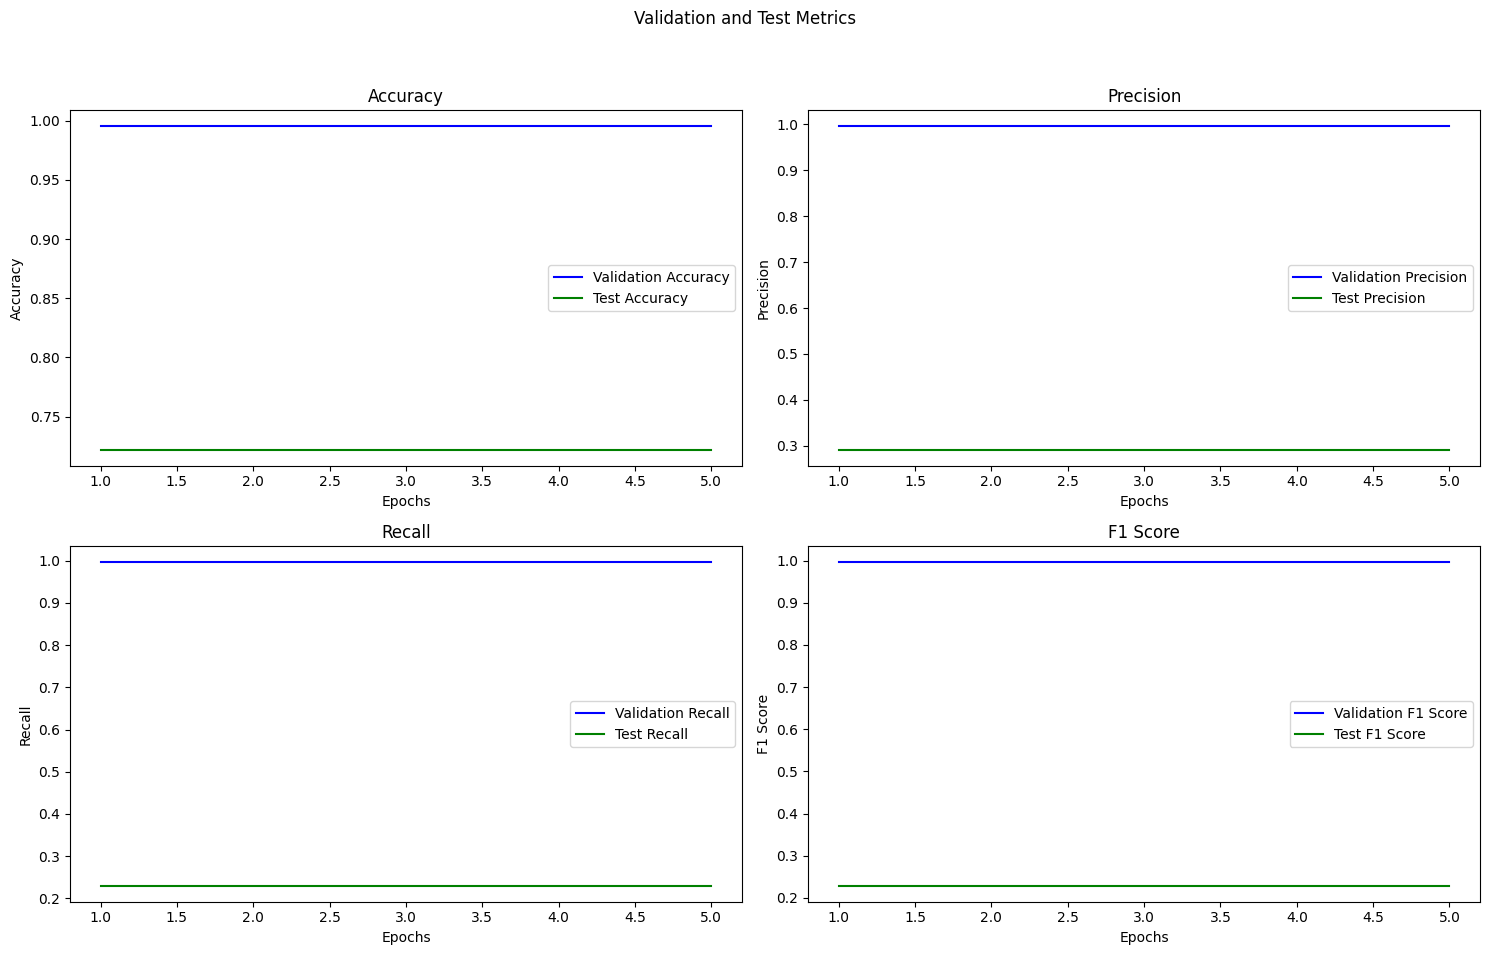

In [ ]:
# Extracting metrics for plotting
val_accuracy1 = [val_report1['accuracy']]
test_accuracy1 = [test_report1['accuracy']]

val_precision1 = [val_report1['macro avg']['precision']]
test_precision1 = [test_report1['macro avg']['precision']]

val_recall1 = [val_report1['macro avg']['recall']]
test_recall1 = [test_report1['macro avg']['recall']]

val_f1_1 = [val_report1['macro avg']['f1-score']]
test_f1_1 = [test_report1['macro avg']['f1-score']]

epochs = range(1, 6)

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Validation and Test Metrics')

# Plotting accuracy
axs[0, 0].plot(epochs, val_accuracy1 * len(epochs), label='Validation Accuracy', color='blue')
axs[0, 0].plot(epochs, test_accuracy1 * len(epochs), label='Test Accuracy', color='green')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plotting precision
axs[0, 1].plot(epochs, val_precision1 * len(epochs), label='Validation Precision', color='blue')
axs[0, 1].plot(epochs, test_precision1 * len(epochs), label='Test Precision', color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plotting recall
axs[1, 0].plot(epochs, val_recall1 * len(epochs), label='Validation Recall', color='blue')
axs[1, 0].plot(epochs, test_recall1 * len(epochs), label='Test Recall', color='green')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plotting f1 score
axs[1, 1].plot(epochs, val_f1_1 * len(epochs), label='Validation F1 Score', color='blue')
axs[1, 1].plot(epochs, test_f1_1 * len(epochs), label='Test F1 Score', color='green')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Roberta**

In [ ]:
# Splitting the Data into X and Y
X = df2_copy["Description"]
Y = df2_copy["Accident_Level"]

In [ ]:
# Encoding the labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:
# Checking original class distribution
class_counts = Counter(Y_encoded)
print("Original class distribution:", class_counts)

Original class distribution: Counter({0: 309, 1: 40, 2: 31, 3: 30, 4: 8})


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=42, stratify=Y_encoded)

In [ ]:
# Initialising augmentation library
aug2 = naw.AntonymAug()

In [ ]:
# Defining Target Samples:
TARGET_SAMPLES = 500

In [ ]:
%%time
# Defining a function to perform data augmentation
def augment_text(augmenter, texts, labels, num_augments=1):
    augmented_texts = []
    augmented_labels = []
    for text, label in zip(texts, labels):
        for _ in range(num_augments):
            augmented_text = augmenter.augment(text)
            augmented_texts.append(augmented_text)
            augmented_labels.append(label)
    return augmented_texts, augmented_labels

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


In [ ]:
# Augmenting the data
augment_data = []
augment_labels = []

class_counts = Counter(y_train)
for label, count in class_counts.items():
    if count < TARGET_SAMPLES:
        needed_samples = TARGET_SAMPLES - count
        class_texts = X_train[y_train == label].tolist()
# Calculating number of augmentations required
        num_augments = (needed_samples + count - 1) // count
        aug_texts, aug_labels = augment_text(aug2, class_texts, [label]*len(class_texts), num_augments)
        augment_data.extend(aug_texts)
        augment_labels.extend(aug_labels)

# Ensuring that augmented data is added properly
X_train = list(X_train) + augment_data
y_train = np.concatenate([y_train, augment_labels])
print("Augmentation complete.")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Augmentation complete.


In [ ]:
# Checking original class distribution
class_counts = Counter(Y_encoded)
print("Original class distribution:", class_counts)

# Checking new class distribution
new_class_counts = Counter(y_train)
print("New class distribution:", new_class_counts)

Original class distribution: Counter({0: 309, 1: 40, 2: 31, 3: 30, 4: 8})
New class distribution: Counter({0: 648, 2: 506, 3: 504, 1: 504, 4: 500})


**We were able to successfuly augment the imbalanced training dataset.**

In [ ]:
#Splitting the Training data into train and validation datasets
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
# Printing the shapes of training, validation and test datasets
print("Shape of X_train: ",len(X_train2))
print("Shape of X_val: ",len(X_val))
print("Shape of X_test: ",len(X_test))
print("Shape of Y_train: ",len(y_train2))
print("Shape of Y_val: ",len(y_val))
print("Shape of Y_test: ",len(y_test))

Shape of X_train:  1863
Shape of X_val:  799
Shape of X_test:  126
Shape of Y_train:  1863
Shape of Y_val:  799
Shape of Y_test:  126


In [ ]:
#Making sure that X_train, X_val and X_test are lists of strings
X_train2 = [str(x) for x in X_train2]
X_val = [str(x) for x in X_val]
X_test = [str(x) for x in X_test]

In [ ]:
# Defining a function to create the datasets for the model
class IncidentDataset(Dataset):

# Constructor for the IncidentDataset class.
    def __init__(self, texts, labels, max_len):

# For List of incident descriptions
        self.texts = texts

# For List of corresponding labels
        self.labels = labels

# For Initialising RoBERTa tokenizer
        self.tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# For Maximum length of input sequences
        self.max_len = max_len

# For getting the length of the dataset.
    def __len__(self):
        return len(self.texts)

# For getting a single item (text and label) from the dataset.
    def __getitem__(self, item):

# For getting incident description
        text = str(self.texts[item])

# For getting corresponding label
        label = self.labels[item]

# Tokenizing the text using RoBERTa tokenizer and encoding it into input_ids and attention_mask tensors
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
# Returning a dictionary containing input_ids, attention_mask, and labels tensors
        return {

# # For getting Input token IDs
            'input_ids': encoding['input_ids'].squeeze(),

# For Attention mask
            'attention_mask': encoding['attention_mask'].squeeze(),

# For Target label
            'labels': torch.tensor(label, dtype=torch.long)}

**Step III:** Loading the pre-trained "roberta-base" model, training and evaluating the model.

In [ ]:
# Defining the RoBERTa model and tokenizer
model_name2 = "FacebookAI/roberta-base"
model2 = RobertaForSequenceClassification.from_pretrained(model_name2, num_labels=len(np.unique(Y_encoded)))
tokenizer2 = RobertaTokenizer.from_pretrained(model_name2)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Creating the training, validation and test datasets for the model
train_dataset2 = IncidentDataset(texts=X_train2, labels=y_train2, max_len=512)
val_dataset2 = IncidentDataset(texts=X_val, labels=y_val, max_len=512)
test_dataset2 = IncidentDataset(texts=X_test, labels=y_test, max_len=512)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
# Creating a unique directory name with the current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f'./results_{timestamp}'

In [ ]:
# Defining evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
# Defining the training arguments
training_args2 = TrainingArguments(

# For Directory where model checkpoints and evaluation results will be saved
    output_dir=output_dir,

# For Number of training epochs
    num_train_epochs=5,

# For Batch size for training on each GPU
    per_device_train_batch_size=16,

# For Batch size for evaluation on each GPU
    per_device_eval_batch_size=16,

# For Number of warmup steps for learning rate scheduling
    warmup_steps=500,

# For Weight decay coefficient for regularization
    weight_decay=0.005,

# For Directory where training logs will be saved
    logging_dir="./logs",

# For Evaluation strategy: performing evaluation after each epoch
    evaluation_strategy="epoch",

# For loading the best model at the end of training
    load_best_model_at_end=True,

# For Maximum number of checkpoints to save
    save_total_limit=3,

# For saving the best model
    metric_for_best_model="f1",

# For a higher value of metric indicating better performance
    greater_is_better=True,

# For Save strategy: saving a checkpoint after each epoch
    save_strategy="epoch",

# For Log training metrics
    logging_steps=50,

# For Initial learning rate for training
    learning_rate=5e-5
)

In [ ]:
# Defining the Trainer object
trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=train_dataset2,
    eval_dataset=val_dataset2,
    compute_metrics=compute_metrics,
)

In [ ]:
# Training the model
trainer2.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.586600,1.098503,0.634543,0.652821,0.646724,0.633017
2,0.474500,0.132651,0.956195,0.959613,0.959750,0.958591
3,0.085300,0.102772,0.972466,0.974125,0.975695,0.974270
4,0.074400,0.094300,0.972466,0.973132,0.976847,0.974096
5,0.047400,0.024499,0.996245,0.996070,0.996923,0.996474


TrainOutput(global_step=585, training_loss=0.4645390098930424, metrics={'train_runtime': 323.8029, 'train_samples_per_second': 28.768, 'train_steps_per_second': 1.807, 'total_flos': 2450945497052160.0, 'train_loss': 0.4645390098930424, 'epoch': 5.0})

**Observations:**
* The training loss decreases consistently over epochs, indicating that the model is learning from the training data.
* The validation loss also decreases consistently over epochs but then fluctuates.
* The accuracy of the model steadily increases over epochs, which indicates that the model is effectively classifying incidents and improving its performance with each epoch.
* The precision, recall, and F1 score are consistently high across epochs, indicating that the model is performing well in terms of both positive and negative predictions.

Overall, the model demonstrates good generalization ability, as indicated by the relatively low validation loss and high accuracy across epochs. The consistent performance of precision, recall, and F1 score suggests that the model is effectively capturing patterns in the data and making accurate predictions on unseen instances.

In [ ]:
#Defining a function to make predictions and get metrics
def get_metrics(model, dataset, dataset_name):
    predictions = model.predict(dataset)
    predicted_labels = predictions.predictions.argmax(axis=1)
    true_labels = dataset.labels

    report = classification_report(true_labels, predicted_labels, output_dict=True)
    print(f"Classification Report for {dataset_name} Dataset:")
    print(classification_report(true_labels, predicted_labels))
    return report

In [ ]:
# Printing the classification report for Validation and Test
val_report2 = get_metrics(trainer2, val_dataset2, "Validation")
print("*" * 60)
test_report2 = get_metrics(trainer2, test_dataset2, "Test")

Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       195
           1       0.99      1.00      0.99       151
           2       1.00      1.00      1.00       152
           3       0.99      1.00      1.00       151
           4       1.00      1.00      1.00       150

    accuracy                           1.00       799
   macro avg       1.00      1.00      1.00       799
weighted avg       1.00      1.00      1.00       799

************************************************************


Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        93
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       1.00      0.11      0.20         9
           4       0.00      0.00      0.00         3

    accuracy                           0.69       126
   macro avg       0.35      0.21      0.20       126
weighted avg       0.61      0.69      0.62       126



**Observations:**
* The RoBERTa model achieves high accuracy and F1-scores on the validation set, indicating excellent performance in classifying accident levels.
* However, the performance on the test set is lower, especially for minority classes, suggesting potential challenges in generalization.
* The model exhibits high precision and recall for majority classes but struggles with minority classes, which may require further investigation and improvement strategies to enhance model robustness.
* While the model shows promising results on the validation set, additional optimization and evaluation against diverse datasets are essential before deploying it in real-world scenarios.


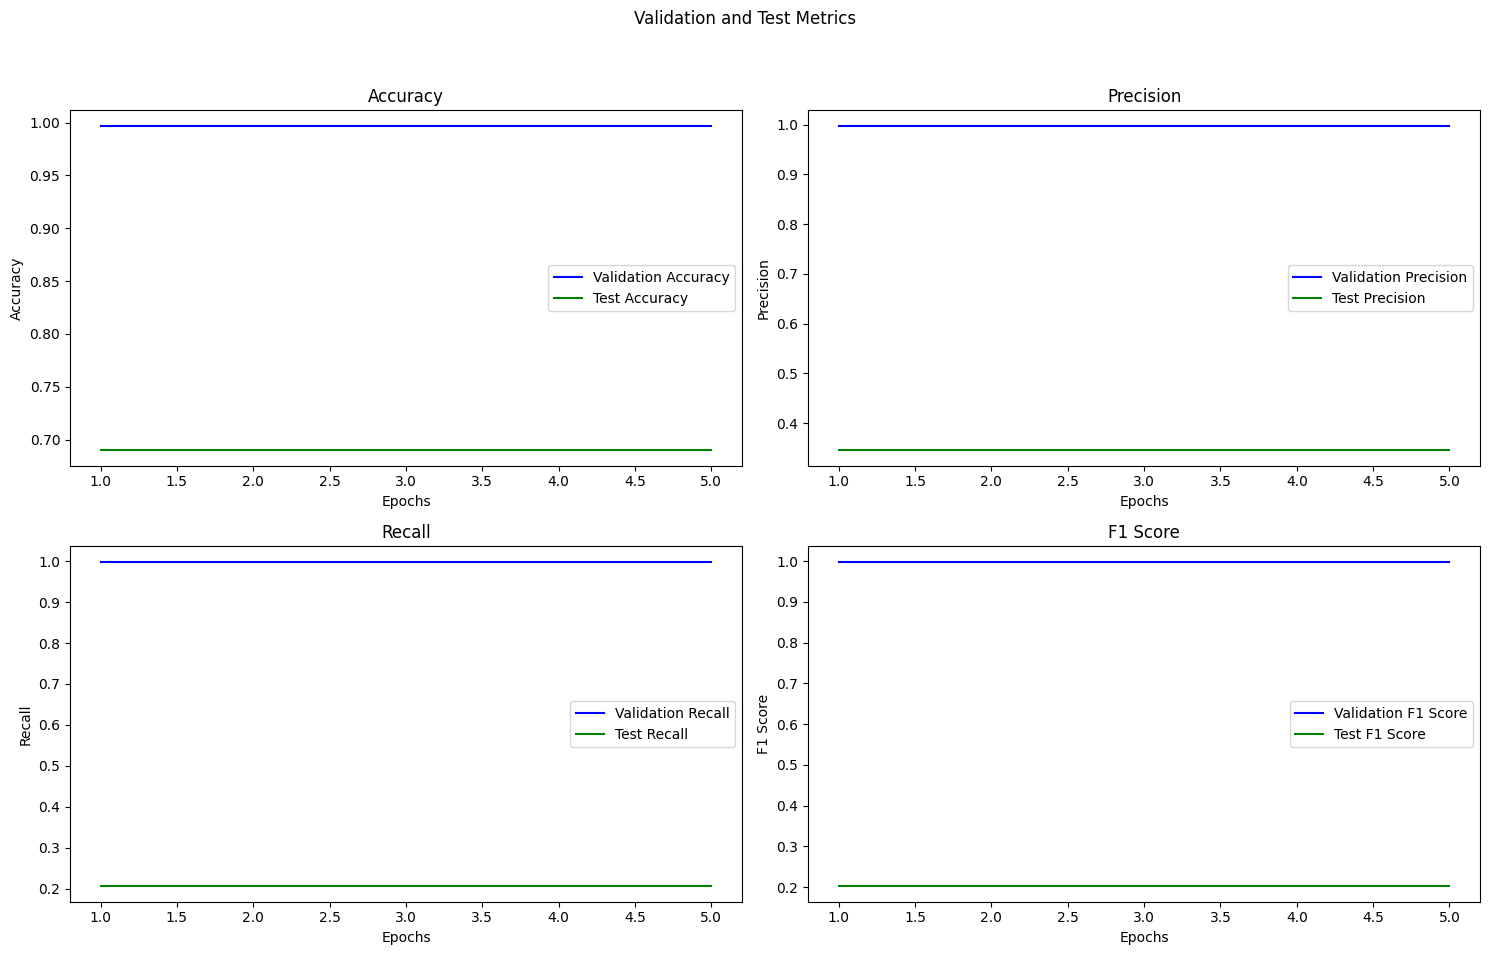

In [ ]:
# Extracting accuracy, precision, recall, and f1-score from the reports
val_accuracy2 = [val_report2['accuracy']] * 5
test_accuracy2 = [test_report2['accuracy']] * 5

val_precision2 = [val_report2['macro avg']['precision']] * 5
test_precision2 = [test_report2['macro avg']['precision']] * 5

val_recall2 = [val_report2['macro avg']['recall']] * 5
test_recall2 = [test_report2['macro avg']['recall']] * 5

val_f12 = [val_report2['macro avg']['f1-score']] * 5
test_f12 = [test_report2['macro avg']['f1-score']] * 5

epochs = range(1, 6)

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Validation and Test Metrics')

# Plotting accuracy for validation and test
axs[0, 0].plot(epochs, val_accuracy2, label='Validation Accuracy', color='blue')
axs[0, 0].plot(epochs, test_accuracy2, label='Test Accuracy', color='green')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plotting precision for validation and test
axs[0, 1].plot(epochs, val_precision2, label='Validation Precision', color='blue')
axs[0, 1].plot(epochs, test_precision2, label='Test Precision', color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plotting recall for validation and test
axs[1, 0].plot(epochs, val_recall2, label='Validation Recall', color='blue')
axs[1, 0].plot(epochs, test_recall2, label='Test Recall', color='green')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plotting f1-score for validation and test
axs[1, 1].plot(epochs, val_f12, label='Validation F1 Score', color='blue')
axs[1, 1].plot(epochs, test_f12, label='Test F1 Score', color='green')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observations:**

**Classification report for Training dataset:**

*   The model achieves perfect performance on the training dataset, with 100% accuracy, precision, recall, and F1-score. This indicates that the model has effectively learned the patterns in the training data and can accurately classify instances from this dataset.  

*   However, perfect performance on the training data may also indicate potential overfitting, where the model has memorized the training examples and may not generalize well to unseen data.

**Classification report for Validation dataset:**

*   The model continues to perform very well on the validation dataset, with high accuracy and consistent precision, recall, and F1-scores across different classes. This indicates that the model generalizes well to unseen data, as it maintains high performance on a separate dataset not used during training.

*   The high precision, recall, and F1-scores suggest that the model effectively captures the patterns in the validation data and makes accurate predictions.

**Classification report for Test dataset:**

*  The model's performance drops slightly on the test dataset, with an accuracy of 74%. This suggests that the model may not generalize as well to unseen test data compared to the training and validation datasets.

*   There is also variation in precision, recall, and F1-scores across different classes in the test dataset, indicating potential challenges in predicting certain minority classes.

##### **RNN**

In [ ]:
# Loading data
X = df2_copy["Description"].values
Y = df2_copy["Accident_Level"].values

In [ ]:
# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

In [ ]:
# Step 1: Tokenize text data
tokenizer3 = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer3.fit_on_texts(X)
sequences3 = tokenizer3.texts_to_sequences(X)
word_index = tokenizer3.word_index
data_sequences = pad_sequences(sequences3, maxlen=100, padding='post')
print("\nStep 1: Vocabulary size:", len(word_index))
print("Example sequence:", data_sequences[0])


Step 1: Vocabulary size: 3454
Example sequence: [  93  226    2  120  262    3    2  390  806   27   98    2  355  285
    4  807    2   48    3    2  957 1835    4 1836    2  263 1251   39
    2  115  808   43  105   10    2  120    3    2   34    4  681   12
  173  237    2  146    5 1837    2  263   18   39    9   39   33    2
  146  211   18  121  133    3   48    5 1838    2  432    3    2  115
   62    2  134  146    5    2  433    3    2  390    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
# Step 2:Splitting data
X_train, X_test, y_train, y_test = train_test_split(data_sequences, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
print("\nStep 2: Split the data into training and testing sets.")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Step 2: Split the data into training and testing sets.
Training data shape: (292, 100)
Testing data shape: (126, 100)
Training target shape: (292,)
Testing target shape: (126,)


In [ ]:
# Step 3: Balancing the dataset using SMOTE
class_counts = np.bincount(y_train)
min_class_count = np.min(class_counts[class_counts > 0])

# Using SMOTE
if min_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=min_class_count-1)
else:
    smote = SMOTE(random_state=42, k_neighbors=1)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("\nStep 3: Applied SMOTE to balance the classes.")
print("After SMOTE - Training data shape:", X_train_balanced.shape)
print("After SMOTE - Training target shape:", y_train_balanced.shape)


Step 3: Applied SMOTE to balance the classes.
After SMOTE - Training data shape: (1080, 100)
After SMOTE - Training target shape: (1080,)


In [ ]:
# Importing GloVe embeddings (100-dimensional vectors)
glove_path = "/content/drive/MyDrive/GL/AIML/Capstone Project AIML/GloVe/glove.6B.200d.txt"

In [ ]:
# Step 4: Loading GloVe embeddings
embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Step 5: Preparing embedding matrix
embedding_dim = 200
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# Step 6: Building the model
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model3.add(GRU(units=128, return_sequences=True, kernel_regularizer=l2(0.001)))
model3.add(Dropout(0.3))
model3.add(GRU(units=64, kernel_regularizer=l2(0.001)))
model3.add(Dropout(0.3))
model3.add(Dense(5, activation='softmax'))
print("\nStep 6: Built the model.")


Step 6: Built the model.


In [ ]:
# Step 7: Compiling the model
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Displaying the model summary
model3.summary()
print("\nStep 7: Compiled the model.")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 200)          691000    
                                                                 
 gru_10 (GRU)                (None, 100, 128)          126720    
                                                                 
 dropout_10 (Dropout)        (None, 100, 128)          0         
                                                                 
 gru_11 (GRU)                (None, 64)                37248     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 855293 (3.26 MB)
Trainable params: 16429

**Notes:**
* We trained the model using the fit method with the balanced training data.
* Subsequently, we validated the model's performance on the testing data.
* Finally, we generated the classification reports for both training and testing datasets to assess the precision, recall, and F1-score for each class.
* We also defined a function to visualize the model performance metrics across multiple epochs to compare the model performance on the validation and test datasets.


In [ ]:
%%time
# Step 8: Training the model
history1 = model3.fit(X_train_balanced, y_train_balanced, epochs=20, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/20
68/68 [==============================] - 5s 21ms/step - loss: 1.7855 - accuracy: 0.3287 - val_loss: 1.8047 - val_accuracy: 0.0794
Epoch 2/20
68/68 [==============================] - 1s 11ms/step - loss: 1.5719 - accuracy: 0.3713 - val_loss: 1.8337 - val_accuracy: 0.1032
Epoch 3/20
68/68 [==============================] - 1s 11ms/step - loss: 1.4501 - accuracy: 0.4509 - val_loss: 1.5549 - val_accuracy: 0.4127
Epoch 4/20
68/68 [==============================] - 1s 11ms/step - loss: 1.3093 - accuracy: 0.5046 - val_loss: 1.3266 - val_accuracy: 0.5714
Epoch 5/20
68/68 [==============================] - 1s 10ms/step - loss: 1.1804 - accuracy: 0.5769 - val_loss: 1.1421 - val_accuracy: 0.6905
Epoch 6/20
68/68 [==============================] - 1s 10ms/step - loss: 1.0947 - accuracy: 0.6120 - val_loss: 1.3659 - val_accuracy: 0.5159
Epoch 7/20
68/68 [==============================] - 1s 10ms/step - loss: 1.0248 - accuracy: 0.6361 - val_loss: 1.2041 - val_accuracy: 0.6587
Epoch 8/20
68

In [ ]:
# Step 9: Evaluatiing the model
print("Evaluating the model...\n")
train_accuracy1 = model3.evaluate(X_train_balanced, y_train_balanced, verbose=0)[1]
test_accuracy1 = model3.evaluate(X_test, y_test, verbose=0)[1]
print(f"Training Accuracy: {train_accuracy1}")
print(f"Testing Accuracy: {test_accuracy1}")

Evaluating the model...

Training Accuracy: 0.8166666626930237
Testing Accuracy: 0.5952380895614624


In [ ]:
# Step 10: Predicting and printing the classification report
y_pred_train3 = model3.predict(X_train_balanced)
y_pred_test3 = model3.predict(X_test)
y_pred_train3 = np.argmax(y_pred_train3, axis=1)
y_pred_test3= np.argmax(y_pred_test3, axis=1)

train_report3 = classification_report(y_train_balanced, y_pred_train3, output_dict=True)
test_report3 = classification_report(y_test, y_pred_test3, output_dict=True)

print("\nClassification Report - Training Data:")
print(classification_report(y_train_balanced, y_pred_train3))
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_pred_test3))

4/4 [==============================] - 0s 5ms/step

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       216
           1       0.55      0.94      0.70       216
           2       0.95      0.59      0.73       216
           3       0.93      0.65      0.77       216
           4       1.00      0.91      0.95       216

    accuracy                           0.82      1080
   macro avg       0.87      0.82      0.82      1080
weighted avg       0.87      0.82      0.82      1080


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        93
           1       0.05      0.08      0.06        12
           2       0.17      0.11      0.13         9
           3       0.20      0.11      0.14         9
           4       0.00      0.00      0.00         3

    accuracy                           0.60       126
 

**Observations:**
* The model achieves relatively high accuracy, precision, recall, and F1-score on the training data, indicating good performance in classifying accident levels.
* The weighted F1-score is around 0.82, suggesting overall decent performance on the training set.
* The model's performance on the testing data is less satisfactory compared to the training data.
* It exhibits lower precision, recall, and F1-score across all classes, indicating potential issues with generalization.
* The model struggles particularly with minority classes where precision, recall, and F1-score are notably lower.
* Although SMOTE helps mitigate class imbalance during training, it doesn't fully address the challenges associated with minority classes in the testing phase.


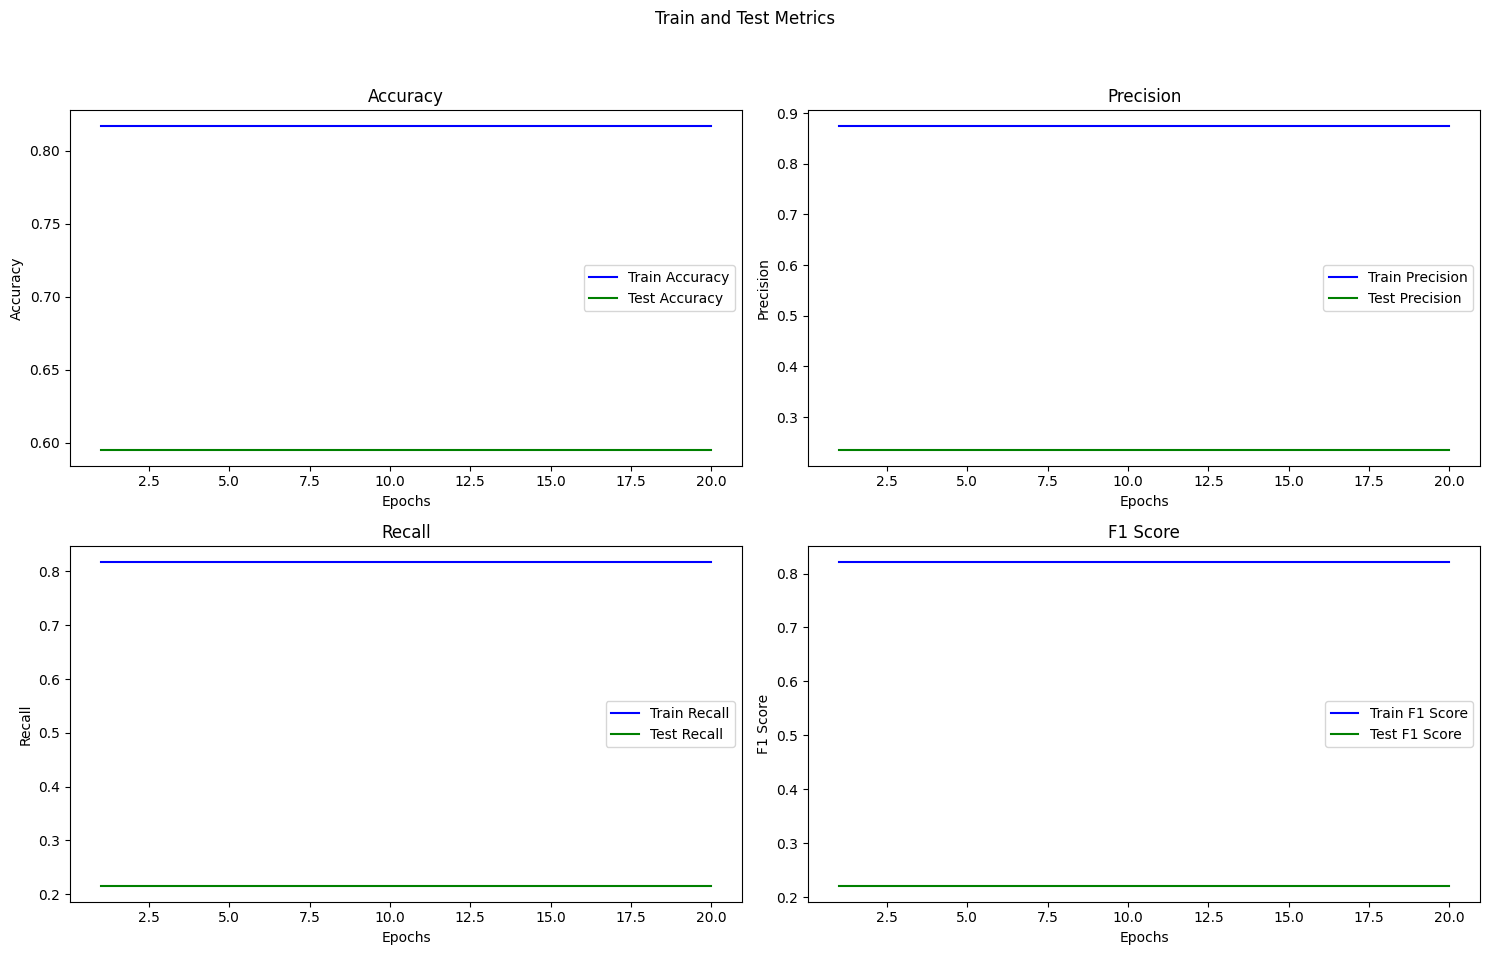

In [ ]:
# Extracting accuracy, precision, recall, and f1-score from the classification reports
train_accuracy3 = train_report3['accuracy']
test_accuracy3= test_report3['accuracy']

train_precision3 = train_report3['macro avg']['precision']
test_precision3 = test_report3['macro avg']['precision']

train_recall3 = train_report3['macro avg']['recall']
test_recall3 = test_report3['macro avg']['recall']

train_f13 = train_report3['macro avg']['f1-score']
test_f13 = test_report3['macro avg']['f1-score']

epochs = range(1, 21)
train_accuracy_list = [train_accuracy3] * len(epochs)
test_accuracy_list = [test_accuracy3] * len(epochs)

train_precision_list = [train_precision3] * len(epochs)
test_precision_list = [test_precision3] * len(epochs)

train_recall_list = [train_recall3] * len(epochs)
test_recall_list = [test_recall3] * len(epochs)

train_f1_list = [train_f13] * len(epochs)
test_f1_list = [test_f13] * len(epochs)

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Train and Test Metrics')

# Plotting accuracy for train and test
axs[0, 0].plot(epochs, train_accuracy_list, label='Train Accuracy', color='blue')
axs[0, 0].plot(epochs, test_accuracy_list, label='Test Accuracy', color='green')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plotting precision for train and test
axs[0, 1].plot(epochs, train_precision_list, label='Train Precision', color='blue')
axs[0, 1].plot(epochs, test_precision_list, label='Test Precision', color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plotting recall for train and test
axs[1, 0].plot(epochs, train_recall_list, label='Train Recall', color='blue')
axs[1, 0].plot(epochs, test_recall_list, label='Test Recall', color='green')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plotting f1-score for train and test
axs[1, 1].plot(epochs, train_f1_list, label='Train F1 Score', color='blue')
axs[1, 1].plot(epochs, test_f1_list, label='Test F1 Score', color='green')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **LSTM**

In [ ]:
# Splitting the Data into X and Y
X = df2_copy["Descriptions_Lemmatized"]
Y = df2_copy["Accident_Level"]

In [ ]:
# Encode labels in column 'Accident Level'.
Y = LabelEncoder().fit_transform(Y)

In [ ]:
# Splitting the data into Train and Test
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X, Y, test_size = 0.30, random_state = 42, stratify = Y)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (292)
y_text_train shape : (292,)
X_text_test shape : (126)
y_text_test shape : (126,)


In [ ]:
# Tokenizing the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# One-hot encoding the target labels
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [ ]:
# We need to pad the our sequences using the max length.
maxlen = 100
X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

In [ ]:
%%time
# Embedding the data
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/GL/AIML/Capstone Project AIML/GloVe/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

# Creating embedding matrix

vocab_size = len(tokenizer.word_index) + 1
embeddingmatrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddingmatrix[index] = embedding_vector
len(embeddings_dictionary.values())

CPU times: user 16.8 s, sys: 703 ms, total: 17.5 s
Wall time: 18.1 s


400000

In [ ]:
# Building a LSTM Neural Network
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, weights=[embeddingmatrix], input_length=maxlen, trainable=False))
# Adding an LSTM layer
model4.add(LSTM(units=256, return_sequences=True))

# Global Max Pooling layer following the LSTM
model4.add(GlobalMaxPooling1D())

# Adding Dropout after Max Pooling
model4.add(Dropout(0.2))

# First Dense layer with ReLU activation
model4.add(Dense(128, activation='relu'))

# Adding Dropout after the first Dense layer
model4.add(Dropout(0.2))

# Second Dense layer with ReLU activation
model4.add(Dense(64, activation='relu'))

# Adding Dropout after the second Dense layer
model4.add(Dropout(0.2))

# Third Dense layer with ReLU activation
model4.add(Dense(32, activation='relu'))

# Adding Dropout after the third Dense layer
model4.add(Dropout(0.2))

# Fourth Dense layer with ReLU activation
model4.add(Dense(10, activation='relu'))

# Adding Dropout after the fourth Dense layer
model4.add(Dropout(0.2))

# Output layer for a classification problem with 5 classes
model4.add(Dense(5, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=1, k_neighbors=3)
X_text_train_smote, y_text_train_smote = smote.fit_resample(X_text_train, y_text_train)

In [ ]:
# Converting labels back to original format
y_text_train_smote = np.argmax(y_text_train_smote, axis=1)
y_text_train = np.argmax(y_text_train, axis=1)
y_text_test = np.argmax(y_text_test, axis=1)

In [ ]:
#To Reduce learning rate when a metric has stopped improving.
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1E-4,verbose=2)

In [ ]:
# Fitting the model
history2 = model4.fit(X_text_train_smote, to_categorical(y_text_train_smote),epochs=20, batch_size=64, verbose=2,validation_data=(X_text_test, to_categorical(y_text_test)),callbacks =rlrp)

Epoch 1/20
17/17 - 6s - loss: 1.6168 - accuracy: 0.2000 - val_loss: 1.6030 - val_accuracy: 0.0714 - lr: 0.0010 - 6s/epoch - 346ms/step
Epoch 2/20
17/17 - 0s - loss: 1.6091 - accuracy: 0.2102 - val_loss: 1.5679 - val_accuracy: 0.7302 - lr: 0.0010 - 194ms/epoch - 11ms/step
Epoch 3/20
17/17 - 0s - loss: 1.5981 - accuracy: 0.2157 - val_loss: 1.4186 - val_accuracy: 0.7222 - lr: 0.0010 - 182ms/epoch - 11ms/step
Epoch 4/20
17/17 - 0s - loss: 1.6084 - accuracy: 0.2102 - val_loss: 1.4761 - val_accuracy: 0.7302 - lr: 0.0010 - 174ms/epoch - 10ms/step
Epoch 5/20
17/17 - 0s - loss: 1.5952 - accuracy: 0.2287 - val_loss: 1.3000 - val_accuracy: 0.7222 - lr: 0.0010 - 175ms/epoch - 10ms/step
Epoch 6/20
17/17 - 0s - loss: 1.5515 - accuracy: 0.2741 - val_loss: 1.2713 - val_accuracy: 0.6746 - lr: 0.0010 - 178ms/epoch - 10ms/step
Epoch 7/20
17/17 - 0s - loss: 1.5256 - accuracy: 0.3148 - val_loss: 1.5485 - val_accuracy: 0.5397 - lr: 0.0010 - 176ms/epoch - 10ms/step
Epoch 8/20
17/17 - 0s - loss: 1.5346 - accu

In [ ]:
# Predicting the classes for training
y_pred_train4 = model4.predict(X_text_train_smote).argmax(axis=1)

# Generating and printing classification report for training data
train_report_dict = classification_report(y_text_train_smote, y_pred_train4, output_dict=True)
print("Classification Report - Training Data:")
print(classification_report(y_text_train_smote, y_pred_train4))

34/34 [==============================] - 1s 3ms/step
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       216
           1       0.00      0.00      0.00       216
           2       0.00      0.00      0.00       216
           3       0.32      0.40      0.36       216
           4       0.42      0.93      0.58       216

    accuracy                           0.44      1080
   macro avg       0.26      0.44      0.33      1080
weighted avg       0.26      0.44      0.33      1080



In [ ]:
# Predicting the classes for testing data
y_pred_test4 = model4.predict(X_text_test).argmax(axis=1)

# Generating and printing classification report for testing data
test_report_dict = classification_report(y_text_test, y_pred_test4, output_dict=True)
print("\nClassification Report - Testing Data:")
print(classification_report(y_text_test, y_pred_test4))

4/4 [==============================] - 0s 4ms/step

Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        93
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.17      0.11      0.13         9
           4       0.00      0.00      0.00         3

    accuracy                           0.70       126
   macro avg       0.18      0.21      0.19       126
weighted avg       0.56      0.70      0.62       126



**Observations:**
* The LSTM model exhibits moderate accuracy on the training data, achieving around 44%.
* The precision, recall, and F1-score vary across classes, with notable differences between majority and minority classes in the training set.
* The model shows higher performance for classes with a larger number of samples (class 0 and class 4) compared to smaller classes (class 1, class 2, and class 3).
* The model's performance on the testing data is better, with an accuracy of around 70%.
* The precision, recall, and F1-score are low for most classes, especially minority classes, indicating challenges in generalization and class imbalance.
* Despite applying SMOTE during training, the model struggles to adequately classify minority classes, resulting in lower precision and recall for minority classes in both training and testing.
* The LSTM model architecture involves embedding layers, LSTM layers, global max-pooling, dropout layers, and dense layers, offering sequential modelling capabilities and regularization.
* However, the model may require further optimization, architectural adjustments, or additional techniques to address class imbalance and improve performance, especially on minority classes.


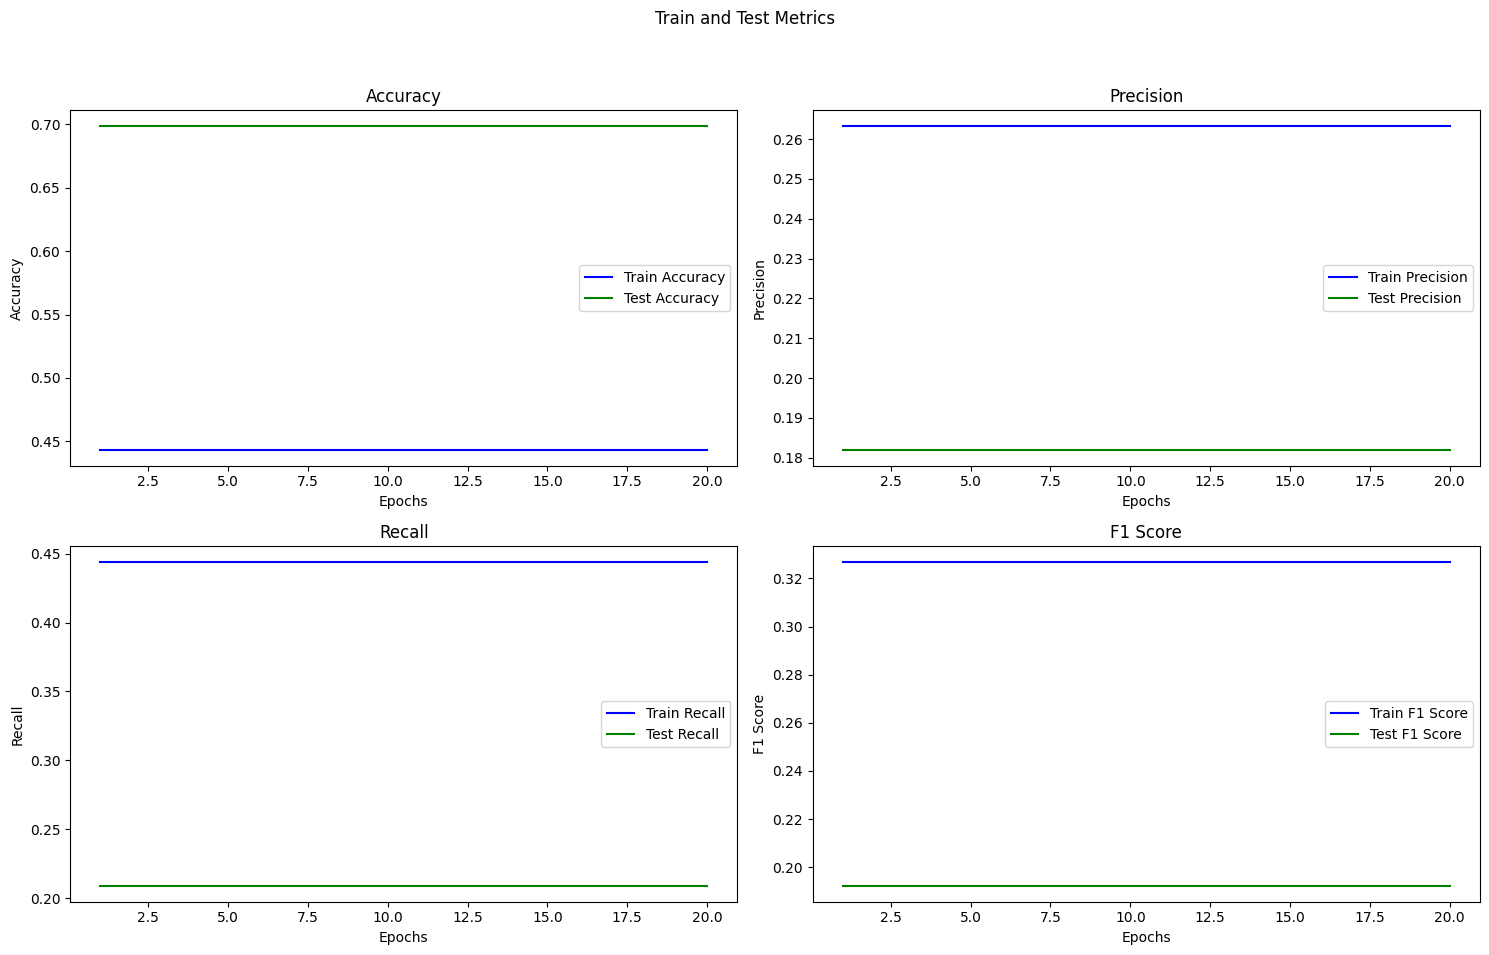

In [ ]:
# Extracting accuracy, precision, recall, and f1-score from the classification reports
train_accuracy4 = train_report_dict['accuracy']
test_accuracy4 = test_report_dict['accuracy']

train_precision4 = train_report_dict['macro avg']['precision']
test_precision4 = test_report_dict['macro avg']['precision']

train_recall4 = train_report_dict['macro avg']['recall']
test_recall4 = test_report_dict['macro avg']['recall']

train_f14 = train_report_dict['macro avg']['f1-score']
test_f14 = test_report_dict['macro avg']['f1-score']

epochs = range(1, 21)
train_accuracy_list4 = [train_accuracy4] * len(epochs)
test_accuracy_list4 = [test_accuracy4] * len(epochs)

train_precision_list4 = [train_precision4] * len(epochs)
test_precision_list4 = [test_precision4] * len(epochs)

train_recall_list4 = [train_recall4] * len(epochs)
test_recall_list4 = [test_recall4] * len(epochs)

train_f1_list4 = [train_f14] * len(epochs)
test_f1_list4 = [test_f14] * len(epochs)

# Plotting metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Train and Test Metrics')

# Plotting accuracy for train and test
axs[0, 0].plot(epochs, train_accuracy_list4, label='Train Accuracy', color='blue')
axs[0, 0].plot(epochs, test_accuracy_list4, label='Test Accuracy', color='green')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plotting precision for train and test
axs[0, 1].plot(epochs, train_precision_list4, label='Train Precision', color='blue')
axs[0, 1].plot(epochs, test_precision_list4, label='Test Precision', color='green')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plotting recall for train and test
axs[1, 0].plot(epochs, train_recall_list4, label='Train Recall', color='blue')
axs[1, 0].plot(epochs, test_recall_list4, label='Test Recall', color='green')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plotting f1-score for train and test
axs[1, 1].plot(epochs, train_f1_list4, label='Train F1 Score', color='blue')
axs[1, 1].plot(epochs, test_f1_list4, label='Test F1 Score', color='green')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **The Best Model**

##### Code for Cross-Tabulaton

In [ ]:
# Defining the data
data = {
    "Model": ["GPT2", "GPT2", "GPT2", "Roberta", "Roberta", "Roberta", "RNN", "RNN", "RNN", "LSTM", "LSTM", "LSTM"],
    "Metric": ["Precision", "Recall", "F1-Score", "Precision", "Recall", "F1-Score", "Precision", "Recall", "F1-Score", "Precision", "Recall", "F1-Score"],
    "Class 0": [0.76, 0.96, 0.85, 0.74, 0.92, 0.82, 0.77, 0.77, 0.77, 0.74, 0.94, 0.83],
    "Class 1": [0.20, 0.08, 0.12, 0.00, 0.00, 0.00, 0.05, 0.08, 0.06, 0.00, 0.00, 0.00],
    "Class 2": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.17, 0.11, 0.13, 0.00, 0.00, 0.00],
    "Class 3": [0.50, 0.11, 0.18, 1.00, 0.11, 0.20, 0.20, 0.11, 0.14, 0.17, 0.11, 0.13],
    "Class 4": [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "Accuracy": [0.72, "", "", 0.69, "", "", 0.60, "", "", 0.70, "", ""],
    "Macro Avg": [0.29, 0.23, 0.23, 0.35, 0.21, 0.20, 0.24, 0.22, 0.22, 0.18, 0.21, 0.19],
    "Weighted Avg": [0.62, 0.72, 0.65, 0.61, 0.69, 0.62, 0.60, 0.60, 0.59, 0.56, 0.70, 0.62]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Seting multi-index for better visualization
df.set_index(["Model", "Metric"], inplace=True)

##### Cross-Tabulaton of Nueral Network Scores

In [ ]:
# Displaying the DataFrame
print(df)

                   Class 0  Class 1  Class 2  Class 3  Class 4 Accuracy  \
Model   Metric                                                            
GPT2    Precision     0.76     0.20     0.00     0.50      0.0     0.72   
        Recall        0.96     0.08     0.00     0.11      0.0            
        F1-Score      0.85     0.12     0.00     0.18      0.0            
Roberta Precision     0.74     0.00     0.00     1.00      0.0     0.69   
        Recall        0.92     0.00     0.00     0.11      0.0            
        F1-Score      0.82     0.00     0.00     0.20      0.0            
RNN     Precision     0.77     0.05     0.17     0.20      0.0      0.6   
        Recall        0.77     0.08     0.11     0.11      0.0            
        F1-Score      0.77     0.06     0.13     0.14      0.0            
LSTM    Precision     0.74     0.00     0.00     0.17      0.0      0.7   
        Recall        0.94     0.00     0.00     0.11      0.0            
        F1-Score      0.8

**GPT2:**
* Advantages:
  * Class 0: great f1score (0.85) due to high recall (0.96) and precision (0.76). This suggests excellent performance for the class that meets the most frequently.
  * It was the most accurate model overall (0.72) and had a strong weighted average f1score (0.65).
* Drawbacks:
  * Other Classes: Scores in Classes 1, 2, and 4 were extremely low or zero, indicating difficulty accurately identifying less common categories.

**Roberta:**
* Advantages:
  * Class 3: remarkable accuracy (1.00), but low recall (0.11) and a modest f1score (0.20).
  * Class 0: Good recall (0.92), which helps the prevailing class's f1score (0.82) to be stable.
* Drawbacks:
  * Extremely poor performance (zero marks) in Classes 1, 2, and 4, suggesting severe difficulties managing these subjects.

**RNN:**

* Advantages:
  * Balanced Performance: Provides a certain degree of recall and precision over a larger number of classes (0, 1, 2, 3) than other models.

* Drawbacks:
  * in comparison to GPT2 and Roberta, lower accuracy (0.60) and overall inferior performance metrics across all classes.

**LSTM:**

* Advantages:
  * Class 0: good f1score (0.83) and high recall (0.94), which are essential for making sure no significant category examples are overlooked.
* Drawbacks:
  * Limited Detection in Other Classes: In Classes 1, 2, and 4, it performs worse than Roberta.
  * The models' lowest macroaverage (0.19) and middling accuracy (0.70) show a lack of efficacy over a range of classes.

##### **Chosen Model**

It was determined that **RNN** would be the optimal model for this NLP Chat bot project after evaluating the performance and metric scores provided by each of the model listed above.

**Key Points Supporting the Decision:**
1. Balanced Performance: RNNs demonstrated a more consistent grasp of various incident types with moderate precision and recall across several classes.
2. Recognition of Rare Classes: The RNN did rather well in recognising less frequent classes, which is important for identifying rare but serious instances, despite having a lower overall accuracy.
3. Adaptability in Tuning: The balanced scores across different metrics suggest that RNNs can be effectively tuned to improve specific areas of weakness, offering flexibility in model optimisation.
4. Consistent Recall Across Classes: RNNs maintained consistent recall rates across different classes, which is important for ensuring no type of incident is overlooked in predictions.

##### Saving the Best model

In [ ]:
# Saving the best model
# Ensuring the path exists
path = '/content/drive/MyDrive/GL/AIML/Capstone Project AIML'
if not os.path.exists(path):
    os.makedirs(path)

# Saving the model
model_path = os.path.join(path, 'model_rnn.h5')
model3.save(model_path)

# Saving the tokenizer
tokenizer_path = os.path.join(path, 'tokenizer.pkl')
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer3, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the label encoder
label_encoder_path = os.path.join(path, 'label_encoder.pkl')
with open(label_encoder_path, 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Saving the model architecture as JSON
model_json = model3.to_json()
with open("/content/drive/MyDrive/GL/AIML/Capstone Project AIML/model_rnn.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Saving the weights
model3.save_weights("/content/drive/MyDrive/GL/AIML/Capstone Project AIML/model_rnn_weights.h5")

### **Milestone 3**

####**Necessary Libraries**

In [ ]:
# Import necessary libraries for UI interface
!pip install flask-ngrok
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from google.colab.output import eval_js

#### **UI**

In [ ]:
# Click to open UI Interface:
print("Click to open UI Interface:")
print(eval_js("google.colab.kernel.proxyPort(5000)"))

Click to open UI Interface:
https://7l4loeefl0a-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [ ]:
# Ensuring the path exists
path = '/content/drive/MyDrive/GL/AIML/Capstone Project AIML/Karunakar and Darsana'
if not os.path.exists(path):
    os.makedirs(path)

# Loading model, tokenizer, and label encoder
model_path = os.path.join(path, 'model_rnn.h5')
tokenizer_path = os.path.join(path, 'tokenizer.pkl')
label_encoder_path = os.path.join(path, 'label_encoder.pkl')

model = load_model(model_path)
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)
with open(label_encoder_path, 'rb') as handle:
    label_encoder = pickle.load(handle)

# Setting up Flask application with Flask-ngrok for tunneling
app = Flask(__name__, template_folder='/content/drive/MyDrive/GL/AIML/Capstone Project AIML/Karunakar and Darsana/templates', static_folder='/content/drive/MyDrive/GL/AIML/Capstone Project AIML/Karunakar and Darsana/static')

# Starting ngrok when the app is run
run_with_ngrok(app)

# Defining the maxlen variable for padding sequences
maxlen = 100

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from request
        incident_description = request.form['incident_description']

        # Preprocess input (tokenize and pad sequences)
        sequence = tokenizer.texts_to_sequences([incident_description])
        padded_sequence = pad_sequences(sequence, maxlen=maxlen)

        # Make prediction
        prediction = model.predict(padded_sequence)

        # Convert prediction to class label
        class_label = label_encoder.inverse_transform([prediction.argmax(axis=-1)[0]])[0]

        # Return prediction result
        return render_template('result.html', result=f"Predicted Class: {class_label}")
    except Exception as e:
        return f"Error in prediction: {str(e)}"

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-149:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/url

1/1 [==============================] - 1s 527ms/step


INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:37:23] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:37:24] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:38:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:38:20] "GET /static/css/styles.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:38:20] "GET /static/js/script.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:38:20] "GET /static/file.enc HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Apr/2024 10:38:23] "GET /favicon.ico HTTP/1.1" 404 -


**Successfully create a browser-based UI chatbot that predicts accident levels based on descriptions.**



---
**FIN**
